# 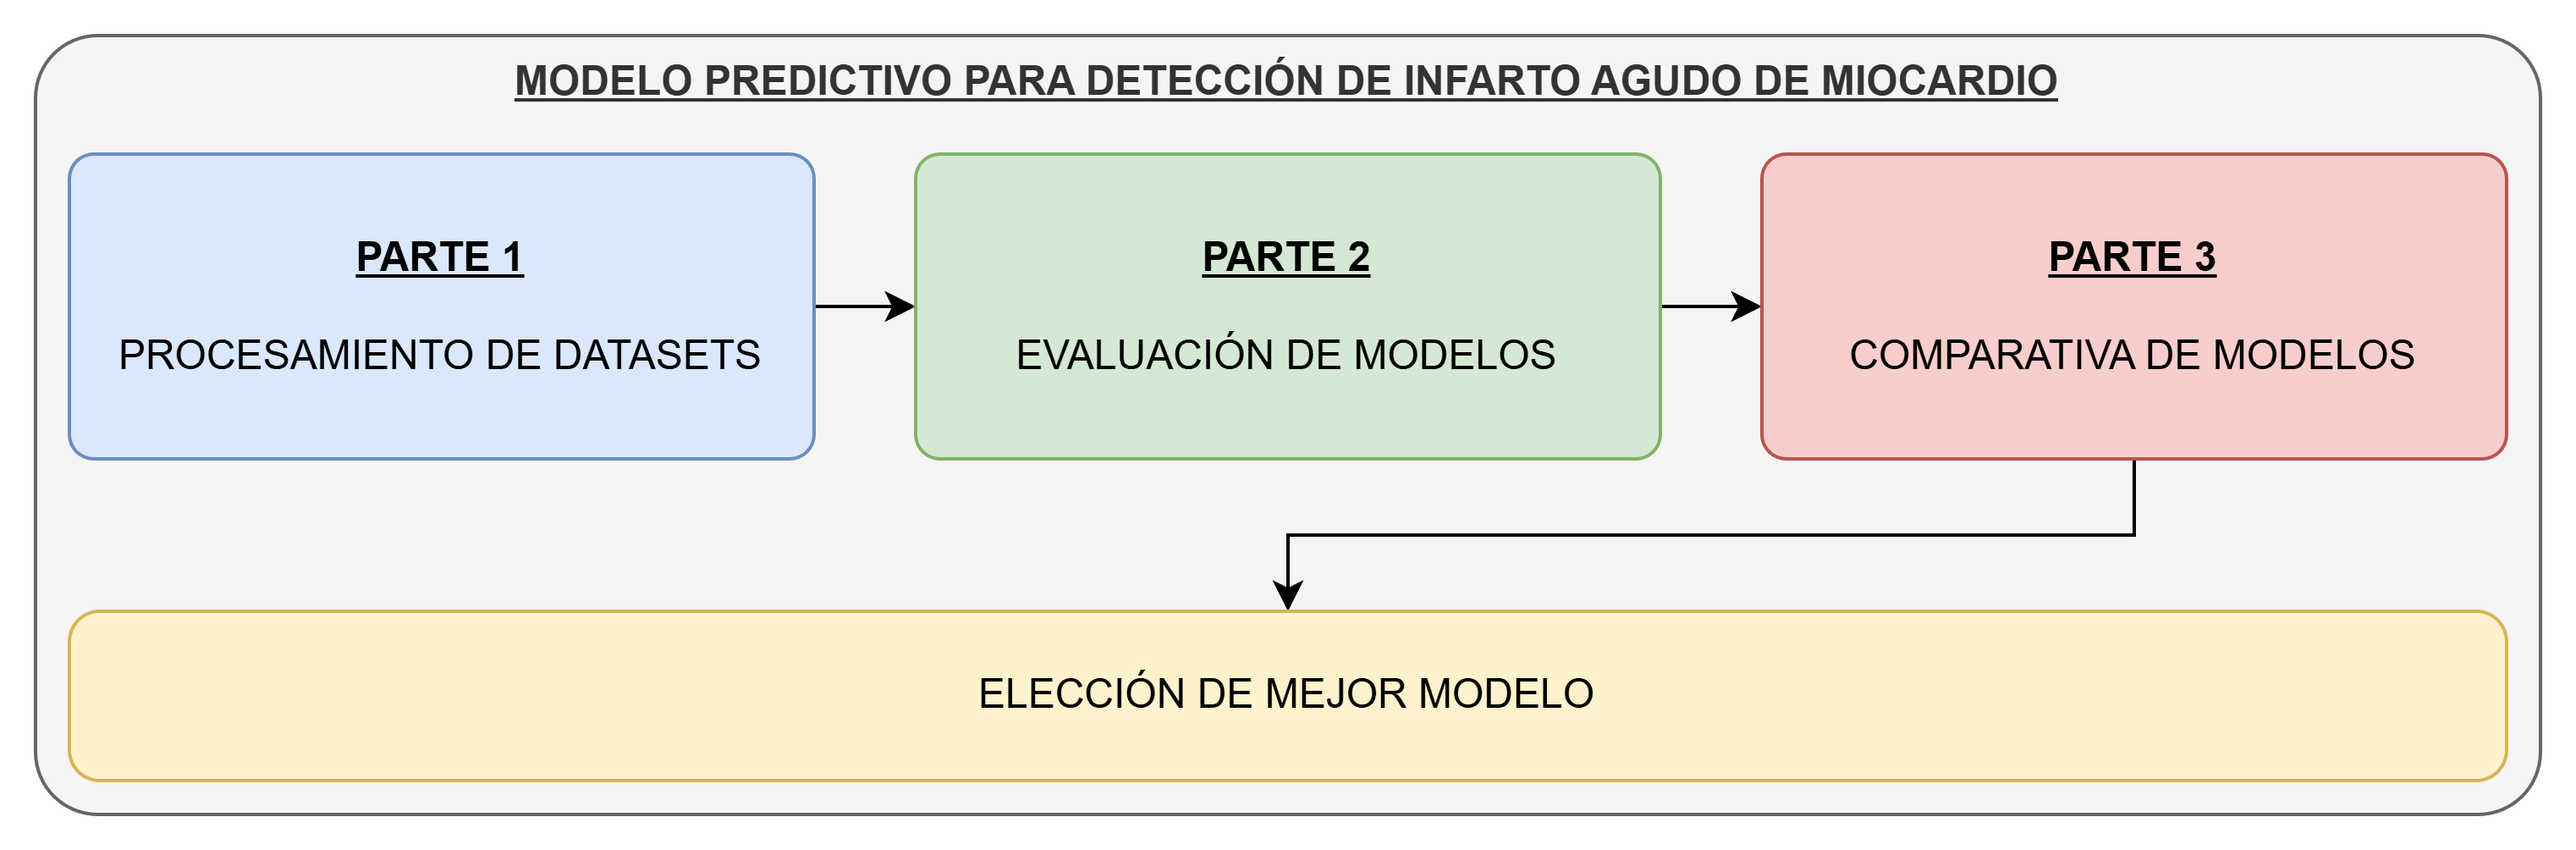

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


# 1) Importar Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)
from scipy.stats import pointbiserialr
import warnings
warnings.filterwarnings('ignore')

# 2) Configuración y Titulo

In [2]:
# Configuración de gráficos
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 11

# Configurar colores
colors_primary = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
colors_secondary = ['#3A86FF', '#06FFA5', '#FFBE0B', '#FB5607', '#FF006E']

print("="*90)
print("ANÁLISIS PREDICTIVO DE ENFERMEDADES CARDIOVASCULARES - VERSIÓN 3")
print("Dataset Principal: Dataset Primario con Variables PRE-INFARTO")
print("Incluye: Gráficos EDA + Boxplots de Outliers + Matriz de Correlación")
print("="*90)

ANÁLISIS PREDICTIVO DE ENFERMEDADES CARDIOVASCULARES - VERSIÓN 3
Dataset Principal: Dataset Primario con Variables PRE-INFARTO
Incluye: Gráficos EDA + Boxplots de Outliers + Matriz de Correlación


# 3) ETAPA 1: ANÁLISIS EXPLORATORIO DE DATOS - COMPARACIÓN DE 4 DATASETS

## 3.1) Cargar los archivos desde Google Drive

In [3]:
print("\n🔍 ETAPA 1: ANÁLISIS EXPLORATORIO DE DATOS CON VISUALIZACIONES")
print("-" * 60)

# 1.1) Importar los 4 datasets desde archivos locales (Google Drive)
print("\n1.1) Cargando los 4 datasets desde Google Drive...")

try:
    # Dataset PRINCIPAL - Dataset Primario
    # df_primario = pd.read_csv('/content/drive/MyDrive/datasets/Dataset Primario.csv')
    df_primario = pd.read_csv('../data/raw/Dataset Primario.csv')
    print(f"✓ Dataset Primario cargado: {df_primario.shape}")

    # Dataset Comparativo 1 - Heart Failure Clinical Records
    # df_heart_failure = pd.read_csv('/content/drive/MyDrive/datasets/heart_failure_clinical_records_dataset.csv')
    df_heart_failure = pd.read_csv('../data/raw/heart_failure_clinical_records_dataset.csv')
    print(f"✓ Heart Failure Clinical Records cargado: {df_heart_failure.shape}")

    # Dataset Comparativo 2 - Heart.csv
    df_heart = pd.read_csv('../data/raw/heart.csv')
    # df_heart = pd.read_csv('/content/drive/MyDrive/datasets/heart.csv')
    print(f"✓ Heart.csv cargado: {df_heart.shape}")

    # Dataset Comparativo 3 - Cardio Train
    df_cardio = pd.read_csv('../data/raw/cardio_train.csv', sep=';')
    # df_cardio = pd.read_csv('/content/drive/MyDrive/datasets/cardio_train.csv', sep=';')
    print(f"✓ Cardio Train cargado: {df_cardio.shape}")

except FileNotFoundError as e:
    print(f"❌ Error al cargar archivos: {e}")
    print("📁 Asegúrate de que los archivos estén en /content/drive/MyDrive/datasets/")


🔍 ETAPA 1: ANÁLISIS EXPLORATORIO DE DATOS CON VISUALIZACIONES
------------------------------------------------------------

1.1) Cargando los 4 datasets desde Google Drive...
✓ Dataset Primario cargado: (1319, 9)
✓ Heart Failure Clinical Records cargado: (299, 13)
✓ Heart.csv cargado: (918, 12)
✓ Cardio Train cargado: (70000, 13)


### 3.1.1) Gráfico de Información General de Datasets


1.2) 📊 VISUALIZACIÓN DE INFORMACIÓN GENERAL DE DATASETS


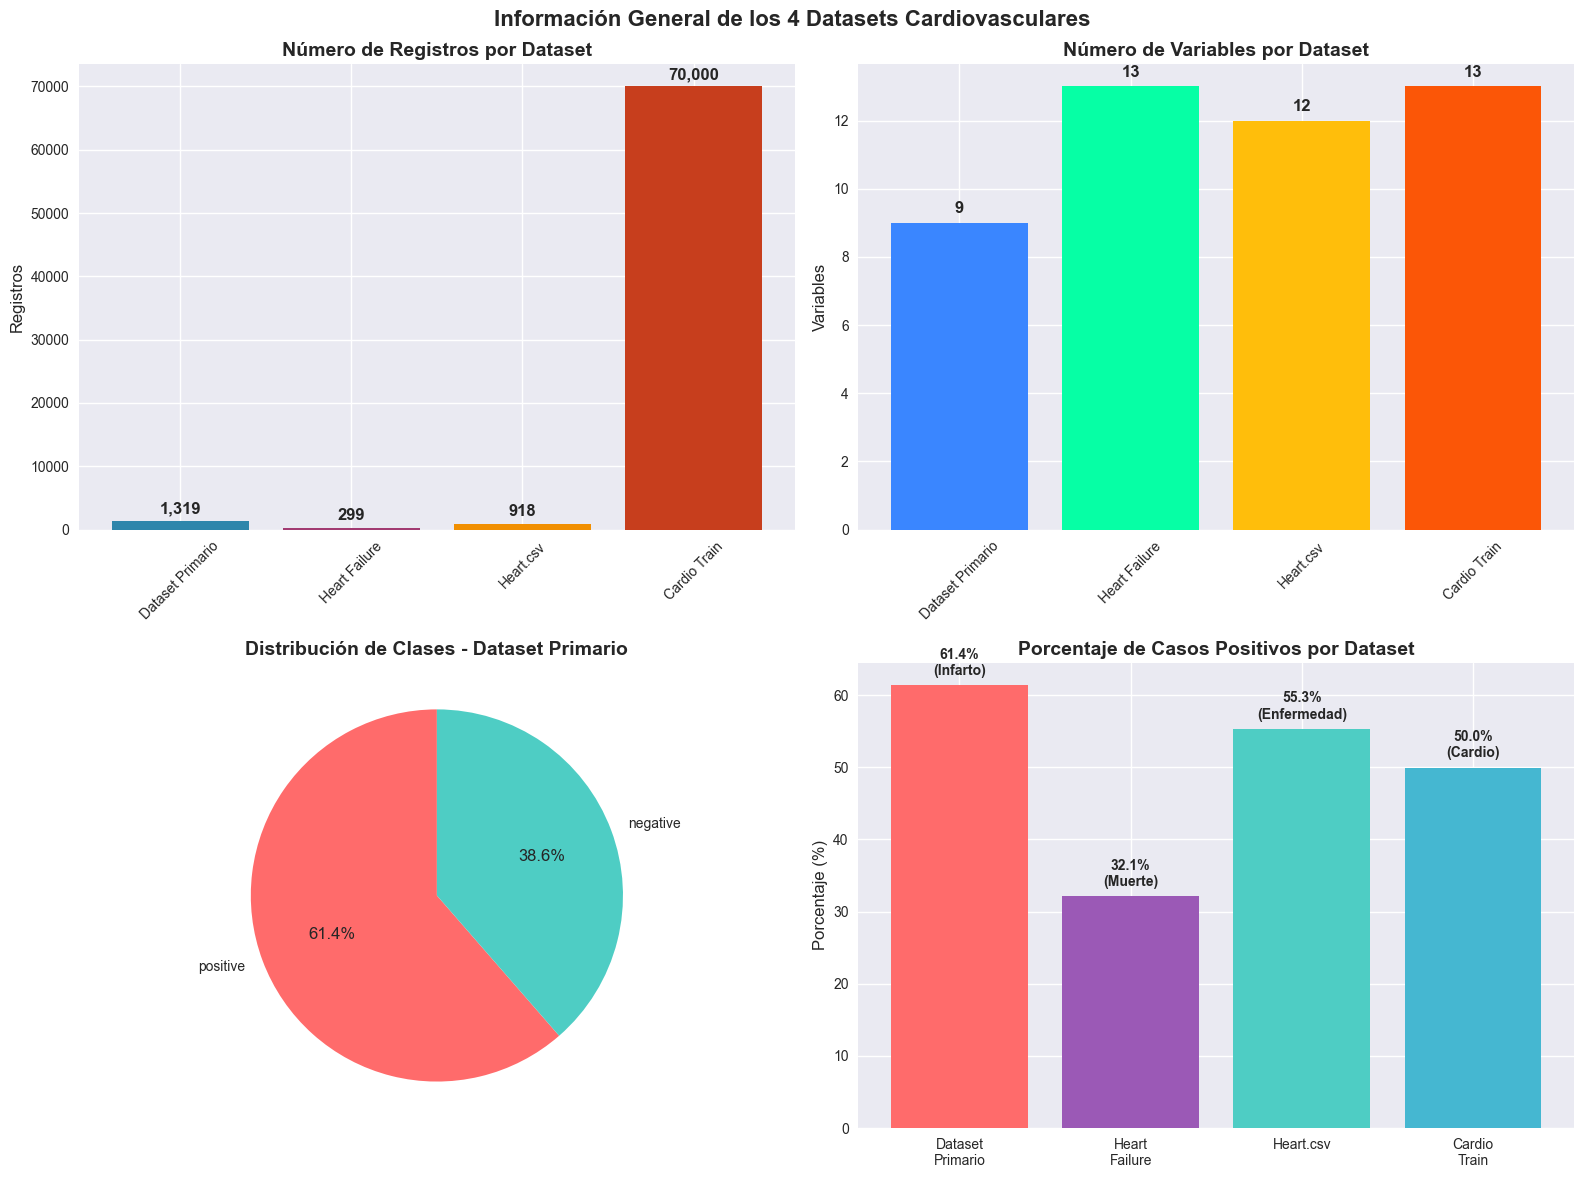

In [4]:
print("\n1.2) 📊 VISUALIZACIÓN DE INFORMACIÓN GENERAL DE DATASETS")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Información General de los 4 Datasets Cardiovasculares', fontsize=16, fontweight='bold')

# Gráfico 1: Número de registros por dataset
datasets_nombres = ['Dataset Primario', 'Heart Failure', 'Heart.csv', 'Cardio Train']
datasets_registros = [df_primario.shape[0], df_heart_failure.shape[0], df_heart.shape[0], df_cardio.shape[0]]

bars1 = ax1.bar(datasets_nombres, datasets_registros, color=colors_primary)
ax1.set_title('Número de Registros por Dataset', fontweight='bold')
ax1.set_ylabel('Registros')
ax1.tick_params(axis='x', rotation=45)

# Agregar etiquetas en las barras
for bar, valor in zip(bars1, datasets_registros):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(datasets_registros)*0.01,
             f'{valor:,}', ha='center', va='bottom', fontweight='bold')
# Gráfico 2: Número de variables por dataset
datasets_variables = [df_primario.shape[1], df_heart_failure.shape[1], df_heart.shape[1], df_cardio.shape[1]]

bars2 = ax2.bar(datasets_nombres, datasets_variables, color=colors_secondary[:4])
ax2.set_title('Número de Variables por Dataset', fontweight='bold')
ax2.set_ylabel('Variables')
ax2.tick_params(axis='x', rotation=45)

# Agregar etiquetas en las barras
for bar, valor in zip(bars2, datasets_variables):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
             f'{valor}', ha='center', va='bottom', fontweight='bold')

# Gráfico 3: Distribución de variable objetivo - Dataset Primario
result_counts = df_primario['Result'].value_counts()
colors_pie = ['#FF6B6B', '#4ECDC4']
wedges, texts, autotexts = ax3.pie(result_counts.values, labels=result_counts.index, autopct='%1.1f%%',
                                  colors=colors_pie, startangle=90)
ax3.set_title('Distribución de Clases - Dataset Primario', fontweight='bold')

# Gráfico 4: Comparación de balances de clases - TODOS LOS DATASETS
heart_failure_counts = df_heart_failure['DEATH_EVENT'].value_counts()
heart_disease_counts = df_heart['HeartDisease'].value_counts()
cardio_counts = df_cardio['cardio'].value_counts()

# Incluir los 4 datasets
datasets_balance = ['Dataset\nPrimario', 'Heart\nFailure', 'Heart.csv', 'Cardio\nTrain']
positive_ratios = [
    result_counts['positive'] / result_counts.sum() * 100,  # Dataset Primario (positive)
    heart_failure_counts[1] / heart_failure_counts.sum() * 100,  # Heart Failure (muerte=1)
    heart_disease_counts[1] / heart_disease_counts.sum() * 100,  # Heart.csv (enfermedad=1)
    cardio_counts[1] / cardio_counts.sum() * 100  # Cardio Train (cardio=1)
]

bars4 = ax4.bar(datasets_balance, positive_ratios, color=['#FF6B6B', '#9B59B6', '#4ECDC4', '#45B7D1'])
ax4.set_title('Porcentaje de Casos Positivos por Dataset', fontweight='bold')
ax4.set_ylabel('Porcentaje (%)')
ax4.tick_params(axis='x', rotation=0)

# Agregar etiquetas en las barras con información específica
labels_detail = [
    f'{positive_ratios[0]:.1f}%\n(Infarto)',
    f'{positive_ratios[1]:.1f}%\n(Muerte)',
    f'{positive_ratios[2]:.1f}%\n(Enfermedad)',
    f'{positive_ratios[3]:.1f}%\n(Cardio)'
]

for bar, label in zip(bars4, labels_detail):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             label, ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

### 3.1.2) PROCESAMIENTO PRINCIPAL: Dataset Primario con Visualizaciones


 Dataset Primario - Información inicial:
Forma: (1319, 9)

Primeras 5 filas:
   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
0   64       1          66                      160                        83   
1   21       1          94                       98                        46   
2   55       1          64                      160                        77   
3   64       1          70                      120                        55   
4   55       1          64                      112                        65   

   Blood sugar  CK-MB  Troponin    Result  
0        160.0   1.80     0.012  negative  
1        296.0   6.75     1.060  positive  
2        270.0   1.99     0.003  negative  
3        270.0  13.87     0.122  positive  
4        300.0   1.08     0.003  negative  

1.3) 🚨 ELIMINANDO VARIABLES POST-INFARTO con Visualización...


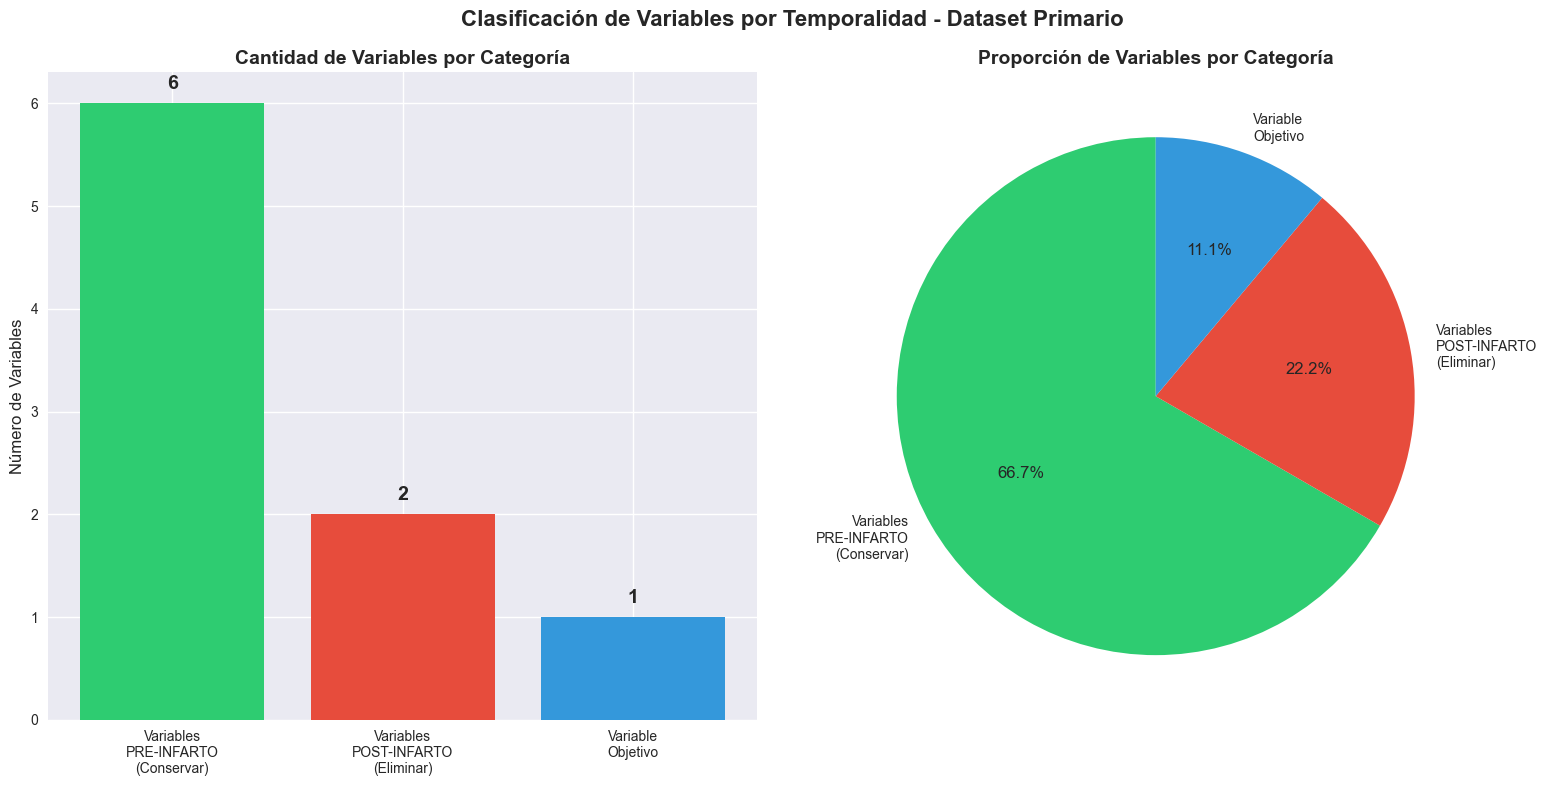


 Eliminando variables post-infarto: ['CK-MB', 'Troponin']
 Variables conservadas (PRE-INFARTO): ['Age', 'Gender', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'Result']
 Dimensiones después de eliminación: (1319, 7)

1.4) Procesando variables categóricas con visualización...


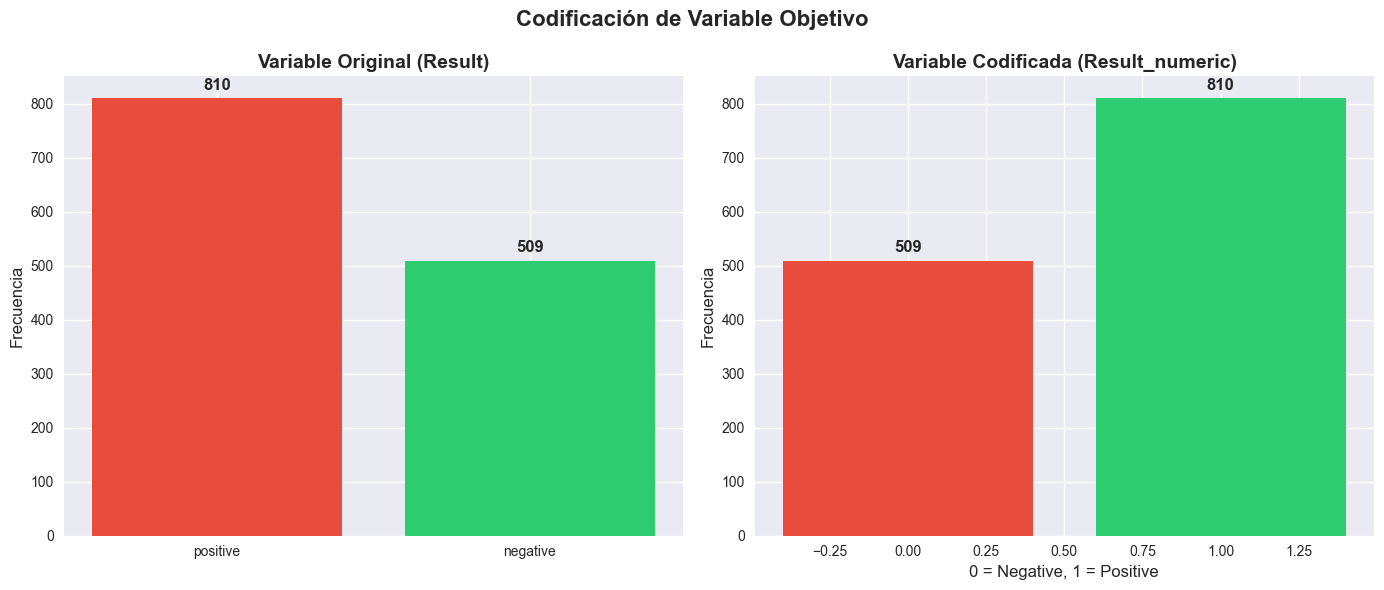

In [5]:
# Trabajar con una copia del dataset principal
df_principal = df_primario.copy()

print(f"\n Dataset Primario - Información inicial:")
print(f"Forma: {df_principal.shape}")
print(f"\nPrimeras 5 filas:")
print(df_principal.head())

# 1.3) Eliminar variables post-infarto y crear visualización
print(f"\n1.3) 🚨 ELIMINANDO VARIABLES POST-INFARTO con Visualización...")

# Visualización de clasificación de variables por temporalidad
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Clasificación de Variables por Temporalidad - Dataset Primario', fontsize=16, fontweight='bold')

# Variables PRE-INFARTO vs POST-INFARTO
variables_pre = ['Age', 'Gender', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar']
variables_post = ['CK-MB', 'Troponin']

# Gráfico de barras para mostrar cantidad de variables
categorias = ['Variables\nPRE-INFARTO\n(Conservar)', 'Variables\nPOST-INFARTO\n(Eliminar)', 'Variable\nObjetivo']
cantidades = [len(variables_pre), len(variables_post), 1]
colores = ['#2ECC71', '#E74C3C', '#3498DB']

bars = ax1.bar(categorias, cantidades, color=colores)
ax1.set_title('Cantidad de Variables por Categoría', fontweight='bold')
ax1.set_ylabel('Número de Variables')

# Agregar etiquetas
for bar, cantidad in zip(bars, cantidades):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'{cantidad}', ha='center', va='bottom', fontweight='bold', fontsize=14)

# Gráfico circular para mostrar proporción
ax2.pie(cantidades, labels=categorias, autopct='%1.1f%%', colors=colores, startangle=90)
ax2.set_title('Proporción de Variables por Categoría', fontweight='bold')

plt.tight_layout()
plt.show()

# Eliminar variables post-infarto
variables_post_infarto = ['CK-MB', 'Troponin']
variables_conservar = [col for col in df_principal.columns if col not in variables_post_infarto]

print(f"\n Eliminando variables post-infarto: {variables_post_infarto}")
df_principal = df_principal[variables_conservar]

print(f" Variables conservadas (PRE-INFARTO): {list(df_principal.columns)}")
print(f" Dimensiones después de eliminación: {df_principal.shape}")

# 1.4) Procesar variables categóricas con visualización
print(f"\n1.4) Procesando variables categóricas con visualización...")

# Convertir Result a numérico
le_result = LabelEncoder()
df_principal['Result_numeric'] = le_result.fit_transform(df_principal['Result'])

# Verificar codificación con gráfico
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Codificación de Variable Objetivo', fontsize=16, fontweight='bold')

# Gráfico original
result_counts = df_principal['Result'].value_counts()
ax1.bar(result_counts.index, result_counts.values, color=['#E74C3C', '#2ECC71'])
ax1.set_title('Variable Original (Result)', fontweight='bold')
ax1.set_ylabel('Frecuencia')
for i, v in enumerate(result_counts.values):
    ax1.text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

# Gráfico codificado
result_numeric_counts = df_principal['Result_numeric'].value_counts().sort_index()
ax2.bar(result_numeric_counts.index, result_numeric_counts.values, color=['#E74C3C', '#2ECC71'])
ax2.set_title('Variable Codificada (Result_numeric)', fontweight='bold')
ax2.set_ylabel('Frecuencia')
ax2.set_xlabel('0 = Negative, 1 = Positive')
for i, v in enumerate(result_numeric_counts.values):
    ax2.text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 3.2) Describir y sacar información detallada de los 4 datasets

In [6]:
datasets_info = {
    '1 - Dataset Primario (PRINCIPAL)': {
        'data': df_primario,
        'descripcion': 'Dataset con biomarcadores cardíacos específicos para predicción de infarto',
        'variable_objetivo': 'Result',
        'tipo_objetivo': 'negative/positive',
        'fortalezas': [
            'Biomarcadores específicos (CK-MB, Troponina)',
            'Variables clínicas directamente relacionadas con infarto',
            'Buen balance de clases',
            'Variables fisiológicas fundamentales'
        ],
        'variables_clave': ['CK-MB', 'Troponin', 'Blood pressure', 'Heart rate']
    },

    '2 - Heart Failure Clinical Records': {
        'data': df_heart_failure,
        'descripcion': 'Dataset clínico enfocado en falla cardíaca y mortalidad',
        'variable_objetivo': 'DEATH_EVENT',
        'tipo_objetivo': '0/1 (supervivencia/muerte)',
        'fortalezas': [
            'Variables clínicas específicas de falla cardíaca',
            'Datos de seguimiento temporal',
            'Fracción de eyección (indicador crítico)',
            'Biomarcadores renales y hematológicos'
        ],
        'variables_clave': ['ejection_fraction', 'serum_creatinine', 'time', 'platelets']
    },

    '3 - Heart.csv': {
        'data': df_heart,
        'descripcion': 'Dataset estándar para ML cardiovascular con variables diversas',
        'variable_objetivo': 'HeartDisease',
        'tipo_objetivo': '0/1 (sin/con enfermedad)',
        'fortalezas': [
            'Variables diversas y completas',
            'Ampliamente utilizado en ML cardiovascular',
            'Incluye ECG y pruebas de esfuerzo',
            'Variables de dolor torácico'
        ],
        'variables_clave': ['ChestPainType', 'MaxHR', 'ST_Slope', 'Oldpeak']
    },

    '4 - Cardio Train': {
        'data': df_cardio,
        'descripcion': 'Dataset masivo con variables antropométricas y de estilo de vida',
        'variable_objetivo': 'cardio',
        'tipo_objetivo': '0/1 (sin/con enfermedad cardiovascular)',
        'fortalezas': [
            'Muestra muy grande (70,000+ registros)',
            'Variables antropométricas (altura, peso)',
            'Factores de estilo de vida (fumar, alcohol, actividad)',
            'Excelente para validación estadística'
        ],
        'variables_clave': ['height', 'weight', 'ap_hi', 'ap_lo', 'smoke', 'active']
    }
}

for nombre, info in datasets_info.items():
    print(f"\n{nombre}")
    print(f"   * Forma: {info['data'].shape}")
    print(f"   * Descripción: {info['descripcion']}")
    print(f"   * Variable objetivo: {info['variable_objetivo']} ({info['tipo_objetivo']})")
    print(f"   * Columnas: {list(info['data'].columns)}")
    print(f"   * Variables clave: {', '.join(info['variables_clave'])}")
    print(f"   * Fortalezas:")
    for fortaleza in info['fortalezas']:
        print(f"      • {fortaleza}")



1 - Dataset Primario (PRINCIPAL)
   * Forma: (1319, 9)
   * Descripción: Dataset con biomarcadores cardíacos específicos para predicción de infarto
   * Variable objetivo: Result (negative/positive)
   * Columnas: ['Age', 'Gender', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin', 'Result']
   * Variables clave: CK-MB, Troponin, Blood pressure, Heart rate
   * Fortalezas:
      • Biomarcadores específicos (CK-MB, Troponina)
      • Variables clínicas directamente relacionadas con infarto
      • Buen balance de clases
      • Variables fisiológicas fundamentales

2 - Heart Failure Clinical Records
   * Forma: (299, 13)
   * Descripción: Dataset clínico enfocado en falla cardíaca y mortalidad
   * Variable objetivo: DEATH_EVENT (0/1 (supervivencia/muerte))
   * Columnas: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smo

In [7]:
# Análisis de distribución de clases para cada dataset
print(f"\n Distribución de la variable objetivo por dataset:")

for nombre, info in datasets_info.items():
    data = info['data']
    var_obj = info['variable_objetivo']

    print(f"\n{nombre}:")
    if var_obj in data.columns:
        distribucion = data[var_obj].value_counts()
        total = len(data)
        print(f"   Distribución: {dict(distribucion)}")
        for valor, cantidad in distribucion.items():
            porcentaje = (cantidad/total)*100
            print(f"   {valor}: {cantidad} ({porcentaje:.1f}%)")
    else:
        print(f"    Variable objetivo '{var_obj}' no encontrada")


 Distribución de la variable objetivo por dataset:

1 - Dataset Primario (PRINCIPAL):
   Distribución: {'positive': np.int64(810), 'negative': np.int64(509)}
   positive: 810 (61.4%)
   negative: 509 (38.6%)

2 - Heart Failure Clinical Records:
   Distribución: {0: np.int64(203), 1: np.int64(96)}
   0: 203 (67.9%)
   1: 96 (32.1%)

3 - Heart.csv:
   Distribución: {1: np.int64(508), 0: np.int64(410)}
   1: 508 (55.3%)
   0: 410 (44.7%)

4 - Cardio Train:
   Distribución: {0: np.int64(35021), 1: np.int64(34979)}
   0: 35021 (50.0%)
   1: 34979 (50.0%)


In [8]:
print(f"\n- PROCESAMIENTO PRINCIPAL: Dataset Primario")
print("=" * 50)

# Trabajar con una copia del dataset principal
df_principal = df_primario.copy()

print(f"\n Dataset Primario - Información inicial:")
print(f"Forma: {df_principal.shape}")
print(f"\nInfo del dataset:")
print(df_principal.info())

print(f"\n Primeras 5 filas:")
print(df_principal.head())

print(f"\n Estadísticas descriptivas:")
print(df_principal.describe())



- PROCESAMIENTO PRINCIPAL: Dataset Primario

 Dataset Primario - Información inicial:
Forma: (1319, 9)

Info del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB
None

 Primeras 5 filas:
   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure 



> Se observa un dataset íntegro con registros completos y sin falta de valores o NA's





## 3.3) **Eliminar** columnas no requeridas

In [9]:
print(" ANÁLISIS DE RELEVANCIA - Dataset Primario:")
relevancia_columnas = {
    'Age': ' CRÍTICA - Factor de riesgo fundamental',
    'Gender': ' CRÍTICA - Diferencias de riesgo por sexo',
    'Heart rate': ' CRÍTICA - Indicador fisiológico directo',
    'Systolic blood pressure': ' CRÍTICA - Factor de riesgo mayor',
    'Diastolic blood pressure': ' CRÍTICA - Complementa presión sistólica',
    'Blood sugar': ' CRÍTICA - Diabetes como factor de riesgo',
    'CK-MB': ' BIOMARCADOR ESPECÍFICO - Indica daño miocárdico',
    'Troponin': ' BIOMARCADOR ESPECÍFICO - Gold standard para infarto',
    'Result': ' VARIABLE OBJETIVO'
}

for columna, relevancia in relevancia_columnas.items():
    print(f"   * {columna}: {relevancia}")

print(f"\n✓ DECISIÓN: Se conservan TODAS las variables del Dataset Primario")
print(f"  Razón: Todas son clínicamente relevantes para predicción de infarto")


 ANÁLISIS DE RELEVANCIA - Dataset Primario:
   * Age:  CRÍTICA - Factor de riesgo fundamental
   * Gender:  CRÍTICA - Diferencias de riesgo por sexo
   * Heart rate:  CRÍTICA - Indicador fisiológico directo
   * Systolic blood pressure:  CRÍTICA - Factor de riesgo mayor
   * Diastolic blood pressure:  CRÍTICA - Complementa presión sistólica
   * Blood sugar:  CRÍTICA - Diabetes como factor de riesgo
   * CK-MB:  BIOMARCADOR ESPECÍFICO - Indica daño miocárdico
   * Troponin:  BIOMARCADOR ESPECÍFICO - Gold standard para infarto
   * Result:  VARIABLE OBJETIVO

✓ DECISIÓN: Se conservan TODAS las variables del Dataset Primario
  Razón: Todas son clínicamente relevantes para predicción de infarto


## 3.4) Procesar variables categóricas

In [10]:
# Analizar tipos de datos
print(f"Tipos de datos por columna:")
for col in df_principal.columns:
    tipo = df_principal[col].dtype
    valores_unicos = df_principal[col].nunique()
    print(f"   {col}: {tipo} ({valores_unicos} valores únicos)")

# Convertir Result a numérico
print(f"\n Codificación de variable objetivo 'Result':")
valores_result = df_principal['Result'].value_counts()
print(f"Valores originales: {dict(valores_result)}")

le_result = LabelEncoder()
df_principal['Result_numeric'] = le_result.fit_transform(df_principal['Result'])

print(f"✓ Codificación aplicada:")
print(f"   'negative' → 0 (No infarto)")
print(f"   'positive' → 1 (Infarto)")

# Verificar codificación
codificacion_verificacion = df_principal[['Result', 'Result_numeric']].drop_duplicates().sort_values('Result_numeric')
print(f"\nVerificación de codificación:")
print(codificacion_verificacion)

Tipos de datos por columna:
   Age: int64 (75 valores únicos)
   Gender: int64 (2 valores únicos)
   Heart rate: int64 (79 valores únicos)
   Systolic blood pressure: int64 (116 valores únicos)
   Diastolic blood pressure: int64 (73 valores únicos)
   Blood sugar: float64 (244 valores únicos)
   CK-MB: float64 (700 valores únicos)
   Troponin: float64 (352 valores únicos)
   Result: object (2 valores únicos)

 Codificación de variable objetivo 'Result':
Valores originales: {'positive': np.int64(810), 'negative': np.int64(509)}
✓ Codificación aplicada:
   'negative' → 0 (No infarto)
   'positive' → 1 (Infarto)

Verificación de codificación:
     Result  Result_numeric
0  negative               0
1  positive               1


## 3.5) Renombrar columnas al Español

In [11]:
columnas_espanol = {
    'Age': 'Edad',
    'Gender': 'Genero',
    'Heart rate': 'Frecuencia_Cardiaca',
    'Systolic blood pressure': 'Presion_Sistolica',
    'Diastolic blood pressure': 'Presion_Diastolica',
    'Blood sugar': 'Glucemia',
    'CK-MB': 'CK_MB',
    'Troponin': 'Troponina',
    'Result': 'Resultado',
    'Result_numeric': 'Resultado_Numerico'
}

In [12]:
df_principal = df_principal.rename(columns=columnas_espanol)

print(f"✓ Columnas renombradas:")
for old, new in columnas_espanol.items():
    print(f"   {old} → {new}")

print(f"\n📋 Nuevas columnas: {list(df_principal.columns)}")

✓ Columnas renombradas:
   Age → Edad
   Gender → Genero
   Heart rate → Frecuencia_Cardiaca
   Systolic blood pressure → Presion_Sistolica
   Diastolic blood pressure → Presion_Diastolica
   Blood sugar → Glucemia
   CK-MB → CK_MB
   Troponin → Troponina
   Result → Resultado
   Result_numeric → Resultado_Numerico

📋 Nuevas columnas: ['Edad', 'Genero', 'Frecuencia_Cardiaca', 'Presion_Sistolica', 'Presion_Diastolica', 'Glucemia', 'CK_MB', 'Troponina', 'Resultado', 'Resultado_Numerico']


## 3.6) Eliminar registros NA

In [13]:
print(f"Valores faltantes por columna:")
missing_values = df_principal.isnull().sum()
missing_percent = (missing_values / len(df_principal)) * 100

for col in df_principal.columns:
    if missing_values[col] > 0:
        print(f"   {col}: {missing_values[col]} ({missing_percent[col]:.2f}%)")

if missing_values.sum() == 0:
    print("¡Excelente! No hay valores faltantes en el dataset")
    df_principal_clean = df_principal.copy()
else:
    print(f"\n🧹 Eliminando registros con valores faltantes...")
    df_principal_clean = df_principal.dropna()
    registros_eliminados = len(df_principal) - len(df_principal_clean)
    porcentaje_eliminado = (registros_eliminados / len(df_principal)) * 100

    print(f"✓ Registros eliminados: {registros_eliminados} ({porcentaje_eliminado:.2f}%)")

print(f"✓ Dataset limpio: {df_principal_clean.shape}")


Valores faltantes por columna:
¡Excelente! No hay valores faltantes en el dataset
✓ Dataset limpio: (1319, 10)


## 3.7) Detectar y Eliminar Registros Duplicados

In [14]:
# Verificar duplicados completos
duplicados_completos = df_principal_clean.duplicated().sum()
print(f" Registros completamente duplicados: {duplicados_completos}")

# Verificar duplicados sin considerar la variable objetivo
cols_sin_objetivo = [col for col in df_principal_clean.columns if col not in ['Resultado', 'Resultado_Numerico']]
duplicados_caracteristicas = df_principal_clean.duplicated(subset=cols_sin_objetivo).sum()
print(f" Registros con características duplicadas: {duplicados_caracteristicas}")

if duplicados_completos > 0:
    df_principal_final = df_principal_clean.drop_duplicates()
    eliminados = len(df_principal_clean) - len(df_principal_final)
    print(f"✓ Registros duplicados eliminados: {eliminados}")
else:
    df_principal_final = df_principal_clean.copy()
    print(" No se encontraron registros duplicados")

print(f"✓ Dataset final: {df_principal_final.shape}")

 Registros completamente duplicados: 0
 Registros con características duplicadas: 0
 No se encontraron registros duplicados
✓ Dataset final: (1319, 10)


## 3.8) Verificar Datos Atípicos

In [15]:

# Definir rangos médicos normales
rangos_medicos = {
    'Edad': (0, 120, 'años'),
    'Frecuencia_Cardiaca': (30, 220, 'lpm'),
    'Presion_Sistolica': (70, 250, 'mmHg'),
    'Presion_Diastolica': (40, 150, 'mmHg'),
    'Glucemia': (50, 600, 'mg/dL'),
    'CK_MB': (0, 50, 'ng/mL'),
    'Troponina': (0, 10, 'ng/mL')
}

print(f" Verificación de rangos médicos:")
outliers_medicos = {}

for columna, (limite_inf, limite_sup, unidad) in rangos_medicos.items():
    if columna in df_principal_final.columns:
        fuera_rango = df_principal_final[
            (df_principal_final[columna] < limite_inf) |
            (df_principal_final[columna] > limite_sup)
        ]
        outliers_medicos[columna] = len(fuera_rango)

        if len(fuera_rango) > 0:
            print(f"    {columna}: {len(fuera_rango)} valores fuera del rango normal ({limite_inf}-{limite_sup} {unidad})")
            valores_extremos = fuera_rango[columna].describe()
            print(f"      Valores extremos: min={valores_extremos['min']:.2f}, max={valores_extremos['max']:.2f}")
        else:
            print(f"    {columna}: Todos los valores en rango normal ({limite_inf}-{limite_sup} {unidad})")

# Análisis estadístico de outliers usando IQR
print(f"\n Análisis estadístico de outliers (Método IQR):")
outliers_estadisticos = {}

for columna in ['Edad', 'Frecuencia_Cardiaca', 'Presion_Sistolica', 'Presion_Diastolica',
                'Glucemia', 'CK_MB', 'Troponina']:
    if columna in df_principal_final.columns:
        Q1 = df_principal_final[columna].quantile(0.25)
        Q3 = df_principal_final[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inf_iqr = Q1 - 1.5 * IQR
        limite_sup_iqr = Q3 + 1.5 * IQR

        outliers_iqr = df_principal_final[
            (df_principal_final[columna] < limite_inf_iqr) |
            (df_principal_final[columna] > limite_sup_iqr)
        ]

        outliers_estadisticos[columna] = len(outliers_iqr)
        porcentaje_outliers = (len(outliers_iqr) / len(df_principal_final)) * 100

        print(f"   {columna}: {len(outliers_iqr)} outliers ({porcentaje_outliers:.1f}%)")
        print(f"      Rango IQR: [{limite_inf_iqr:.2f}, {limite_sup_iqr:.2f}]")

 Verificación de rangos médicos:
    Edad: Todos los valores en rango normal (0-120 años)
    Frecuencia_Cardiaca: 5 valores fuera del rango normal (30-220 lpm)
      Valores extremos: min=20.00, max=1111.00
    Presion_Sistolica: 7 valores fuera del rango normal (70-250 mmHg)
      Valores extremos: min=42.00, max=67.00
    Presion_Diastolica: 2 valores fuera del rango normal (40-150 mmHg)
      Valores extremos: min=38.00, max=154.00
    Glucemia: 1 valores fuera del rango normal (50-600 mg/dL)
      Valores extremos: min=35.00, max=35.00
    CK_MB: 86 valores fuera del rango normal (0-50 ng/mL)
      Valores extremos: min=50.46, max=300.00
    Troponina: 1 valores fuera del rango normal (0-10 ng/mL)
      Valores extremos: min=10.30, max=10.30

 Análisis estadístico de outliers (Método IQR):
   Edad: 7 outliers (0.5%)
      Rango IQR: [20.00, 92.00]
   Frecuencia_Cardiaca: 30 outliers (2.3%)
      Rango IQR: [32.50, 116.50]
   Presion_Sistolica: 32 outliers (2.4%)
      Rango IQR: [

## 3.9) Matriz de Correlación

In [16]:
# Seleccionar solo variables numéricas
variables_numericas = df_principal_final.select_dtypes(include=[np.number]).columns
print(f"Variables numéricas para correlación: {list(variables_numericas)}")

# Calcular matriz de correlación
matriz_correlacion = df_principal_final[variables_numericas].corr()

# Mostrar correlaciones con la variable objetivo
print(f"\n Correlaciones con la variable objetivo (Resultado_Numerico):")
correlaciones_objetivo = matriz_correlacion['Resultado_Numerico'].sort_values(key=abs, ascending=False)

for variable, correlacion in correlaciones_objetivo.items():
    if variable != 'Resultado_Numerico':
        intensidad = " FUERTE" if abs(correlacion) > 0.7 else " MODERADA" if abs(correlacion) > 0.3 else " DÉBIL"
        direccion = " Positiva" if correlacion > 0 else " Negativa"
        print(f"   {variable}: {correlacion:.3f} ({intensidad}, {direccion})")

# Identificar correlaciones altas entre predictores (multicolinealidad)
print(f"\n Análisis de multicolinealidad (correlaciones > 0.8):")
correlaciones_altas = []
for i in range(len(matriz_correlacion.columns)):
    for j in range(i+1, len(matriz_correlacion.columns)):
        var1 = matriz_correlacion.columns[i]
        var2 = matriz_correlacion.columns[j]
        correlacion = matriz_correlacion.iloc[i, j]

        if abs(correlacion) > 0.8 and var1 != 'Resultado_Numerico' and var2 != 'Resultado_Numerico':
            correlaciones_altas.append((var1, var2, correlacion))
            print(f"    {var1} ↔ {var2}: {correlacion:.3f}")

if not correlaciones_altas:
    print("    No se detectó multicolinealidad severa entre predictores")

# Guardar el dataset principal procesado
print(f"\n Resumen del procesamiento del Dataset Primario:")
print(f"    Registros originales: {df_primario.shape[0]}")
print(f"    Registros finales: {df_principal_final.shape[0]}")
print(f"    Variables: {df_principal_final.shape[1]}")
print(f"    Variable objetivo: Resultado_Numerico")
print(f"    Dataset listo para modelado")

Variables numéricas para correlación: ['Edad', 'Genero', 'Frecuencia_Cardiaca', 'Presion_Sistolica', 'Presion_Diastolica', 'Glucemia', 'CK_MB', 'Troponina', 'Resultado_Numerico']

 Correlaciones con la variable objetivo (Resultado_Numerico):
   Edad: 0.238 ( DÉBIL,  Positiva)
   Troponina: 0.229 ( DÉBIL,  Positiva)
   CK_MB: 0.218 ( DÉBIL,  Positiva)
   Genero: 0.094 ( DÉBIL,  Positiva)
   Glucemia: -0.033 ( DÉBIL,  Negativa)
   Presion_Sistolica: -0.021 ( DÉBIL,  Negativa)
   Presion_Diastolica: -0.010 ( DÉBIL,  Negativa)
   Frecuencia_Cardiaca: 0.007 ( DÉBIL,  Positiva)

 Análisis de multicolinealidad (correlaciones > 0.8):
    No se detectó multicolinealidad severa entre predictores

 Resumen del procesamiento del Dataset Primario:
    Registros originales: 1319
    Registros finales: 1319
    Variables: 10
    Variable objetivo: Resultado_Numerico
    Dataset listo para modelado


## 3.10) OTROS ANÁLISIS EDA


📊 1. Distribuciones de Variables Numéricas PRE-INFARTO


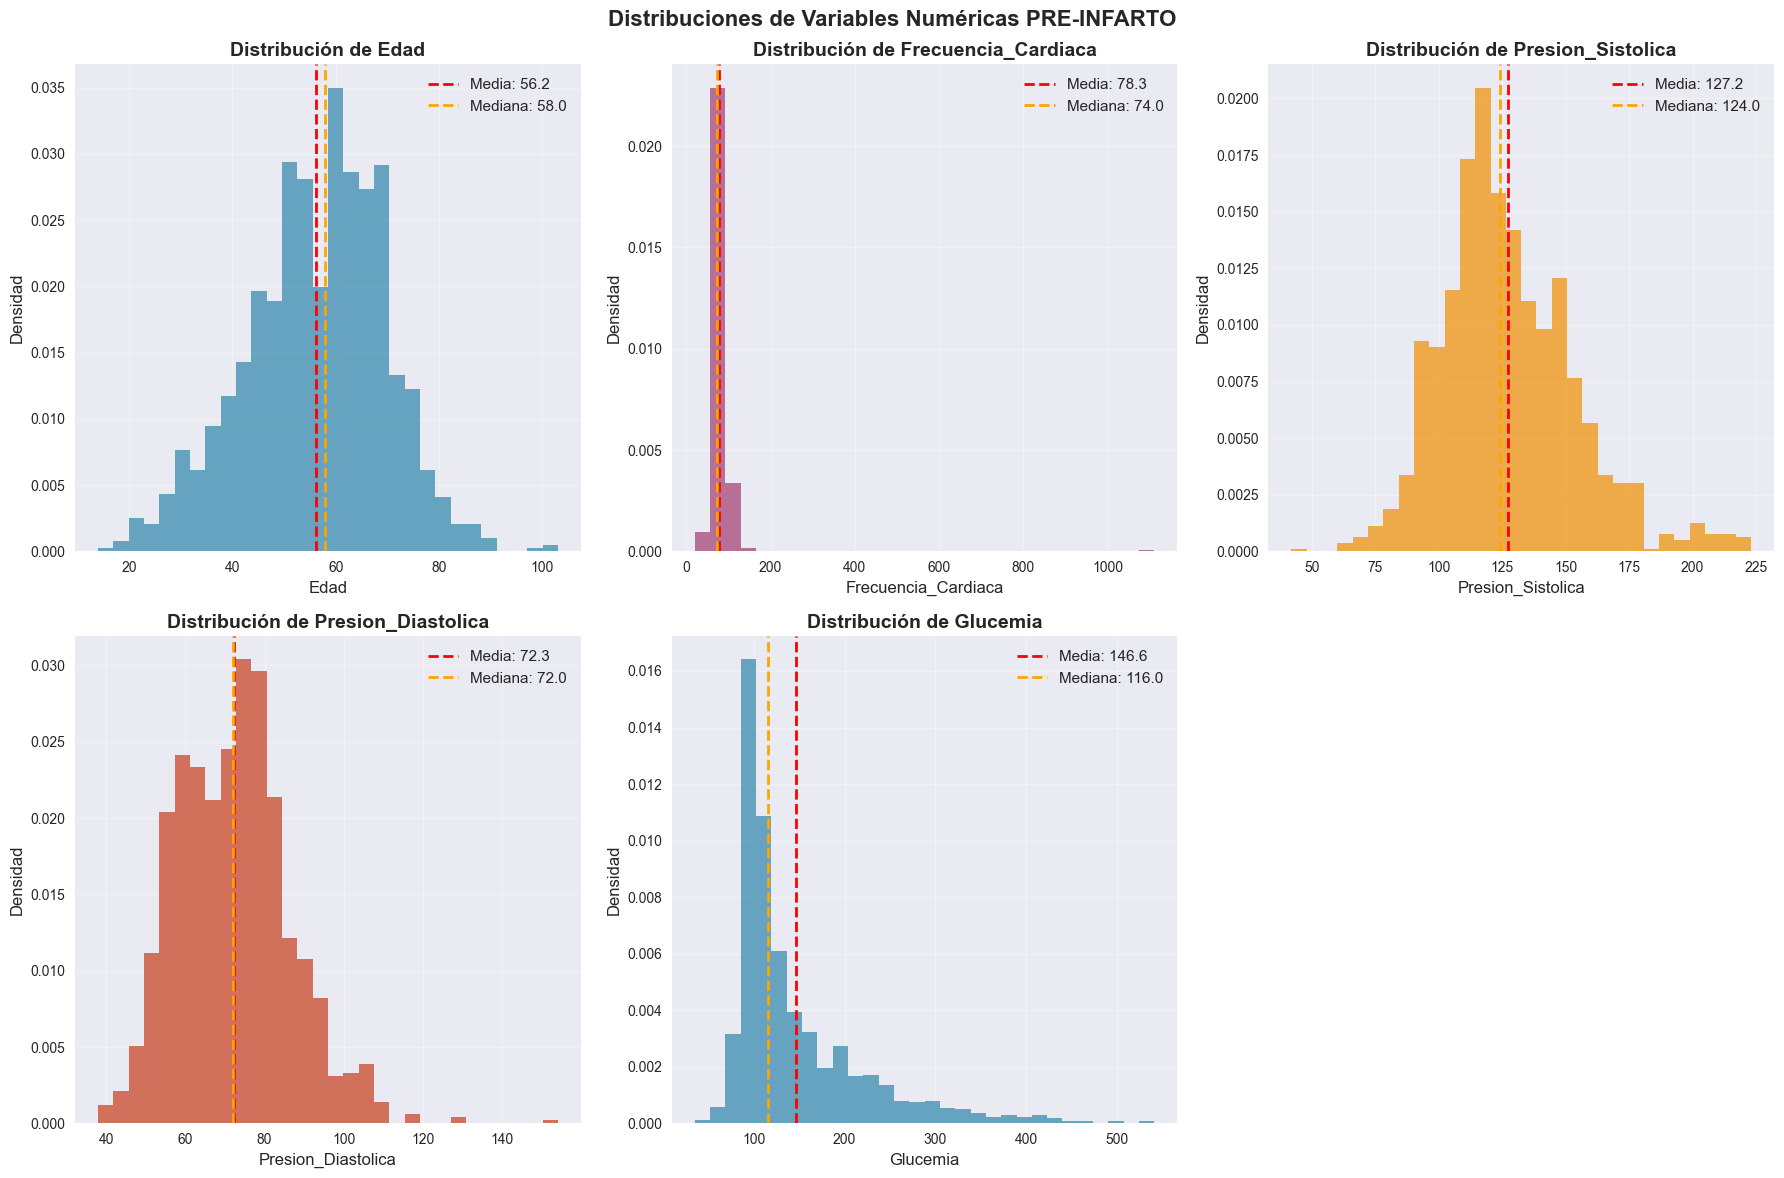

In [17]:
# EDA 1: Distribuciones de variables numéricas
print(f"\n📊 1. Distribuciones de Variables Numéricas PRE-INFARTO")

variables_numericas = ['Edad', 'Frecuencia_Cardiaca', 'Presion_Sistolica', 'Presion_Diastolica', 'Glucemia']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribuciones de Variables Numéricas PRE-INFARTO', fontsize=16, fontweight='bold')

for i, var in enumerate(variables_numericas):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Histograma con curva de densidad
    ax.hist(df_principal_final[var], bins=30, density=True, alpha=0.7, color=colors_primary[i % len(colors_primary)])

    # Agregar estadísticas
    mean_val = df_principal_final[var].mean()
    median_val = df_principal_final[var].median()

    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.1f}')
    ax.axvline(median_val, color='orange', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.1f}')

    ax.set_title(f'Distribución de {var}', fontweight='bold')
    ax.set_xlabel(var)
    ax.set_ylabel('Densidad')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Eliminar subplot vacío
axes[1, 2].remove()

plt.tight_layout()
plt.show()

### EDA 2: Distribuciones por variable objetivo


 2. Distribuciones por Variable Objetivo (Infarto vs No Infarto)


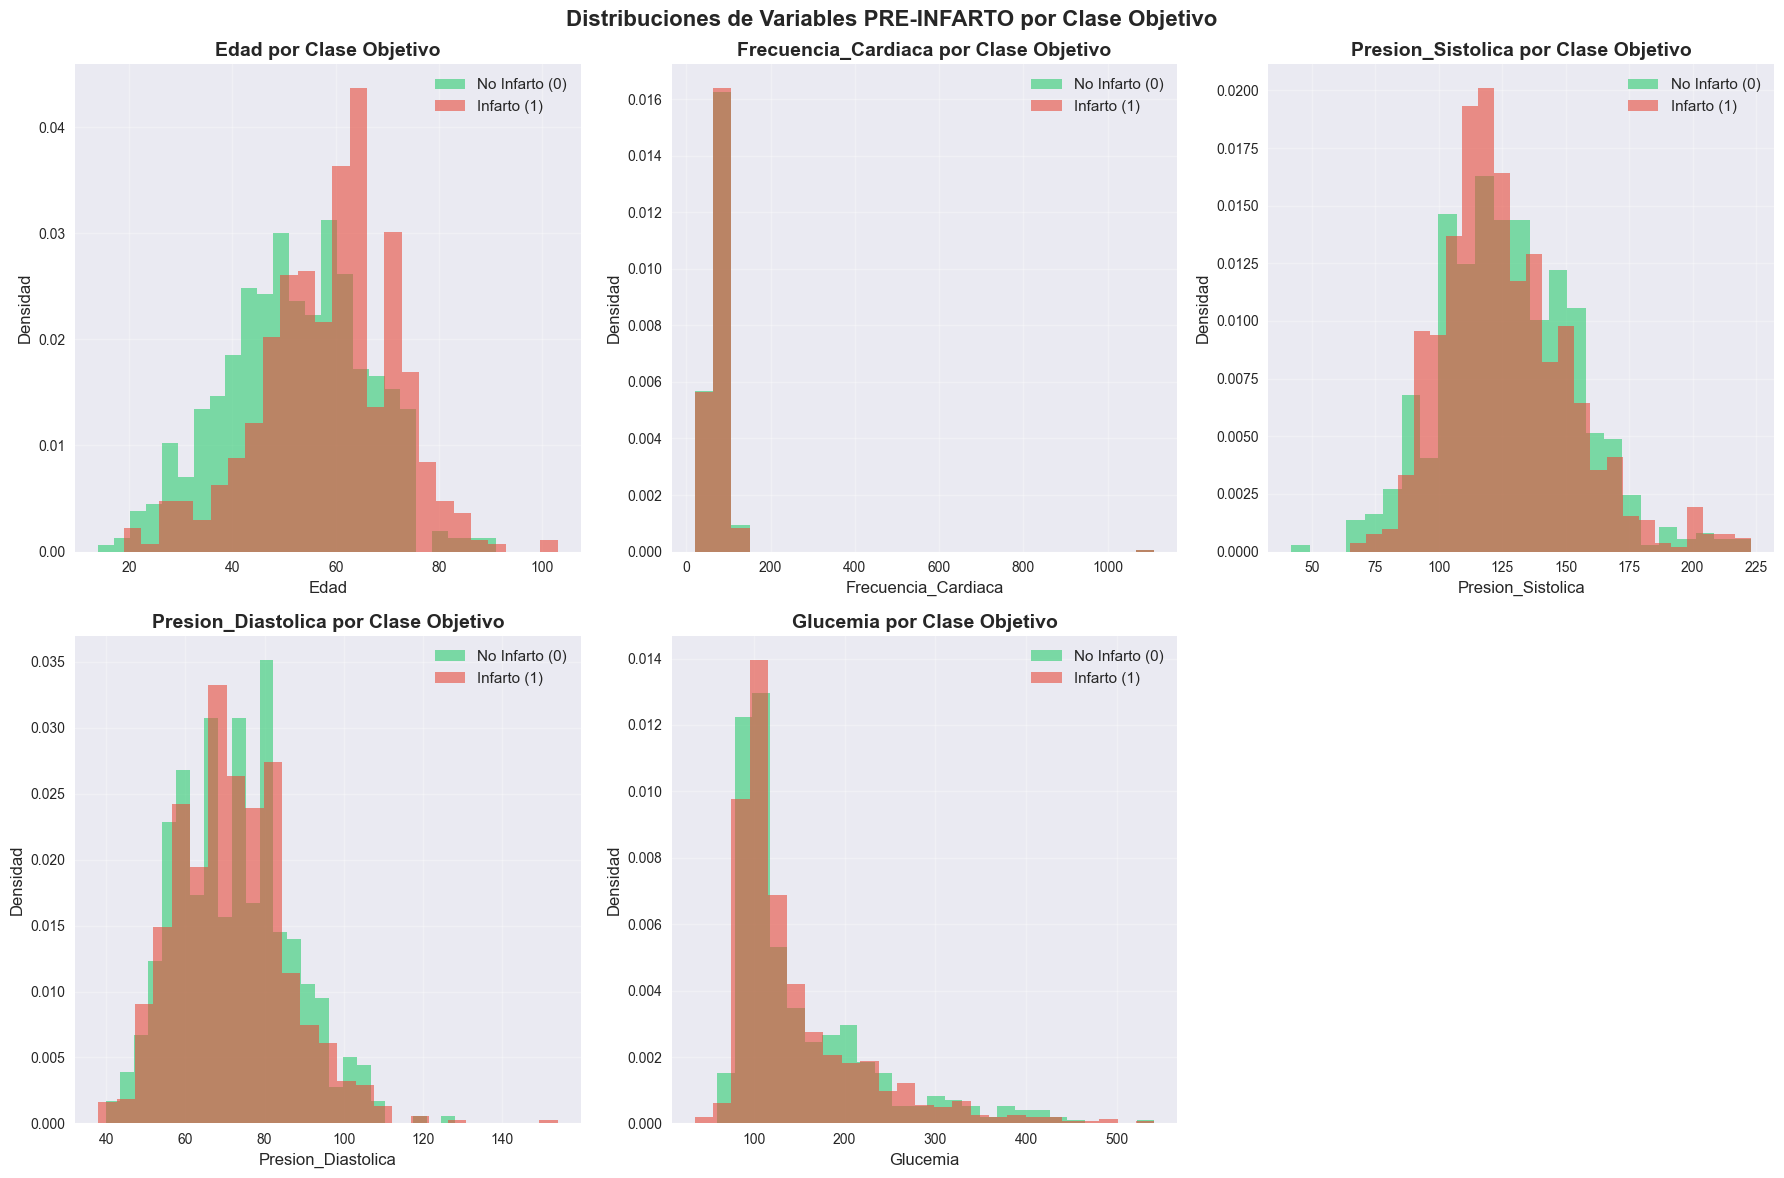

In [18]:

print(f"\n 2. Distribuciones por Variable Objetivo (Infarto vs No Infarto)")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribuciones de Variables PRE-INFARTO por Clase Objetivo', fontsize=16, fontweight='bold')

for i, var in enumerate(variables_numericas):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Separar por clase
    no_infarto = df_principal_final[df_principal_final['Resultado_Numerico'] == 0][var]
    infarto = df_principal_final[df_principal_final['Resultado_Numerico'] == 1][var]

    # Histogramas superpuestos
    ax.hist(no_infarto, bins=25, alpha=0.6, label='No Infarto (0)', color='#2ECC71', density=True)
    ax.hist(infarto, bins=25, alpha=0.6, label='Infarto (1)', color='#E74C3C', density=True)

    ax.set_title(f'{var} por Clase Objetivo', fontweight='bold')
    ax.set_xlabel(var)
    ax.set_ylabel('Densidad')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Eliminar subplot vacío
axes[1, 2].remove()

plt.tight_layout()
plt.show()

### EDA 3: Estadísticas descriptivas por clase

In [19]:
print(f"\n📋 3. Estadísticas Descriptivas por Clase Objetivo")

stats_by_class = df_principal_final.groupby('Resultado_Numerico')[variables_numericas].agg(['mean', 'std', 'median']).round(2)
print(stats_by_class)


📋 3. Estadísticas Descriptivas por Clase Objetivo
                     Edad               Frecuencia_Cardiaca                \
                     mean    std median                mean    std median   
Resultado_Numerico                                                          
0                   52.09  13.73   52.0               77.89  48.21   75.0   
1                   58.77  12.96   60.0               78.62  53.69   74.0   

                   Presion_Sistolica               Presion_Diastolica         \
                                mean    std median               mean    std   
Resultado_Numerico                                                             
0                             127.86  27.04  125.0              72.44  14.33   
1                             126.74  25.54  122.0              72.16  13.86   

                          Glucemia                
                   median     mean    std median  
Resultado_Numerico                                
0        


🔍 ANÁLISIS DE OUTLIERS CON BOXPLOTS

📊 1. Boxplots de Variables PRE-INFARTO


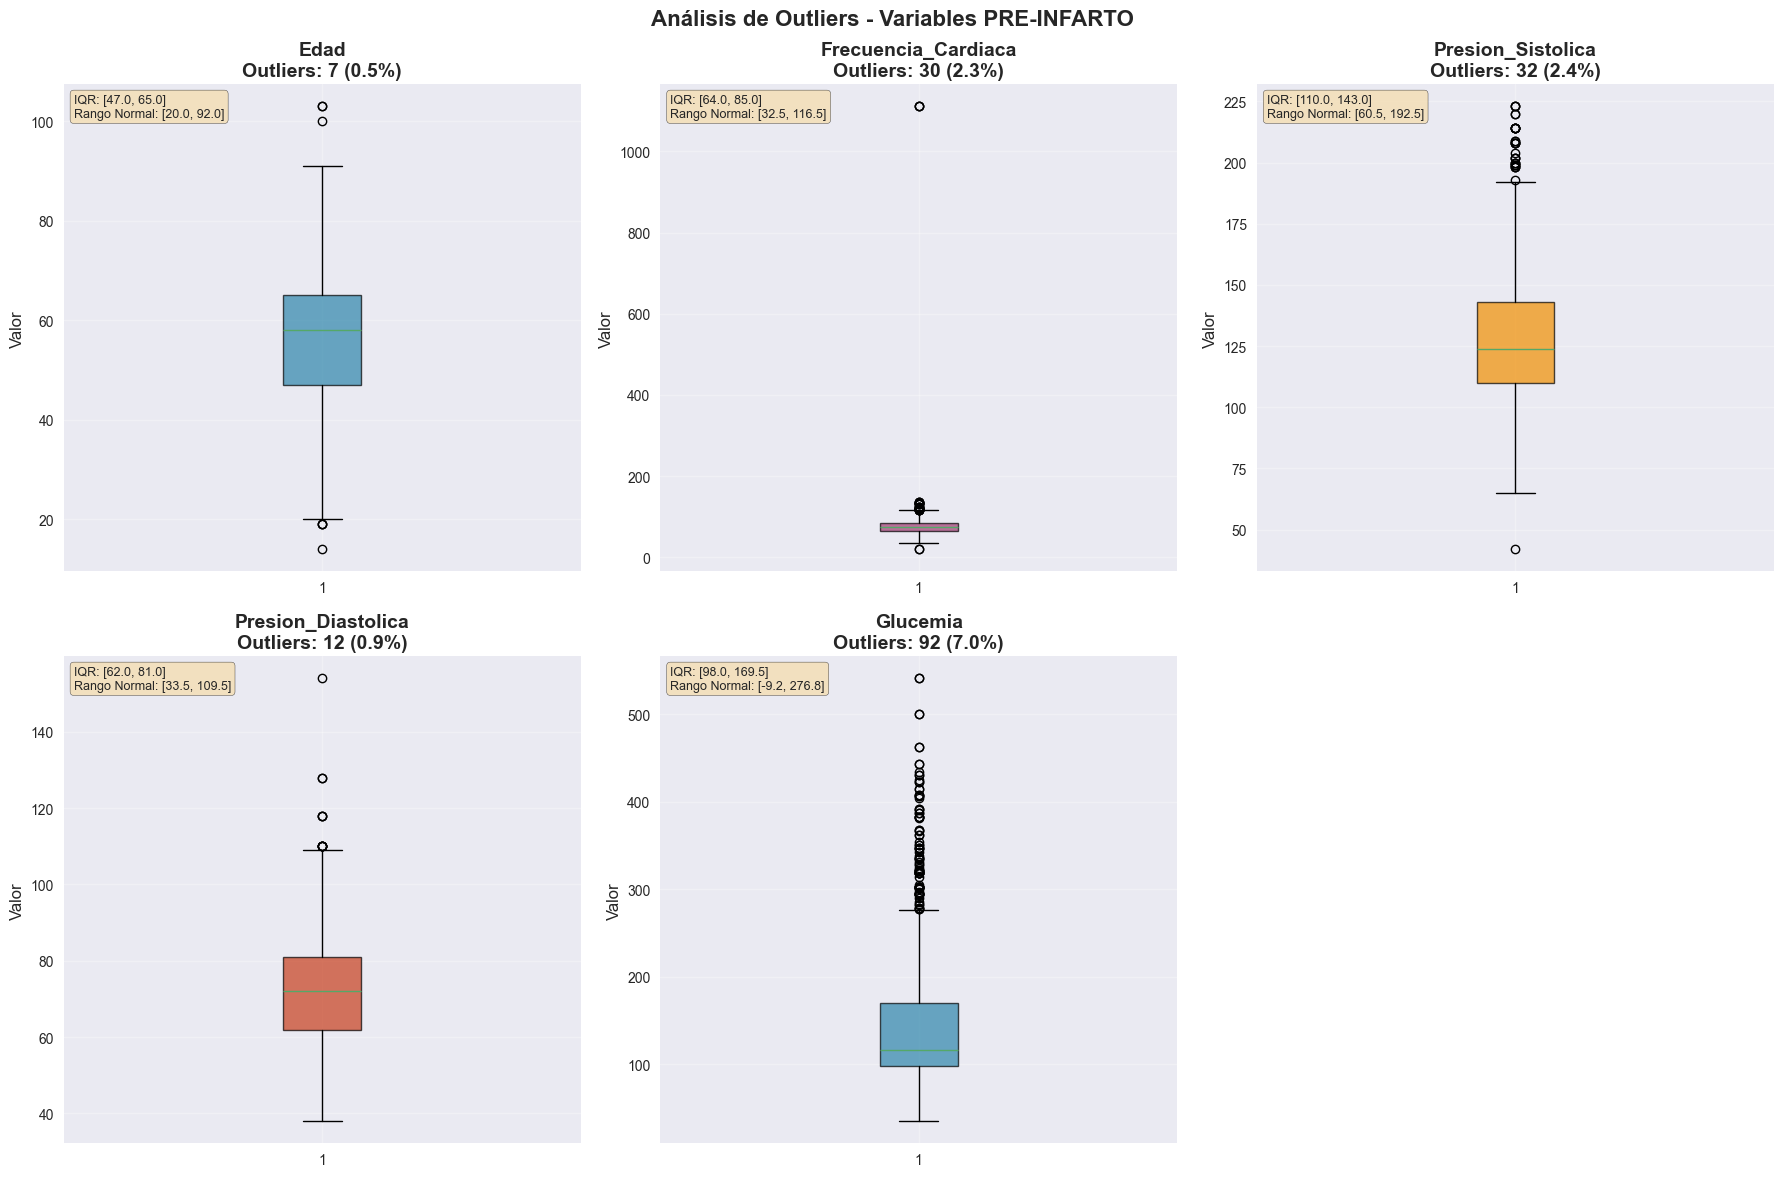

In [20]:
print(f"\n🔍 ANÁLISIS DE OUTLIERS CON BOXPLOTS")
print("=" * 50)

# Boxplots 1: Variables individuales
print(f"\n📊 1. Boxplots de Variables PRE-INFARTO")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análisis de Outliers - Variables PRE-INFARTO', fontsize=16, fontweight='bold')

for i, var in enumerate(variables_numericas):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Boxplot
    box_plot = ax.boxplot(df_principal_final[var], patch_artist=True)
    box_plot['boxes'][0].set_facecolor(colors_primary[i % len(colors_primary)])
    box_plot['boxes'][0].set_alpha(0.7)

    # Calcular estadísticas IQR
    Q1 = df_principal_final[var].quantile(0.25)
    Q3 = df_principal_final[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_principal_final[(df_principal_final[var] < lower_bound) |
                                 (df_principal_final[var] > upper_bound)][var]

    ax.set_title(f'{var}\nOutliers: {len(outliers)} ({len(outliers)/len(df_principal_final)*100:.1f}%)',
                fontweight='bold')
    ax.set_ylabel('Valor')
    ax.grid(True, alpha=0.3)

    # Agregar texto con rangos
    ax.text(0.02, 0.98, f'IQR: [{Q1:.1f}, {Q3:.1f}]\nRango Normal: [{lower_bound:.1f}, {upper_bound:.1f}]',
            transform=ax.transAxes, verticalalignment='top', fontsize=9,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Eliminar subplot vacío
axes[1, 2].remove()

plt.tight_layout()
plt.show()


 2. Boxplots por Clase Objetivo


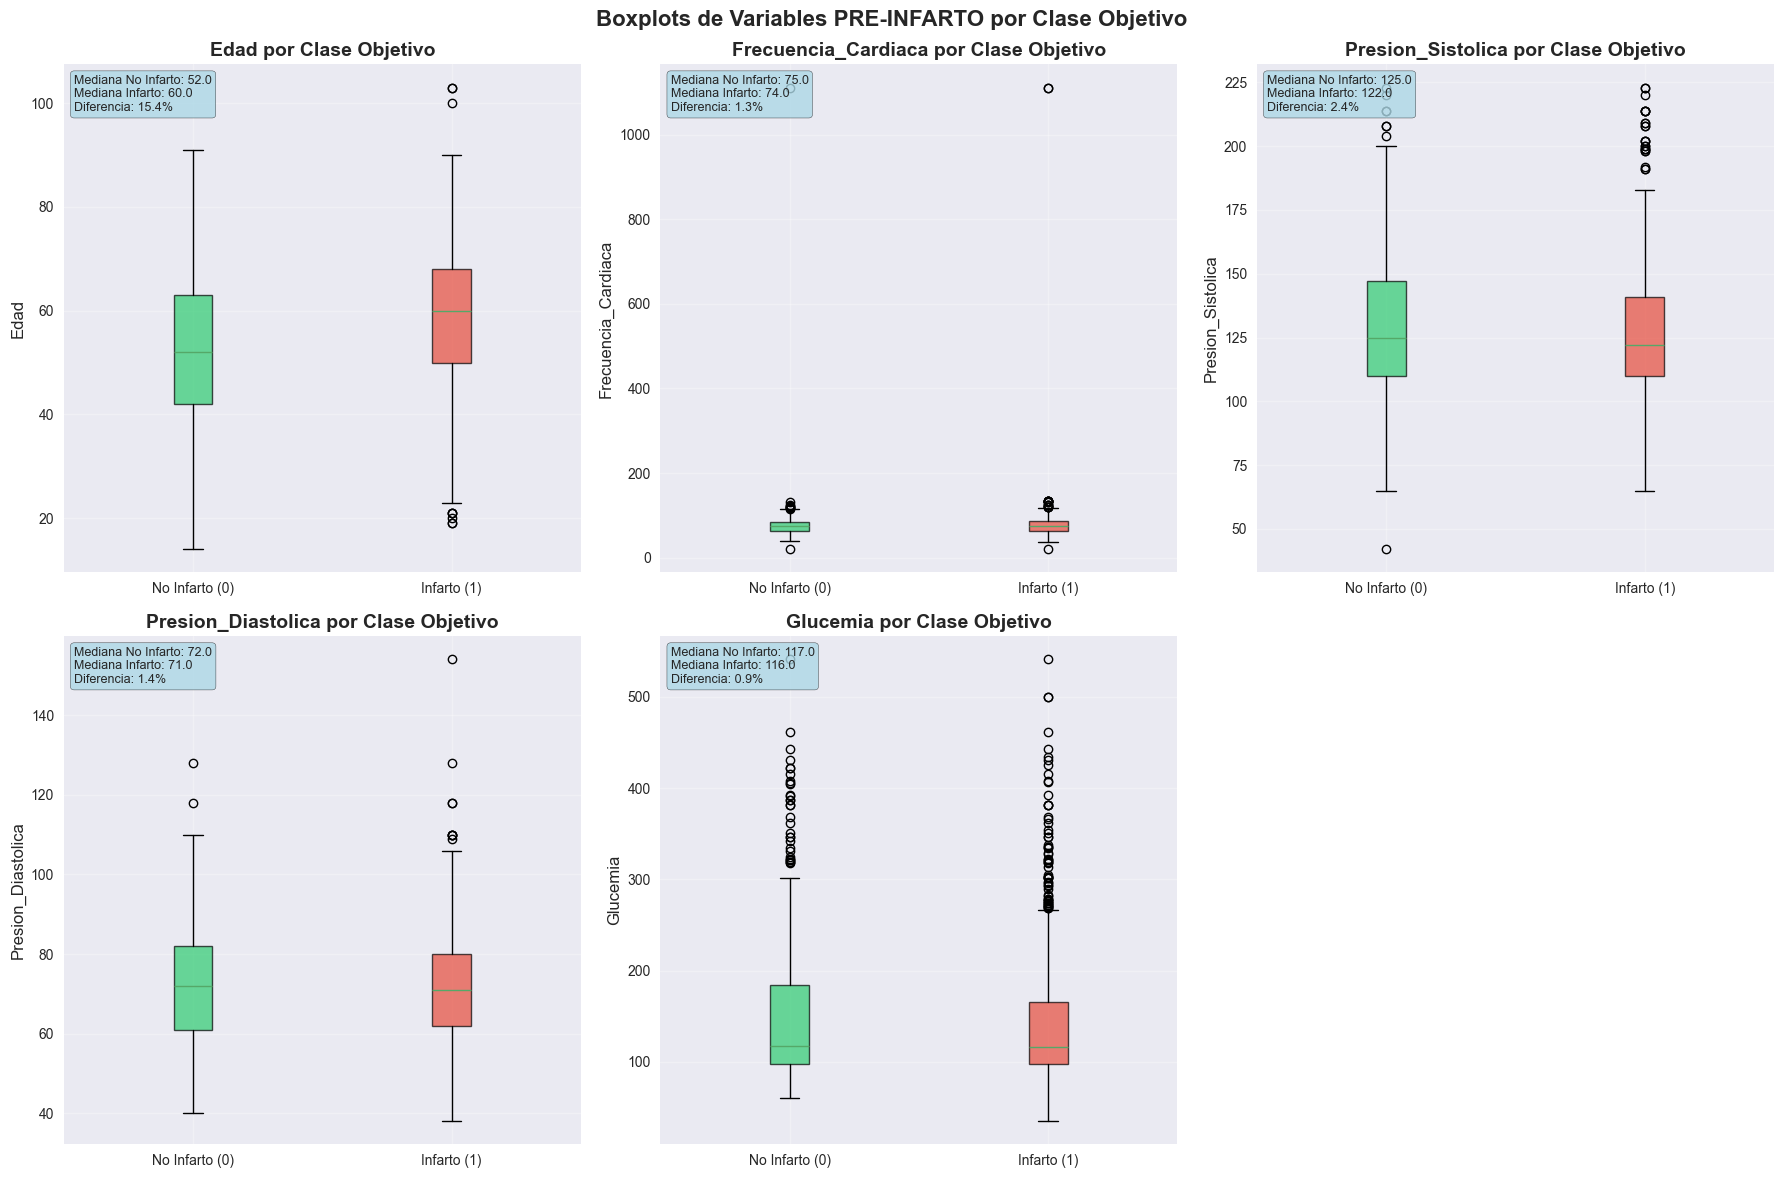

In [21]:
# Boxplots 2: Comparación por clase objetivo
print(f"\n 2. Boxplots por Clase Objetivo")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Boxplots de Variables PRE-INFARTO por Clase Objetivo', fontsize=16, fontweight='bold')

for i, var in enumerate(variables_numericas):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Datos por clase
    data_by_class = [
        df_principal_final[df_principal_final['Resultado_Numerico'] == 0][var],
        df_principal_final[df_principal_final['Resultado_Numerico'] == 1][var]
    ]

    # Boxplot comparativo
    box_plot = ax.boxplot(data_by_class, labels=['No Infarto (0)', 'Infarto (1)'], patch_artist=True)

    # Colorear cajas
    colors_box = ['#2ECC71', '#E74C3C']
    for box, color in zip(box_plot['boxes'], colors_box):
        box.set_facecolor(color)
        box.set_alpha(0.7)

    ax.set_title(f'{var} por Clase Objetivo', fontweight='bold')
    ax.set_ylabel(var)
    ax.grid(True, alpha=0.3)

    # Test estadístico simple (diferencia de medianas)
    median_0 = data_by_class[0].median()
    median_1 = data_by_class[1].median()
    diff_percent = abs(median_1 - median_0) / median_0 * 100

    ax.text(0.02, 0.98, f'Mediana No Infarto: {median_0:.1f}\nMediana Infarto: {median_1:.1f}\nDiferencia: {diff_percent:.1f}%',
            transform=ax.transAxes, verticalalignment='top', fontsize=9,
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# Eliminar subplot vacío
axes[1, 2].remove()

plt.tight_layout()
plt.show()


### MATRIZ DE CORRELACIÓN CON VISUALIZACIÓN AVANZADA


 MATRIZ DE CORRELACIÓN - Variables PRE-INFARTO

 1. Matriz de Correlación Completa


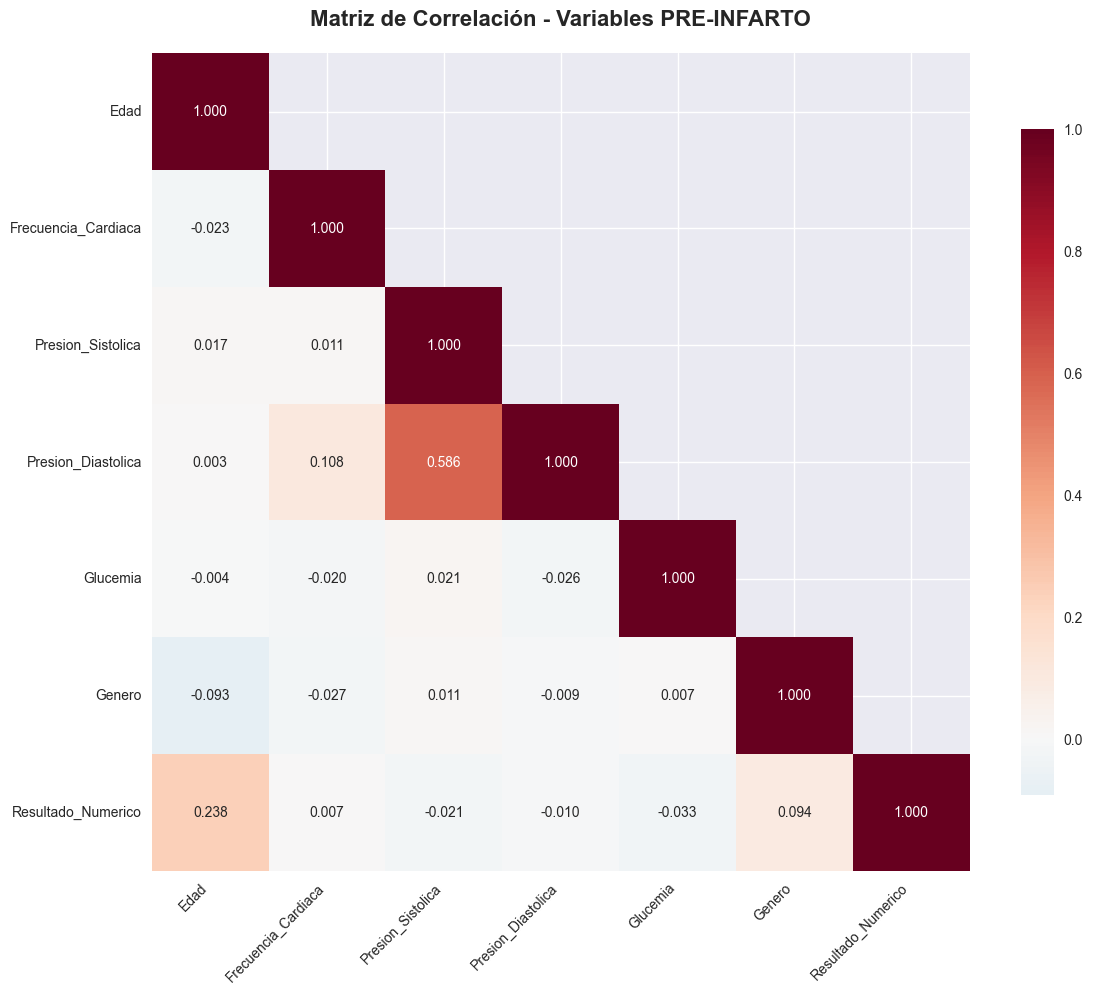


 2. Correlaciones con Variable Objetivo


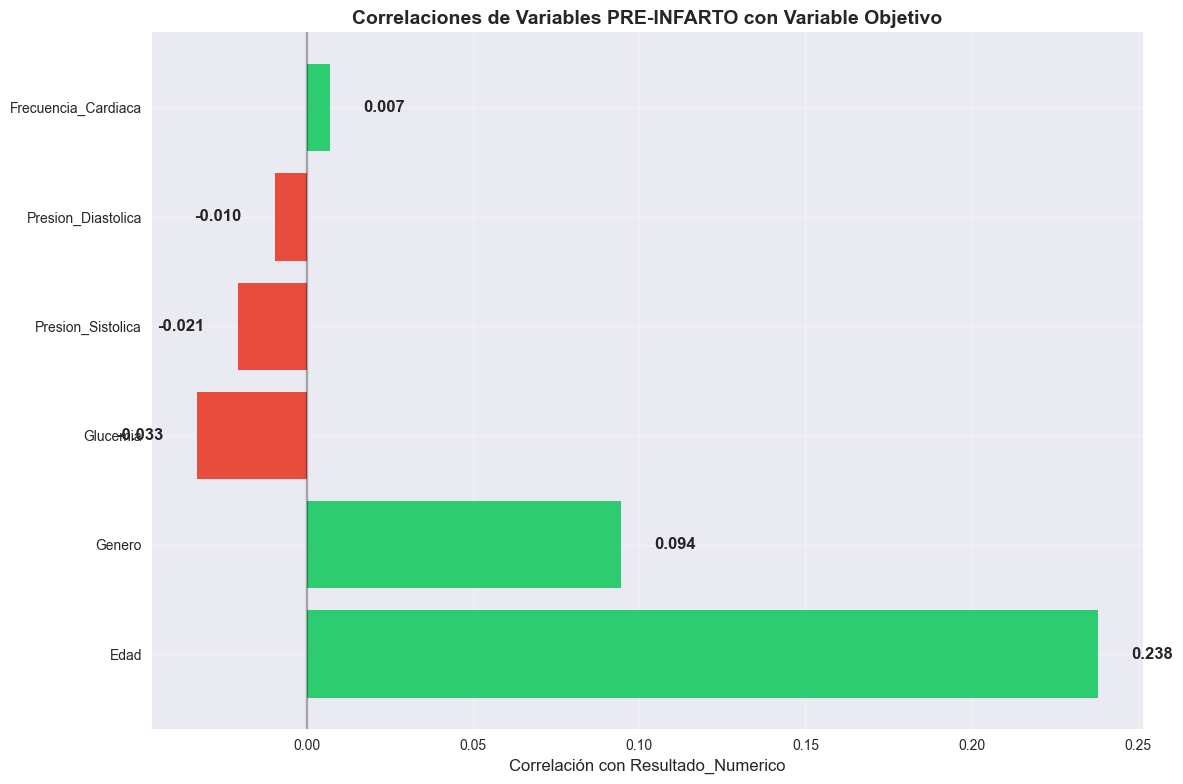


 3. Scatter Plots de Correlaciones Más Fuertes


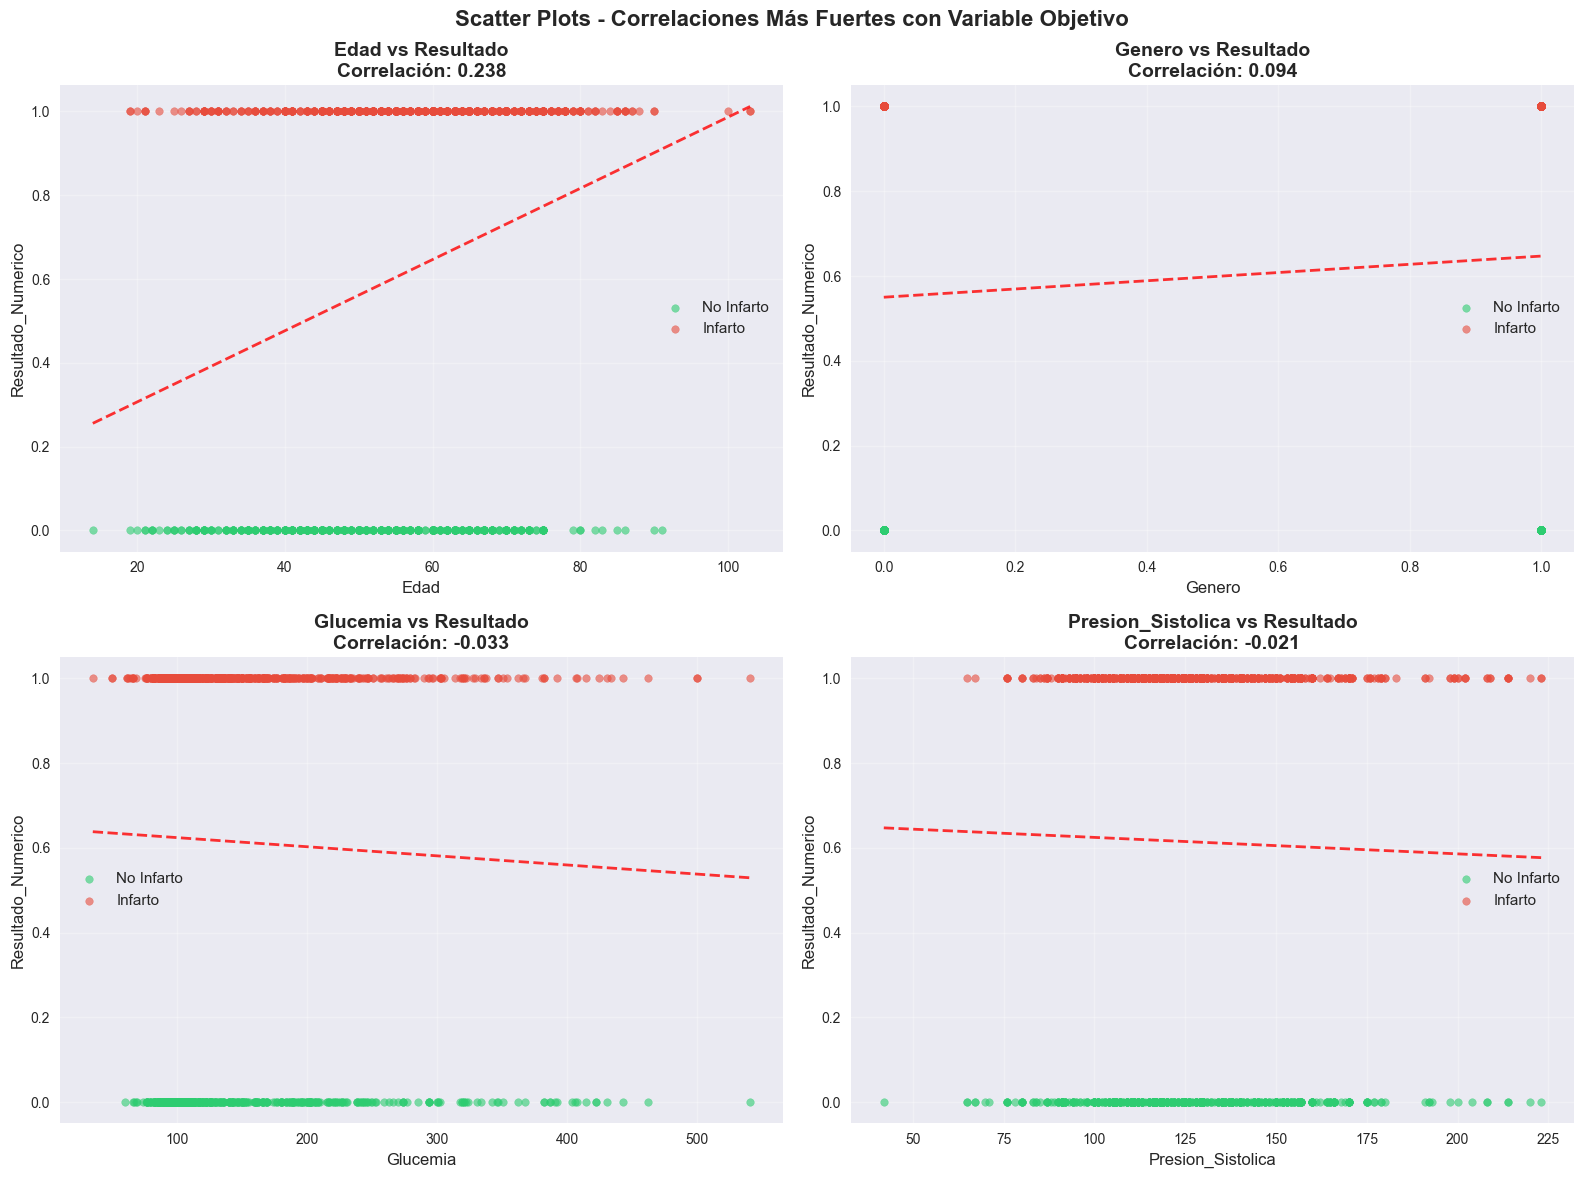

In [22]:
print(f"\n MATRIZ DE CORRELACIÓN - Variables PRE-INFARTO")
print("=" * 50)

# Calcular matriz de correlación
variables_para_correlacion = variables_numericas + ['Genero', 'Resultado_Numerico']
matriz_correlacion = df_principal_final[variables_para_correlacion].corr()

# Visualización 1: Heatmap de correlación completa
print(f"\n 1. Matriz de Correlación Completa")

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool), k=1)

heatmap = sns.heatmap(matriz_correlacion,
                     mask=mask,
                     annot=True,
                     cmap='RdBu_r',
                     center=0,
                     square=True,
                     fmt='.3f',
                     cbar_kws={"shrink": 0.8},
                     annot_kws={'size': 10})

plt.title('Matriz de Correlación - Variables PRE-INFARTO', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Visualización 2: Correlaciones con variable objetivo
print(f"\n 2. Correlaciones con Variable Objetivo")

correlaciones_objetivo = matriz_correlacion['Resultado_Numerico'].drop('Resultado_Numerico').sort_values(key=abs, ascending=False)

plt.figure(figsize=(12, 8))
colors_corr = ['#E74C3C' if x < 0 else '#2ECC71' for x in correlaciones_objetivo.values]

bars = plt.barh(range(len(correlaciones_objetivo)), correlaciones_objetivo.values, color=colors_corr)
plt.yticks(range(len(correlaciones_objetivo)), correlaciones_objetivo.index)
plt.xlabel('Correlación con Resultado_Numerico')
plt.title('Correlaciones de Variables PRE-INFARTO con Variable Objetivo', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)

# Agregar valores en las barras
for i, (bar, valor) in enumerate(zip(bars, correlaciones_objetivo.values)):
    plt.text(valor + (0.01 if valor >= 0 else -0.01), i, f'{valor:.3f}',
             ha='left' if valor >= 0 else 'right', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Visualización 3: Scatter plots de correlaciones más fuertes
print(f"\n 3. Scatter Plots de Correlaciones Más Fuertes")

# Seleccionar las 4 correlaciones más fuertes con la variable objetivo
top_correlations = correlaciones_objetivo.head(4)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Scatter Plots - Correlaciones Más Fuertes con Variable Objetivo', fontsize=16, fontweight='bold')

for i, (var, corr) in enumerate(top_correlations.items()):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Separar por clase para colorear
    no_infarto = df_principal_final[df_principal_final['Resultado_Numerico'] == 0]
    infarto = df_principal_final[df_principal_final['Resultado_Numerico'] == 1]

    # Scatter plot
    ax.scatter(no_infarto[var], no_infarto['Resultado_Numerico'],
              alpha=0.6, color='#2ECC71', label='No Infarto', s=30)
    ax.scatter(infarto[var], infarto['Resultado_Numerico'],
              alpha=0.6, color='#E74C3C', label='Infarto', s=30)

    # Línea de regresión
    z = np.polyfit(df_principal_final[var], df_principal_final['Resultado_Numerico'], 1)
    p = np.poly1d(z)
    ax.plot(df_principal_final[var].sort_values(), p(df_principal_final[var].sort_values()),
            "r--", alpha=0.8, linewidth=2)

    ax.set_xlabel(var)
    ax.set_ylabel('Resultado_Numerico')
    ax.set_title(f'{var} vs Resultado\nCorrelación: {corr:.3f}', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ETAPA 2: ANÁLISIS COMPARATIVO DE DATASETS

## 4.1)

In [23]:
print(f"\n Preparando datasets para comparación...")

# Función para preparar cada dataset
def preparar_dataset(df, nombre_dataset, var_objetivo, mapeo_objetivo=None):
    """
    Prepara un dataset para análisis comparativo
    """
    print(f"\n Preparando {nombre_dataset}...")

    df_prep = df.copy()

    # Eliminar valores faltantes
    filas_antes = len(df_prep)
    df_prep = df_prep.dropna()
    filas_despues = len(df_prep)

    if filas_antes != filas_despues:
        print(f"    Eliminados {filas_antes - filas_despues} registros con valores faltantes")

    # Procesar variable objetivo
    if mapeo_objetivo:
        df_prep[f'{var_objetivo}_numeric'] = df_prep[var_objetivo].map(mapeo_objetivo)
    else:
        # Asumir que ya es numérica
        df_prep[f'{var_objetivo}_numeric'] = df_prep[var_objetivo]

    # Eliminar duplicados
    duplicados = df_prep.duplicated().sum()
    if duplicados > 0:
        df_prep = df_prep.drop_duplicates()
        print(f"    Eliminados {duplicados} registros duplicados")

    print(f"    Dataset preparado: {df_prep.shape}")

    return df_prep

# Preparar Dataset Primario (ya está listo)
dataset_principal = {
    'nombre': 'Dataset Primario',
    'data': df_principal_final,
    'var_objetivo': 'Resultado_Numerico',
    'descripcion': 'Biomarcadores específicos para infarto'
}

# Preparar Heart Failure
df_hf_prep = preparar_dataset(
    df_heart_failure,
    'Heart Failure',
    'DEATH_EVENT'
)

dataset_heart_failure = {
    'nombre': 'Heart Failure',
    'data': df_hf_prep,
    'var_objetivo': 'DEATH_EVENT_numeric',
    'descripcion': 'Falla cardíaca y mortalidad'
}

# Preparar Heart.csv
df_heart_prep = preparar_dataset(
    df_heart,
    'Heart.csv',
    'HeartDisease'
)

dataset_heart = {
    'nombre': 'Heart.csv',
    'data': df_heart_prep,
    'var_objetivo': 'HeartDisease_numeric',
    'descripcion': 'Dataset estándar ML cardiovascular'
}

# Preparar Cardio Train
df_cardio_prep = preparar_dataset(
    df_cardio,
    'Cardio Train',
    'cardio'
)

dataset_cardio = {
    'nombre': 'Cardio Train',
    'data': df_cardio_prep,
    'var_objetivo': 'cardio_numeric',
    'descripcion': 'Dataset masivo con variables antropométricas'
}

# Lista de todos los datasets para comparación
datasets_comparacion = [dataset_principal, dataset_heart_failure, dataset_heart, dataset_cardio]

print(f"\n Resumen de datasets preparados:")
for dataset in datasets_comparacion:
    df_data = dataset['data']
    var_obj = dataset['var_objetivo']

    # Calcular distribución de clases
    if var_obj in df_data.columns:
        distribucion = df_data[var_obj].value_counts()
        balance = min(distribucion) / max(distribucion)

        print(f"\n   {dataset['nombre']}:")
        print(f"      * Registros: {len(df_data):,}")
        print(f"      * Variables: {df_data.shape[1]}")
        print(f"      * Variable objetivo: {var_obj}")
        print(f"      * Balance de clases: {balance:.3f}")
        print(f"      * Descripción: {dataset['descripcion']}")



 Preparando datasets para comparación...

 Preparando Heart Failure...
    Dataset preparado: (299, 14)

 Preparando Heart.csv...
    Dataset preparado: (918, 13)

 Preparando Cardio Train...
    Dataset preparado: (70000, 14)

 Resumen de datasets preparados:

   Dataset Primario:
      * Registros: 1,319
      * Variables: 10
      * Variable objetivo: Resultado_Numerico
      * Balance de clases: 0.628
      * Descripción: Biomarcadores específicos para infarto

   Heart Failure:
      * Registros: 299
      * Variables: 14
      * Variable objetivo: DEATH_EVENT_numeric
      * Balance de clases: 0.473
      * Descripción: Falla cardíaca y mortalidad

   Heart.csv:
      * Registros: 918
      * Variables: 13
      * Variable objetivo: HeartDisease_numeric
      * Balance de clases: 0.807
      * Descripción: Dataset estándar ML cardiovascular

   Cardio Train:
      * Registros: 70,000
      * Variables: 14
      * Variable objetivo: cardio_numeric
      * Balance de clases: 0.999

## 4.2) ANÁLISIS DE RENDIMIENTO PREDICTIVO POR DATASET

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def evaluar_dataset(dataset_info, muestra_max=10000):
    """
    Evalúa el rendimiento predictivo de un dataset
    """
    print(f"\n Evaluando: {dataset_info['nombre']}")

    df_data = dataset_info['data']
    var_objetivo = dataset_info['var_objetivo']

    # Muestrear si el dataset es muy grande
    if len(df_data) > muestra_max:
        df_sample = df_data.sample(n=muestra_max, random_state=42)
        print(f"    Usando muestra de {muestra_max:,} registros")
    else:
        df_sample = df_data

    # Preparar datos
    # Seleccionar solo variables numéricas
    variables_numericas = df_sample.select_dtypes(include=[np.number]).columns
    variables_predictoras = [col for col in variables_numericas if col != var_objetivo and 'numeric' not in col.lower()]

    if len(variables_predictoras) == 0:
        print(f"    No se encontraron variables predictoras numéricas")
        return None

    X = df_sample[variables_predictoras]
    y = df_sample[var_objetivo]

    # Verificar que no hay valores faltantes
    X = X.dropna()
    y = y[X.index]

    print(f"    Variables predictoras: {len(variables_predictoras)}")
    print(f"    Registros para análisis: {len(X):,}")

    # Crear pipeline con escalado y modelo
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ])

    # Evaluación con validación cruzada
    try:
        scores = cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc', n_jobs=-1)

        resultado = {
            'nombre': dataset_info['nombre'],
            'n_variables': len(variables_predictoras),
            'n_registros': len(X),
            'auc_mean': scores.mean(),
            'auc_std': scores.std(),
            'variables': variables_predictoras[:10]  # Primeras 10 variables
        }

        print(f"    AUC promedio: {scores.mean():.4f} (±{scores.std():.4f})")
        print(f"    Rango AUC: {scores.min():.4f} - {scores.max():.4f}")

        return resultado

    except Exception as e:
        print(f"    Error en evaluación: {e}")
        return None

# Evaluar todos los datasets
resultados_evaluacion = []
for dataset in datasets_comparacion:
    resultado = evaluar_dataset(dataset)
    if resultado:
        resultados_evaluacion.append(resultado)

# Ranking de datasets por rendimiento predictivo
print(f"\n RANKING DE RENDIMIENTO PREDICTIVO")
print("-" * 40)

resultados_ordenados = sorted(resultados_evaluacion, key=lambda x: x['auc_mean'], reverse=True)

for i, resultado in enumerate(resultados_ordenados, 1):
    print(f"\n{i}° LUGAR: {resultado['nombre']}")
    print(f"   * AUC: {resultado['auc_mean']:.4f} (±{resultado['auc_std']:.4f})")
    print(f"   * Registros: {resultado['n_registros']:,}")
    print(f"   * Variables: {resultado['n_variables']}")
    print(f"   * Variables principales: {', '.join(resultado['variables'][:5])}")



 Evaluando: Dataset Primario
    Variables predictoras: 8
    Registros para análisis: 1,319
    AUC promedio: 0.9975 (±0.0045)
    Rango AUC: 0.9886 - 1.0000

 Evaluando: Heart Failure
    Variables predictoras: 13
    Registros para análisis: 299
    AUC promedio: 1.0000 (±0.0000)
    Rango AUC: 1.0000 - 1.0000

 Evaluando: Heart.csv
    Variables predictoras: 7
    Registros para análisis: 918
    AUC promedio: 1.0000 (±0.0000)
    Rango AUC: 1.0000 - 1.0000

 Evaluando: Cardio Train
    Usando muestra de 10,000 registros
    Variables predictoras: 13
    Registros para análisis: 10,000
    AUC promedio: 1.0000 (±0.0000)
    Rango AUC: 1.0000 - 1.0000

 RANKING DE RENDIMIENTO PREDICTIVO
----------------------------------------

1° LUGAR: Heart Failure
   * AUC: 1.0000 (±0.0000)
   * Registros: 299
   * Variables: 13
   * Variables principales: age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction

2° LUGAR: Heart.csv
   * AUC: 1.0000 (±0.0000)
   * Registros: 918
   *

# 5) ETAPA 3: MODELADO PREDICTIVO CON DATASET PRINCIPAL

## 5.1) Preparando los modelos

In [25]:
# Usar el Dataset Primario como principal
df_modelado = df_principal_final.copy()

print(f"\n Preparando datos para modelado...")
print(f"Dataset: {df_modelado.shape}")

# Preparar variables predictoras y objetivo
variables_predictoras = ['Edad', 'Genero', 'Frecuencia_Cardiaca', 'Presion_Sistolica',
                        'Presion_Diastolica', 'Glucemia', 'CK_MB', 'Troponina']

X = df_modelado[variables_predictoras]
y = df_modelado['Resultado_Numerico']

print(f"✓ Variables predictoras: {len(variables_predictoras)}")
print(f"✓ Variable objetivo: Resultado_Numerico")
print(f"✓ Registros totales: {len(X):,}")

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✓ Entrenamiento: {len(X_train):,} registros")
print(f"✓ Prueba: {len(X_test):,} registros")

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✓ Características escaladas")


 Preparando datos para modelado...
Dataset: (1319, 10)
✓ Variables predictoras: 8
✓ Variable objetivo: Resultado_Numerico
✓ Registros totales: 1,319
✓ Entrenamiento: 1,055 registros
✓ Prueba: 264 registros
✓ Características escaladas


##### 5.1.1) MEJORES HIPERPARÁMETROS PARA LOS MODELOS

In [26]:
from sklearn.model_selection import GridSearchCV

In [43]:
# Random Forest
param_grid_rf = {
    'n_estimators': [10, 25, 50, 100],
    'max_depth': [6, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

print("\n Buscando mejores hiperparámetros para Random Forest...")
grid_rf.fit(X_train, y_train)

mejor_rf = grid_rf.best_estimator_

print(f"✓ Mejor combinación: {grid_rf.best_params_}")
print(f"✓ Mejor AUC en CV: {grid_rf.best_score_:.4f}")


 Buscando mejores hiperparámetros para Random Forest...
✓ Mejor combinación: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
✓ Mejor AUC en CV: 0.9968


In [48]:
# Regresión logística
param_grid_lr = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2', 'elasticnet'],
    'solver': ['lbfgs', 'saga']
}

grid_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=1000),
    param_grid=param_grid_lr,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_lr.fit(X_train_scaled, y_train)
mejor_lr = grid_lr.best_estimator_

print(f"✓ Mejor LR: {grid_lr.best_params_}")
print(f"✓ Mejor AUC en CV: {grid_lr.best_score_:.4f}")

✓ Mejor LR: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
✓ Mejor AUC en CV: 0.8747


In [37]:
# Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6, 10]
}

grid_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid_gb,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_gb.fit(X_train, y_train)
mejor_gb = grid_gb.best_estimator_

print(f"✓ Mejor GB: {grid_gb.best_params_}")
print(f"✓ Mejor AUC en CV: {grid_gb.best_score_:.4f}")

✓ Mejor GB: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
✓ Mejor AUC en CV: 0.9966


In [42]:
# SVM
param_grid_svm = {
    'C': [0.1, 0.5, 1],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']
}

grid_svm = GridSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_grid=param_grid_svm,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_svm.fit(X_train_scaled, y_train)
mejor_svm = grid_svm.best_estimator_

print(f"✓ Mejor SVM: {grid_svm.best_params_}")
print(f"✓ Mejor AUC en CV: {grid_gb.best_score_:.4f}")

✓ Mejor SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
✓ Mejor AUC en CV: 0.9966


## 5.2) Definición y Entrenamiento de 4 modelos

In [45]:
# Definir modelos
modelos = {
    '1) Random Forest': mejor_rf,

    '2) Regresión Logística': mejor_lr,

    '3) Gradient Boosting': mejor_gb,

    '4) SVM': mejor_svm
}

In [46]:
resultados_modelos = {}

for nombre_modelo, modelo in modelos.items():
    print(f"\n Entrenando {nombre_modelo}...")

    # Entrenar modelo
    if 'SVM' in nombre_modelo or 'Regresión Logística' in nombre_modelo:
        # Usar datos escalados para SVM y Regresión Logística
        modelo.fit(X_train_scaled, y_train)
        y_pred = modelo.predict(X_test_scaled)
        y_pred_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        # Usar datos originales para Random Forest y Gradient Boosting
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        y_pred_proba = modelo.predict_proba(X_test)[:, 1]

    # Calcular métricas
    auc_score = roc_auc_score(y_test, y_pred_proba)

    # Validación cruzada
    if 'SVM' in nombre_modelo or 'Regresión Logística' in nombre_modelo:
        cv_scores = cross_val_score(modelo, X_train_scaled, y_train, cv=5, scoring='roc_auc')
    else:
        cv_scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='roc_auc')

    resultados_modelos[nombre_modelo] = {
        'modelo': modelo,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'auc_test': auc_score,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }

    print(f"   ✓ AUC Test: {auc_score:.4f}")
    print(f"   ✓ CV AUC: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")



 Entrenando 1) Random Forest...
   ✓ AUC Test: 0.9939
   ✓ CV AUC: 0.9968 (±0.0025)

 Entrenando 2) Regresión Logística...
   ✓ AUC Test: 0.8885
   ✓ CV AUC: 0.8747 (±0.0194)

 Entrenando 3) Gradient Boosting...
   ✓ AUC Test: 0.9853
   ✓ CV AUC: 0.9966 (±0.0027)

 Entrenando 4) SVM...
   ✓ AUC Test: 0.8276
   ✓ CV AUC: 0.8117 (±0.0156)


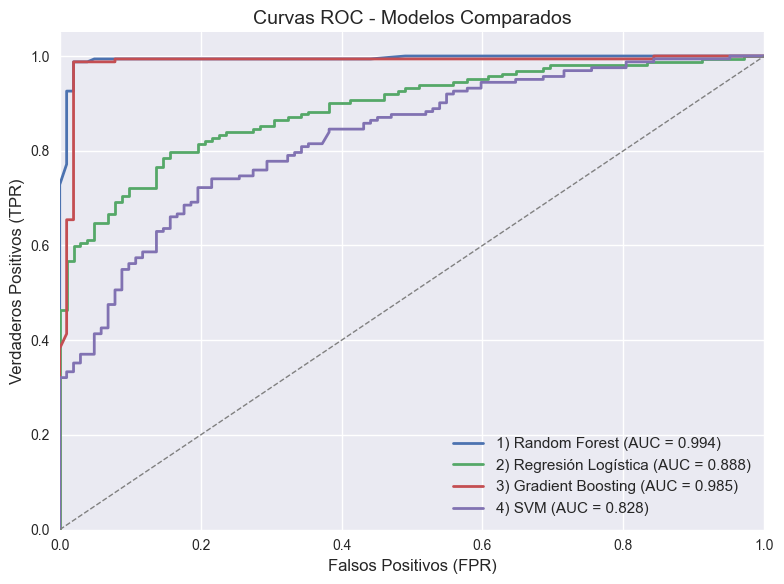

In [50]:
# AUC
plt.figure(figsize=(8,6))

for nombre_modelo, resultados in resultados_modelos.items():
    fpr, tpr, _ = roc_curve(y_test, resultados['y_pred_proba'])
    roc_auc = resultados['auc_test']
    plt.plot(fpr, tpr, lw=2, label=f'{nombre_modelo} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos (FPR)')
plt.ylabel('Verdaderos Positivos (TPR)')
plt.title('Curvas ROC - Modelos Comparados')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## 5.3) COMPARACIÓN Y RANKING DE MODELOS

In [ ]:
# Ordenar modelos por AUC de validación cruzada
ranking_modelos = sorted(
    resultados_modelos.items(),
    key=lambda x: x[1]['cv_mean'],
    reverse=True
)

for i, (nombre, resultados) in enumerate(ranking_modelos, 1):
    print(f"\n{i}° LUGAR: {nombre}")
    print(f"    * AUC Test: {resultados['auc_test']:.4f}")
    print(f"    * CV AUC: {resultados['cv_mean']:.4f} (±{resultados['cv_std']:.4f})")

    # Reporte de clasificación
    print(f"    Reporte de Clasificación:")
    report = classification_report(y_test, resultados['y_pred'], output_dict=True)
    print(f"      * Precisión: {report['1']['precision']:.3f}")
    print(f"      * Recall: {report['1']['recall']:.3f}")
    print(f"      * F1-Score: {report['1']['f1-score']:.3f}")



1° LUGAR: 1) Random Forest
    * AUC Test: 0.9945
    * CV AUC: 0.9958 (±0.0034)
    Reporte de Clasificación:
      * Precisión: 0.988
      * Recall: 0.988
      * F1-Score: 0.988

2° LUGAR: 3) Gradient Boosting
    * AUC Test: 0.9791
    * CV AUC: 0.9915 (±0.0042)
    Reporte de Clasificación:
      * Precisión: 0.982
      * Recall: 0.988
      * F1-Score: 0.985

3° LUGAR: 2) Regresión Logística
    * AUC Test: 0.8885
    * CV AUC: 0.8747 (±0.0194)
    Reporte de Clasificación:
      * Precisión: 0.826
      * Recall: 0.852
      * F1-Score: 0.839

4° LUGAR: 4) SVM
    * AUC Test: 0.8276
    * CV AUC: 0.8117 (±0.0156)
    Reporte de Clasificación:
      * Precisión: 0.788
      * Recall: 0.802
      * F1-Score: 0.795


## 5.4) ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS

In [ ]:
# Obtener el mejor modelo (Random Forest o Gradient Boosting para importancia)
mejor_modelo_tree = None
for nombre, resultados in ranking_modelos:
    if 'Random Forest' in nombre or 'Gradient Boosting' in nombre:
        mejor_modelo_tree = (nombre, resultados['modelo'])
        break

if mejor_modelo_tree:
    nombre_modelo, modelo = mejor_modelo_tree
    print(f"\n * Importancia de características - {nombre_modelo}:")

    importancias = modelo.feature_importances_
    caracteristicas_importancia = list(zip(variables_predictoras, importancias))
    caracteristicas_ordenadas = sorted(caracteristicas_importancia, key=lambda x: x[1], reverse=True)

    for i, (caracteristica, importancia) in enumerate(caracteristicas_ordenadas, 1):
        porcentaje = importancia * 100
        barras = "⭐" * int(porcentaje / 2)
        print(f"   {i}. {caracteristica}: {porcentaje:.2f}% {barras}")



 * Importancia de características - 1) Random Forest:
   1. Troponina: 61.32% ⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐
   2. CK_MB: 25.30% ⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐
   3. Edad: 5.09% ⭐⭐
   4. Presion_Sistolica: 2.27% ⭐
   5. Glucemia: 1.97% 
   6. Presion_Diastolica: 1.67% 
   7. Frecuencia_Cardiaca: 1.66% 
   8. Genero: 0.72% 


## 5.5) Análisis de Triple Escenario

Considerando que las evaluaciones anteriores dieron suma importancia a la medición de Troponina y Creatina Kinasa MB, se decidió realizar una evaluación de laa capacidad de predicción de los 4 modelos en tres escenarios diferentes (SIN VARIABLES POST INFARTO, CON VARIABLES POST INFARTO y un modelo HÍBRIDO ENTRENADO CON VPI pero testeado SIN VPI)

In [ ]:
# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("="*80)
print(" ANÁLISIS PREDICTIVO DE INFARTO AGUDO DE MIOCARDIO (IAM)")
print("="*80)
print("Dataset: Dataset Primario.csv")
print("Modelos a evaluar: Random Forest, Regresión Logística, Gradient Boosting, SVM")
print("="*80)


 ANÁLISIS PREDICTIVO DE INFARTO AGUDO DE MIOCARDIO (IAM)
Dataset: Dataset Primario.csv
Modelos a evaluar: Random Forest, Regresión Logística, Gradient Boosting, SVM


### 5.5.1) ETAPA 1: CARGA Y ANÁLISIS EXPLORATORIO DE DATOS

In [ ]:
print("\n IDENTIFICACIÓN DE VARIABLES POST-INFARTO")
print("-" * 50)
print(" VARIABLES POST-INFARTO IDENTIFICADAS:")
print("• CK_MB: Biomarcador que se eleva 2-6 horas después del infarto")
print("• Troponina: Biomarcador que se eleva 3-4 horas después del infarto")
print("\n Estas variables NO deben usarse para PREDICIR el infarto,")
print("   ya que son consecuencia del mismo (sesgo temporal)")


 IDENTIFICACIÓN DE VARIABLES POST-INFARTO
--------------------------------------------------
 VARIABLES POST-INFARTO IDENTIFICADAS:
• CK_MB: Biomarcador que se eleva 2-6 horas después del infarto
• Troponina: Biomarcador que se eleva 3-4 horas después del infarto

 Estas variables NO deben usarse para PREDICIR el infarto,
   ya que son consecuencia del mismo (sesgo temporal)


### ETAPA 1: CARGA Y ANÁLISIS EXPLORATORIO DE DATOS (OPCIONAL YA QUE YA SE HIZO MÁS ARRIBA)

🫀 ANÁLISIS PREDICTIVO DE INFARTO AGUDO DE MIOCARDIO (IAM)
Dataset: Dataset Primario.csv (con limpieza de datos atípicos extremos)
Modelos a evaluar: Random Forest, Regresión Logística, Gradient Boosting, SVM

📁 CARGANDO DATASET...
 Dataset cargado exitosamente: 1319 filas, 9 columnas

🔍 DEBUG - NOMBRES EXACTOS DE COLUMNAS:
--------------------------------------------------
1. 'Age'
2. 'Gender'
3. 'Heart rate'
4. 'Systolic blood pressure'
5. 'Diastolic blood pressure'
6. 'Blood sugar'
7. 'CK-MB'
8. 'Troponin'
9. 'Result'
--------------------------------------------------

 INFORMACIÓN BÁSICA DEL DATASET
--------------------------------------------------
Dimensiones: (1319, 9)
Columnas: ['Age', 'Gender', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin', 'Result']

Primeras 5 filas:
   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
0   64       1          66                      160                      

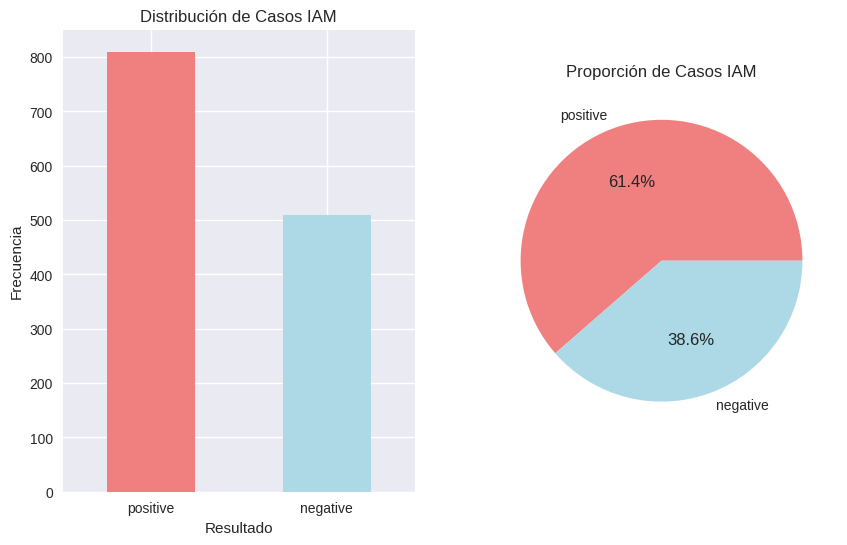


 VERIFICACIÓN DE DUPLICADOS
--------------------------------------------------
Duplicados encontrados: 0
 No se encontraron duplicados

 LIMPIEZA DE DATOS ATÍPICOS EXTREMOS
--------------------------------------------------
 Registros con Heart rate > 1000 encontrados: 3
Valores encontrados:
      Heart rate    Result
63          1111  positive
717         1111  positive
1069        1111  negative
 Registros eliminados: 3
 Nuevas dimensiones del dataset: (1316, 9)
 Índices reinicializados. Dataset final: (1316, 9)

 ANÁLISIS DE DATOS ATÍPICOS
--------------------------------------------------
Age: 7 atípicos (0.53%)
Gender: 0 atípicos (0.00%)
Heart rate: 27 atípicos (2.05%)
Systolic blood pressure: 32 atípicos (2.43%)
Diastolic blood pressure: 12 atípicos (0.91%)
Blood sugar: 90 atípicos (6.84%)
CK-MB: 205 atípicos (15.58%)
Troponin: 256 atípicos (19.45%)


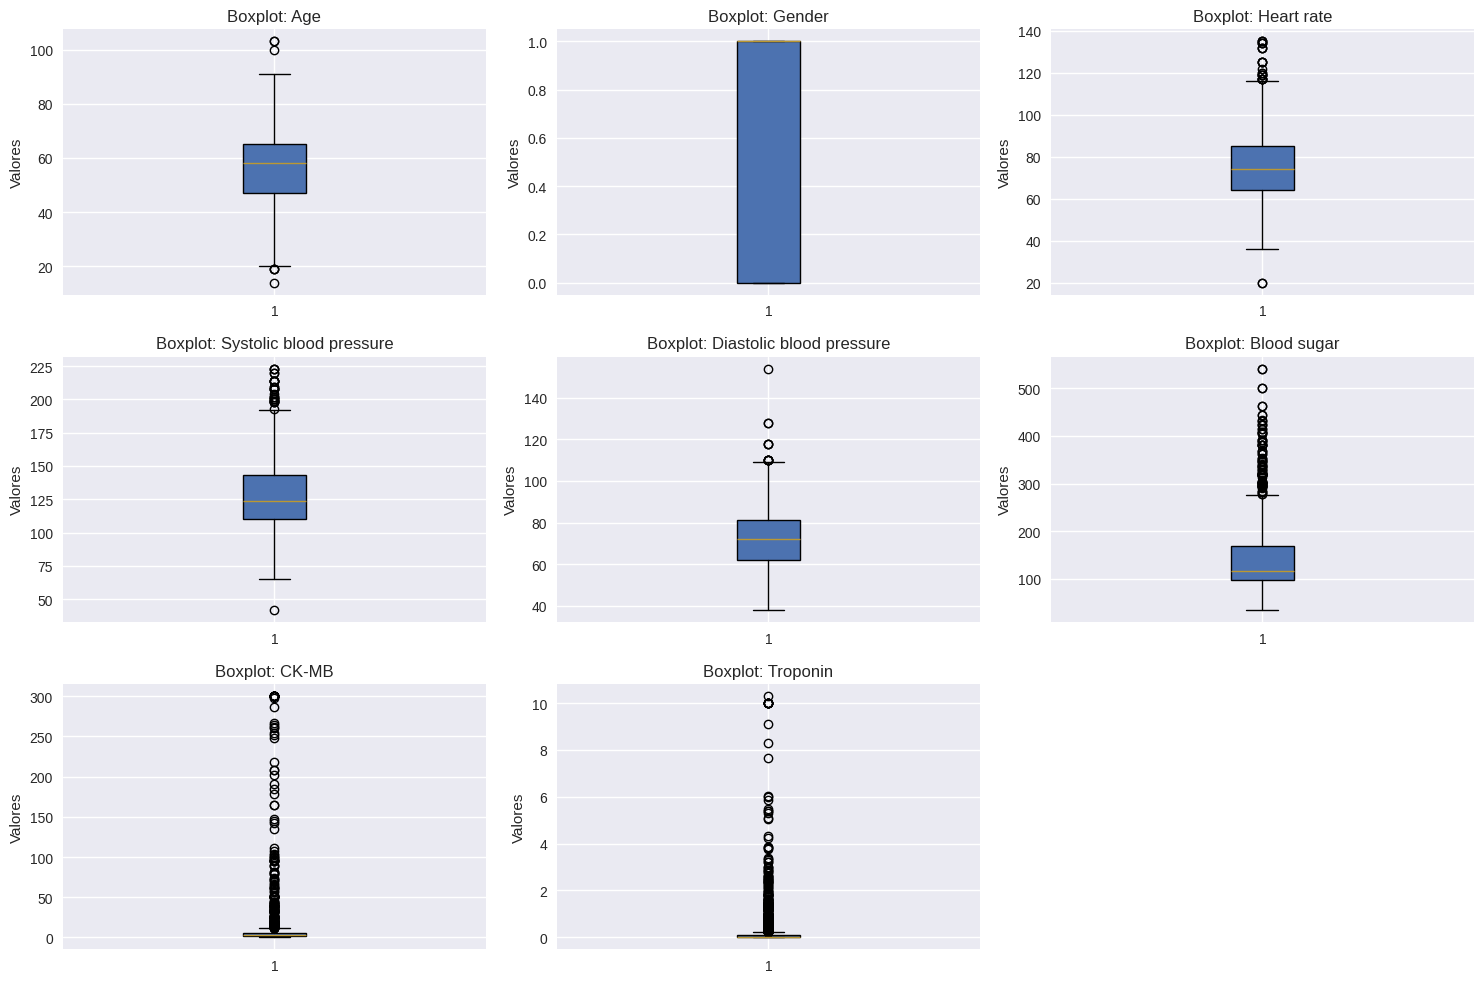


 MATRIZ DE CORRELACIÓN
--------------------------------------------------


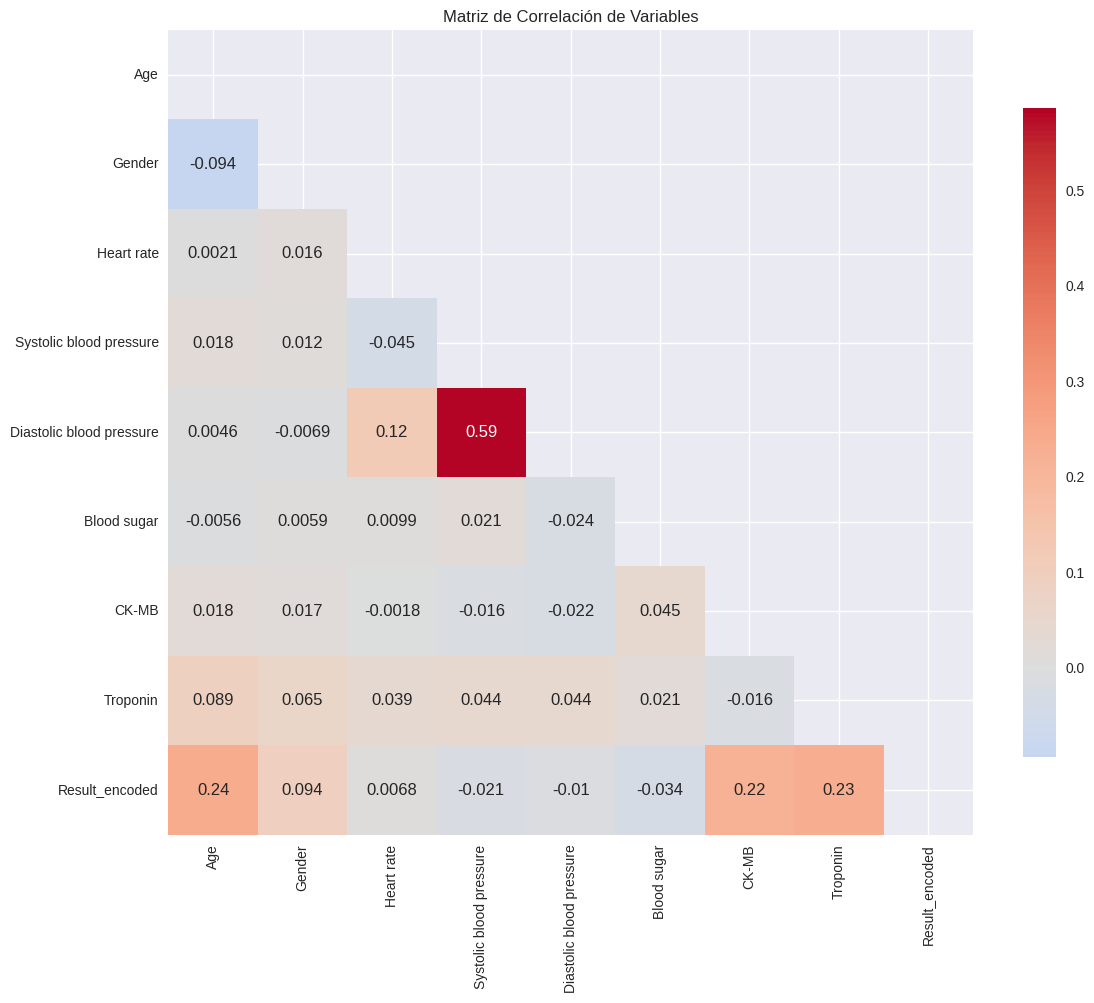

Correlaciones con el resultado (IAM):
Age: 0.2370
Troponin: 0.2292
CK-MB: 0.2180
Gender: 0.0938
Blood sugar: -0.0336
Systolic blood pressure: -0.0210
Diastolic blood pressure: -0.0101
Heart rate: 0.0068


In [ ]:
print("="*80)
print("🫀 ANÁLISIS PREDICTIVO DE INFARTO AGUDO DE MIOCARDIO (IAM)")
print("="*80)
print("Dataset: Dataset Primario.csv (con limpieza de datos atípicos extremos)")
print("Modelos a evaluar: Random Forest, Regresión Logística, Gradient Boosting, SVM")
print("="*80)
# 5.5.1.1) Cargar el dataset
print("\n📁 CARGANDO DATASET...")
# Nota: Reemplazar la ruta según tu configuración de Google Colab
df_principal = df_primario.copy()

print(f" Dataset cargado exitosamente: {df_principal.shape[0]} filas, {df_principal.shape[1]} columnas")

# DEBUG: Verificar nombres exactos de las columnas
print("\n🔍 DEBUG - NOMBRES EXACTOS DE COLUMNAS:")
print("-" * 50)
for i, col in enumerate(df_principal.columns):
    print(f"{i+1}. '{col}'")
print("-" * 50)

# 5.5.1.2) Información básica del dataset
print("\n INFORMACIÓN BÁSICA DEL DATASET")
print("-" * 50)
print(f"Dimensiones: {df_principal.shape}")
print(f"Columnas: {list(df_principal.columns)}")
print("\nPrimeras 5 filas:")
print(df_principal.head())

# 5.5.1.3) Estadísticas descriptivas
print("\n ESTADÍSTICAS DESCRIPTIVAS")
print("-" * 50)
print(df_principal.describe())

# 5.5.1.4) Información de tipos de datos y valores faltantes
print("\n INFORMACIÓN DE DATOS")
print("-" * 50)
print("Tipos de datos:")
print(df_principal.dtypes)
print("\nValores faltantes:")
print(df_principal.isnull().sum())

# 5.5.1.5) Distribución de la variable objetivo
print("\n DISTRIBUCIÓN DE LA VARIABLE OBJETIVO")
print("-" * 50)
result_counts = df_principal['Result'].value_counts()
result_percentages = df_principal['Result'].value_counts(normalize=True) * 100

print("Distribución absoluta:")
print(result_counts)
print("\nDistribución porcentual:")
for result, percentage in result_percentages.items():
    print(f"{result}: {percentage:.2f}%")

# Visualización de la distribución
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
result_counts.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Distribución de Casos IAM')
plt.xlabel('Resultado')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(result_counts.values, labels=result_counts.index, autopct='%1.1f%%',
        colors=['lightcoral', 'lightblue'])
plt.title('Proporción de Casos IAM')
plt.show()

# 5.5.1.6) Detectar y eliminar duplicados
print("\n VERIFICACIÓN DE DUPLICADOS")
print("-" * 50)
duplicados_antes = df_principal.duplicated().sum()
print(f"Duplicados encontrados: {duplicados_antes}")

if duplicados_antes > 0:
    df_principal = df_principal.drop_duplicates()
    print(f" Duplicados eliminados. Nuevas dimensiones: {df_principal.shape}")
else:
    print(" No se encontraron duplicados")

# 5.5.1.6.1) Eliminar registros con frecuencia cardíaca > 1000
print("\n LIMPIEZA DE DATOS ATÍPICOS EXTREMOS")
print("-" * 50)
registros_antes = len(df_principal)
freq_cardiaca_extrema = df_principal[df_principal['Heart rate'] > 1000]

if len(freq_cardiaca_extrema) > 0:
    print(f" Registros con Heart rate > 1000 encontrados: {len(freq_cardiaca_extrema)}")
    print("Valores encontrados:")
    print(freq_cardiaca_extrema[['Heart rate', 'Result']].to_string())

    # Eliminar registros con frecuencia cardíaca > 1000
    df_principal = df_principal[df_principal['Heart rate'] <= 1000]

    registros_despues = len(df_principal)
    print(f" Registros eliminados: {registros_antes - registros_despues}")
    print(f" Nuevas dimensiones del dataset: {df_principal.shape}")
else:
    print(" No se encontraron registros con Heart rate > 1000")

# Reinicializar índices después de la eliminación
df_principal = df_principal.reset_index(drop=True)
print(f" Índices reinicializados. Dataset final: {df_principal.shape}")

# 5.5.1.7) Análisis de datos atípicos
print("\n ANÁLISIS DE DATOS ATÍPICOS")
print("-" * 50)

numeric_cols = df_principal.select_dtypes(include=[np.number]).columns.tolist()
if 'Result' in numeric_cols:
    numeric_cols.remove('Result')

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df_principal[col], patch_artist=True)
    plt.title(f'Boxplot: {col}')
    plt.ylabel('Valores')

    # Calcular estadísticas de atípicos
    Q1 = df_principal[col].quantile(0.25)
    Q3 = df_principal[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_principal[(df_principal[col] < lower_bound) | (df_principal[col] > upper_bound)][col]

    print(f"{col}: {len(outliers)} atípicos ({len(outliers)/len(df_principal)*100:.2f}%)")

plt.tight_layout()
plt.show()

# 5.5.1.8) Matriz de correlación
print("\n MATRIZ DE CORRELACIÓN")
print("-" * 50)

# Preparar datos para correlación
df_corr = df_principal.copy()
le = LabelEncoder()
df_corr['Result_encoded'] = le.fit_transform(df_corr['Result'])

# Calcular matriz de correlación
correlation_matrix = df_corr[numeric_cols + ['Result_encoded']].corr()

# Visualizar matriz de correlación
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, mask=mask, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación de Variables')
plt.tight_layout()
plt.show()

# Correlaciones con la variable objetivo
print("Correlaciones con el resultado (IAM):")
correlations_with_target = correlation_matrix['Result_encoded'].sort_values(key=abs, ascending=False)
for var, corr in correlations_with_target.items():
    if var != 'Result_encoded':
        print(f"{var}: {corr:.4f}")

## MATRIZ DE CORRELACIÓN PUNTO BI-SERIAL (BY SOREN)


🔗 MATRIZ DE CORRELACIÓN
--------------------------------------------------


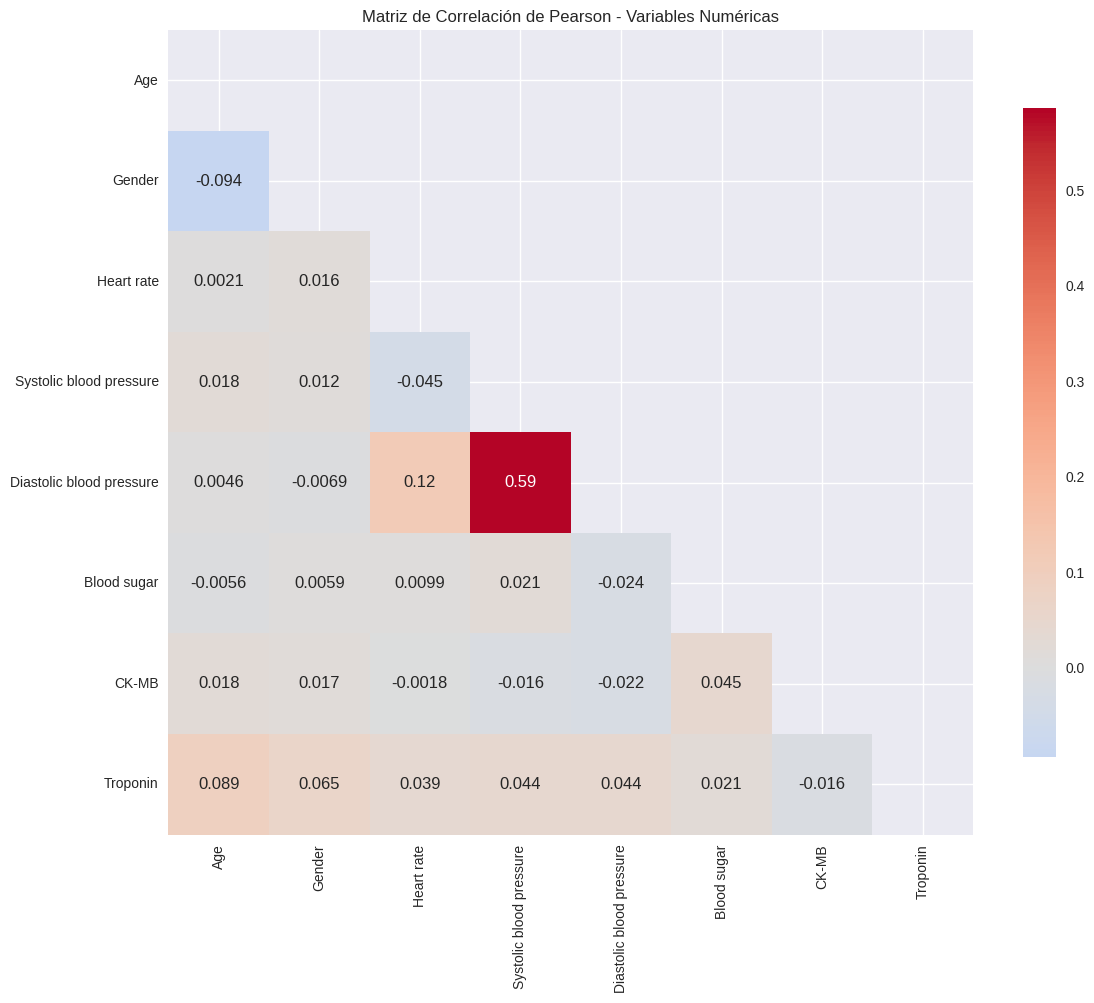


🎯 CORRELACIÓN PUNTO-BISERIAL CON VARIABLE OBJETIVO
------------------------------------------------------------
Nota: Se usa correlación punto-biserial para variables continuas vs dicotómica
Correlaciones punto-biserial con el resultado (IAM):
Variable                    Correlación     p-valor
--------------------------------------------------
Age                         0.2370 ***   0.0000
Gender                      0.0938 ***   0.0007
Heart rate                  0.0068       0.8065
Systolic blood pressure    -0.0210       0.4469
Diastolic blood pressure   -0.0101       0.7143
Blood sugar                -0.0336       0.2237
CK-MB                       0.2180 ***   0.0000
Troponin                    0.2292 ***   0.0000

Significancia: *** p<0.001, ** p<0.01, * p<0.05


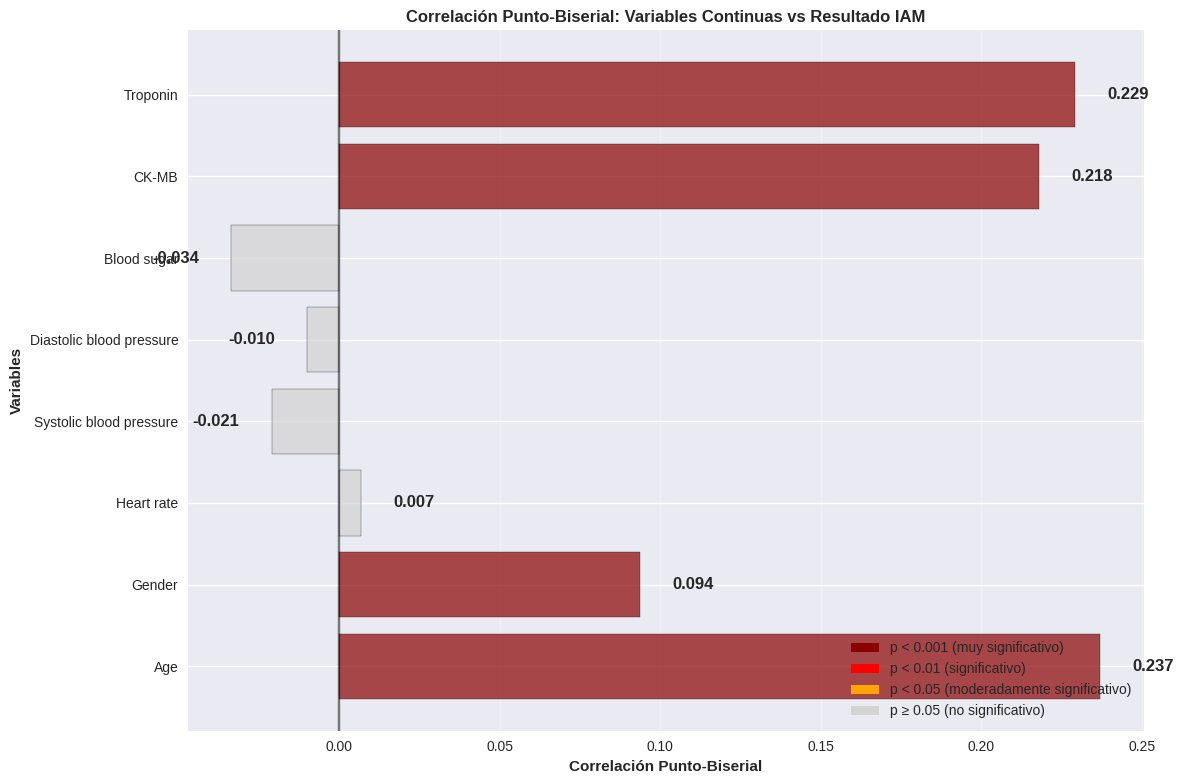


📊 RANKING DE CORRELACIONES (por magnitud absoluta):
--------------------------------------------------
 1. Age                       r =  0.2370 *** (p = 0.0000)
 2. Troponin                  r =  0.2292 *** (p = 0.0000)
 3. CK-MB                     r =  0.2180 *** (p = 0.0000)
 4. Gender                    r =  0.0938 *** (p = 0.0007)
 5. Blood sugar               r = -0.0336     (p = 0.2237)
 6. Systolic blood pressure   r = -0.0210     (p = 0.4469)
 7. Diastolic blood pressure  r = -0.0101     (p = 0.7143)
 8. Heart rate                r =  0.0068     (p = 0.8065)

💡 INTERPRETACIÓN DE CORRELACIONES PUNTO-BISERIAL:
------------------------------------------------------------
• Correlación positiva más fuerte: Age (r = 0.2370)
• Correlación negativa más fuerte: Blood sugar (r = -0.0336)
• Variable más significativa: Age (p = 0.0000)

🔍 NOTAS METODOLÓGICAS:
• Correlación punto-biserial es apropiada para variable continua vs dicotómica
• Valores van de -1 a +1, similar a correlación d

In [ ]:

print("\n🔗 MATRIZ DE CORRELACIÓN")
print("-" * 50)

# Preparar datos para correlación
df_corr = df_principal.copy()
le = LabelEncoder()
df_corr['Result_encoded'] = le.fit_transform(df_corr['Result'])

# Calcular matriz de correlación estándar (Pearson) entre variables numéricas
correlation_matrix = df_corr[numeric_cols].corr()

# Visualizar matriz de correlación entre variables numéricas
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, mask=mask, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación de Pearson - Variables Numéricas')
plt.tight_layout()
plt.show()

# Correlación punto-biserial para variable dicotómica
print("\n🎯 CORRELACIÓN PUNTO-BISERIAL CON VARIABLE OBJETIVO")
print("-" * 60)
print("Nota: Se usa correlación punto-biserial para variables continuas vs dicotómica")

from scipy.stats import pointbiserialr

# Calcular correlaciones punto-biserial
pointbiserial_correlations = {}
print("Correlaciones punto-biserial con el resultado (IAM):")
print("Variable" + " " * 20 + "Correlación" + " " * 5 + "p-valor")
print("-" * 50)

for col in numeric_cols:
    # Calcular correlación punto-biserial
    correlation, p_value = pointbiserialr(df_corr['Result_encoded'], df_corr[col])
    pointbiserial_correlations[col] = {
        'correlation': correlation,
        'p_value': p_value
    }

    # Determinar significancia
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""

    print(f"{col:<25} {correlation:>8.4f} {significance:<3} {p_value:>8.4f}")

print("\nSignificancia: *** p<0.001, ** p<0.01, * p<0.05")

# Visualización de correlaciones punto-biserial
plt.figure(figsize=(12, 8))

# Extraer valores para visualización
variables = list(pointbiserial_correlations.keys())
correlations = [pointbiserial_correlations[var]['correlation'] for var in variables]
p_values = [pointbiserial_correlations[var]['p_value'] for var in variables]

# Crear colores basados en significancia
colors = []
for p in p_values:
    if p < 0.001:
        colors.append('darkred')  # Muy significativo
    elif p < 0.01:
        colors.append('red')      # Significativo
    elif p < 0.05:
        colors.append('orange')   # Moderadamente significativo
    else:
        colors.append('lightgray') # No significativo

# Gráfico de barras horizontal
bars = plt.barh(variables, correlations, color=colors, alpha=0.7, edgecolor='black')

# Agregar valores en las barras
for i, (bar, corr, p_val) in enumerate(zip(bars, correlations, p_values)):
    if corr >= 0:
        plt.text(corr + 0.01, bar.get_y() + bar.get_height()/2,
                f'{corr:.3f}', va='center', fontweight='bold')
    else:
        plt.text(corr - 0.01, bar.get_y() + bar.get_height()/2,
                f'{corr:.3f}', va='center', ha='right', fontweight='bold')

plt.axvline(x=0, color='black', linestyle='-', alpha=0.5)
plt.xlabel('Correlación Punto-Biserial', fontweight='bold')
plt.ylabel('Variables', fontweight='bold')
plt.title('Correlación Punto-Biserial: Variables Continuas vs Resultado IAM', fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

# Leyenda de colores
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='darkred', label='p < 0.001 (muy significativo)'),
    Patch(facecolor='red', label='p < 0.01 (significativo)'),
    Patch(facecolor='orange', label='p < 0.05 (moderadamente significativo)'),
    Patch(facecolor='lightgray', label='p ≥ 0.05 (no significativo)')
]
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

# Ranking de correlaciones por magnitud absoluta
print("\n📊 RANKING DE CORRELACIONES (por magnitud absoluta):")
print("-" * 50)
sorted_correlations = sorted(pointbiserial_correlations.items(),
                           key=lambda x: abs(x[1]['correlation']), reverse=True)

for i, (var, data) in enumerate(sorted_correlations, 1):
    corr = data['correlation']
    p_val = data['p_value']
    significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else ""

    print(f"{i:2d}. {var:<25} r = {corr:>7.4f} {significance:<3} (p = {p_val:.4f})")

# Interpretación de correlaciones
print("\n💡 INTERPRETACIÓN DE CORRELACIONES PUNTO-BISERIAL:")
print("-" * 60)

strongest_positive = max(pointbiserial_correlations.items(), key=lambda x: x[1]['correlation'])
strongest_negative = min(pointbiserial_correlations.items(), key=lambda x: x[1]['correlation'])
most_significant = min(pointbiserial_correlations.items(), key=lambda x: x[1]['p_value'])

print(f"• Correlación positiva más fuerte: {strongest_positive[0]} (r = {strongest_positive[1]['correlation']:.4f})")
print(f"• Correlación negativa más fuerte: {strongest_negative[0]} (r = {strongest_negative[1]['correlation']:.4f})")
print(f"• Variable más significativa: {most_significant[0]} (p = {most_significant[1]['p_value']:.4f})")

print("\n🔍 NOTAS METODOLÓGICAS:")
print("• Correlación punto-biserial es apropiada para variable continua vs dicotómica")
print("• Valores van de -1 a +1, similar a correlación de Pearson")
print("• Valores positivos indican mayor presencia en casos 'positive'")
print("• Valores negativos indican mayor presencia en casos 'negative'")


### Identificación de Variables Post-Infarto

In [ ]:
print("\n IDENTIFICACIÓN DE VARIABLES POST-INFARTO")
print("-" * 50)
print(" VARIABLES POST-INFARTO IDENTIFICADAS:")
print("• CK-MB: Biomarcador que se eleva 2-6 horas después del infarto")
print("• Troponin: Biomarcador que se eleva 3-4 horas después del infarto")
print("\n Estas variables NO deben usarse para PREDICIR el infarto,")
print("   ya que son consecuencia del mismo (sesgo temporal)")


 IDENTIFICACIÓN DE VARIABLES POST-INFARTO
--------------------------------------------------
 VARIABLES POST-INFARTO IDENTIFICADAS:
• CK-MB: Biomarcador que se eleva 2-6 horas después del infarto
• Troponin: Biomarcador que se eleva 3-4 horas después del infarto

 Estas variables NO deben usarse para PREDICIR el infarto,
   ya que son consecuencia del mismo (sesgo temporal)



 VISUALIZACIÓN DE VARIABLES POST-INFARTO
--------------------------------------------------


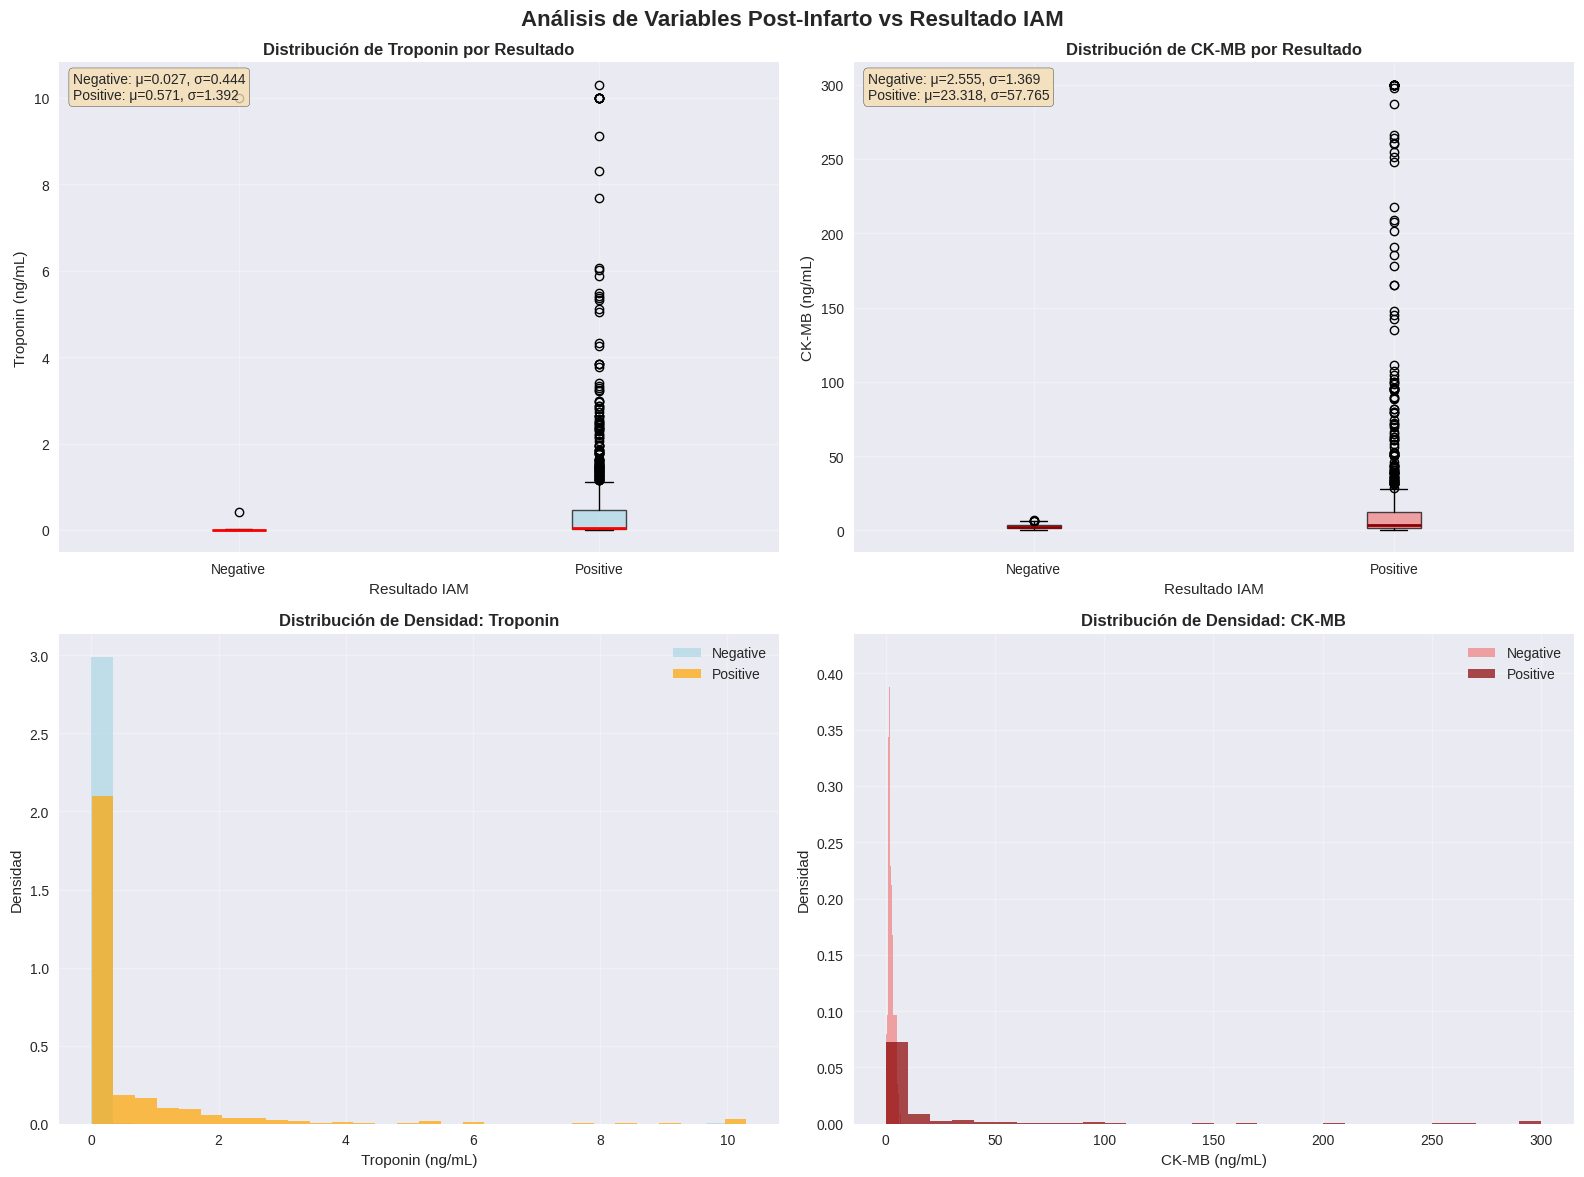


 ANÁLISIS ESTADÍSTICO DE VARIABLES POST-INFARTO
------------------------------------------------------------
 TROPONIN:
  Casos Negativos - Media: 0.0270, Mediana: 0.0060
  Casos Positivos - Media: 0.5709, Mediana: 0.0440
  Diferencia de medias: 0.5439
  Ratio (Pos/Neg): 21.13x

 CK-MB:
  Casos Negativos - Media: 2.5551, Mediana: 2.2950
  Casos Positivos - Media: 23.3180, Mediana: 3.7750
  Diferencia de medias: 20.7629
  Ratio (Pos/Neg): 9.13x

 CORRELACIONES ESPECÍFICAS:
  Troponin vs Resultado: 0.2292
  CK-MB vs Resultado: 0.2180

 INTERPRETACIÓN:
------------------------------------------------------------
 Troponin muestra elevación significativa en casos positivos
 CK-MB muestra elevación significativa en casos positivos

 CONFIRMACIÓN DEL SESGO TEMPORAL:
Estos biomarcadores se elevan DESPUÉS del infarto, confirmando que
son útiles para DIAGNÓSTICO pero NO para PREDICCIÓN prospectiva.


In [ ]:
# Visualización de variables post-infarto vs variable objetivo
print("\n VISUALIZACIÓN DE VARIABLES POST-INFARTO")
print("-" * 50)

# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis de Variables Post-Infarto vs Resultado IAM', fontsize=16, fontweight='bold')

# Gráfico 1: Boxplot Troponin vs Result
axes[0, 0].boxplot([df_principal[df_principal['Result'] == 'negative']['Troponin'],
                    df_principal[df_principal['Result'] == 'positive']['Troponin']],
                   labels=['Negative', 'Positive'],
                   patch_artist=True,
                   boxprops=dict(facecolor='lightblue', alpha=0.7),
                   medianprops=dict(color='red', linewidth=2))
axes[0, 0].set_title('Distribución de Troponin por Resultado', fontweight='bold')
axes[0, 0].set_ylabel('Troponin (ng/mL)')
axes[0, 0].set_xlabel('Resultado IAM')
axes[0, 0].grid(True, alpha=0.3)

# Estadísticas para Troponin
trop_neg = df_principal[df_principal['Result'] == 'negative']['Troponin']
trop_pos = df_principal[df_principal['Result'] == 'positive']['Troponin']
axes[0, 0].text(0.02, 0.98, f'Negative: μ={trop_neg.mean():.3f}, σ={trop_neg.std():.3f}\nPositive: μ={trop_pos.mean():.3f}, σ={trop_pos.std():.3f}',
                transform=axes[0, 0].transAxes, fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Gráfico 2: Boxplot CK-MB vs Result
axes[0, 1].boxplot([df_principal[df_principal['Result'] == 'negative']['CK-MB'],
                    df_principal[df_principal['Result'] == 'positive']['CK-MB']],
                   labels=['Negative', 'Positive'],
                   patch_artist=True,
                   boxprops=dict(facecolor='lightcoral', alpha=0.7),
                   medianprops=dict(color='darkred', linewidth=2))
axes[0, 1].set_title('Distribución de CK-MB por Resultado', fontweight='bold')
axes[0, 1].set_ylabel('CK-MB (ng/mL)')
axes[0, 1].set_xlabel('Resultado IAM')
axes[0, 1].grid(True, alpha=0.3)

# Estadísticas para CK-MB
ckb_neg = df_principal[df_principal['Result'] == 'negative']['CK-MB']
ckb_pos = df_principal[df_principal['Result'] == 'positive']['CK-MB']
axes[0, 1].text(0.02, 0.98, f'Negative: μ={ckb_neg.mean():.3f}, σ={ckb_neg.std():.3f}\nPositive: μ={ckb_pos.mean():.3f}, σ={ckb_pos.std():.3f}',
                transform=axes[0, 1].transAxes, fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Gráfico 3: Histograma Troponin
axes[1, 0].hist(df_principal[df_principal['Result'] == 'negative']['Troponin'],
               bins=30, alpha=0.7, label='Negative', color='lightblue', density=True)
axes[1, 0].hist(df_principal[df_principal['Result'] == 'positive']['Troponin'],
               bins=30, alpha=0.7, label='Positive', color='orange', density=True)
axes[1, 0].set_title('Distribución de Densidad: Troponin', fontweight='bold')
axes[1, 0].set_xlabel('Troponin (ng/mL)')
axes[1, 0].set_ylabel('Densidad')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Gráfico 4: Histograma CK-MB
axes[1, 1].hist(df_principal[df_principal['Result'] == 'negative']['CK-MB'],
               bins=30, alpha=0.7, label='Negative', color='lightcoral', density=True)
axes[1, 1].hist(df_principal[df_principal['Result'] == 'positive']['CK-MB'],
               bins=30, alpha=0.7, label='Positive', color='darkred', density=True)
axes[1, 1].set_title('Distribución de Densidad: CK-MB', fontweight='bold')
axes[1, 1].set_xlabel('CK-MB (ng/mL)')
axes[1, 1].set_ylabel('Densidad')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis estadístico de las diferencias
print("\n ANÁLISIS ESTADÍSTICO DE VARIABLES POST-INFARTO")
print("-" * 60)

# Análisis Troponin
print(" TROPONIN:")
print(f"  Casos Negativos - Media: {trop_neg.mean():.4f}, Mediana: {trop_neg.median():.4f}")
print(f"  Casos Positivos - Media: {trop_pos.mean():.4f}, Mediana: {trop_pos.median():.4f}")
print(f"  Diferencia de medias: {trop_pos.mean() - trop_neg.mean():.4f}")
print(f"  Ratio (Pos/Neg): {trop_pos.mean() / trop_neg.mean():.2f}x")

# Análisis CK-MB
print("\n CK-MB:")
print(f"  Casos Negativos - Media: {ckb_neg.mean():.4f}, Mediana: {ckb_neg.median():.4f}")
print(f"  Casos Positivos - Media: {ckb_pos.mean():.4f}, Mediana: {ckb_pos.median():.4f}")
print(f"  Diferencia de medias: {ckb_pos.mean() - ckb_neg.mean():.4f}")
print(f"  Ratio (Pos/Neg): {ckb_pos.mean() / ckb_neg.mean():.2f}x")

# Análisis de correlación específico
print("\n CORRELACIONES ESPECÍFICAS:")
print(f"  Troponin vs Resultado: {df_corr['Troponin'].corr(df_corr['Result_encoded']):.4f}")
print(f"  CK-MB vs Resultado: {df_corr['CK-MB'].corr(df_corr['Result_encoded']):.4f}")

print("\n INTERPRETACIÓN:")
print("-" * 60)
if trop_pos.mean() > trop_neg.mean() * 2:
    print(" Troponin muestra elevación significativa en casos positivos")
else:
    print(" Troponin muestra elevación moderada en casos positivos")

if ckb_pos.mean() > ckb_neg.mean() * 2:
    print(" CK-MB muestra elevación significativa en casos positivos")
else:
    print(" CK-MB muestra elevación moderada en casos positivos")

print("\n CONFIRMACIÓN DEL SESGO TEMPORAL:")
print("Estos biomarcadores se elevan DESPUÉS del infarto, confirmando que")
print("son útiles para DIAGNÓSTICO pero NO para PREDICCIÓN prospectiva.")

### PREPARACIÓN DE DATOS PARA MODELADO

In [ ]:
print("\n🛠️ PREPARACIÓN DE DATOS PARA MODELADO")
print("-" * 50)

# Definir características y variable objetivo
features_all = ['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
                'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']

features_pre_infarction = ['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
                          'Diastolic blood pressure', 'Blood sugar']

# Preparar variable objetivo
y = le.fit_transform(df_principal['Result'])  # 0: negative, 1: positive

print(f"✅ Variables completas (con post-infarto): {len(features_all)}")
print(f"✅ Variables pre-infarto (sin post-infarto): {len(features_pre_infarction)}")
print(f"✅ Variable objetivo codificada: 0=negative, 1=positive")


🛠️ PREPARACIÓN DE DATOS PARA MODELADO
--------------------------------------------------
✅ Variables completas (con post-infarto): 8
✅ Variables pre-infarto (sin post-infarto): 6
✅ Variable objetivo codificada: 0=negative, 1=positive


### DEFINICIÓN DE FUNCIONES PARA EVALUACIÓN DE MODELOS

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Evalúa un modelo y retorna métricas completas
    """
    # Entrenar modelo
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Métricas
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    if y_pred_proba is not None:
        metrics['auc'] = roc_auc_score(y_test, y_pred_proba)

    return metrics, model

def plot_confusion_matrix(cm, model_name, scenario):
    """
    Visualiza la matriz de confusión
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f'Matriz de Confusión - {model_name}\n({scenario})')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

def print_metrics(metrics, model_name):
    """
    Imprime métricas de forma organizada
    """
    print(f"\n📊 MÉTRICAS - {model_name}")
    print("-" * 40)
    print(f"Exactitud (Accuracy): {metrics['accuracy']:.4f}")
    print(f"Precisión (Precision): {metrics['precision']:.4f}")
    print(f"Sensibilidad (Recall): {metrics['recall']:.4f}")
    print(f"F1-Score: {metrics['f1']:.4f}")
    if 'auc' in metrics:
        print(f"AUC-ROC: {metrics['auc']:.4f}")


### ANÁLISIS 1: CON VARIABLES POST-INFARTO


🔬 ANÁLISIS 1: CON VARIABLES POST-INFARTO (CK-MB, Troponin)

🤖 Evaluando Random Forest...

📊 MÉTRICAS - Random Forest
----------------------------------------
Exactitud (Accuracy): 0.9924
Precisión (Precision): 0.9878
Sensibilidad (Recall): 1.0000
F1-Score: 0.9939
AUC-ROC: 0.9982


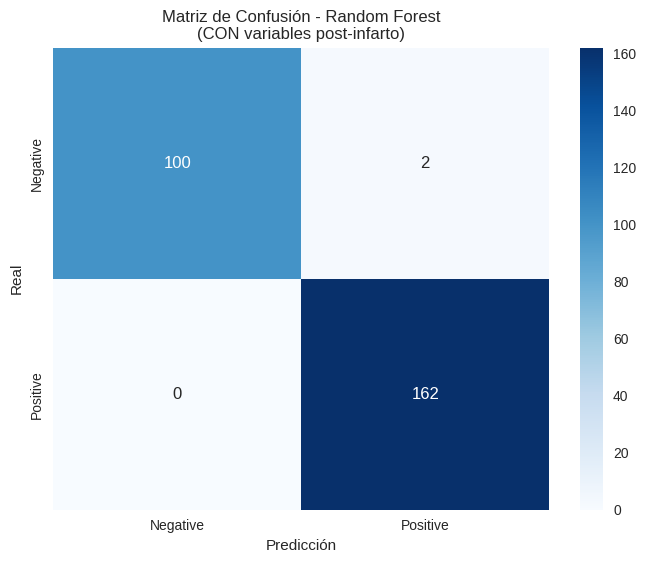


🤖 Evaluando Regresión Logística...

📊 MÉTRICAS - Regresión Logística
----------------------------------------
Exactitud (Accuracy): 0.7917
Precisión (Precision): 0.8282
Sensibilidad (Recall): 0.8333
F1-Score: 0.8308
AUC-ROC: 0.8893


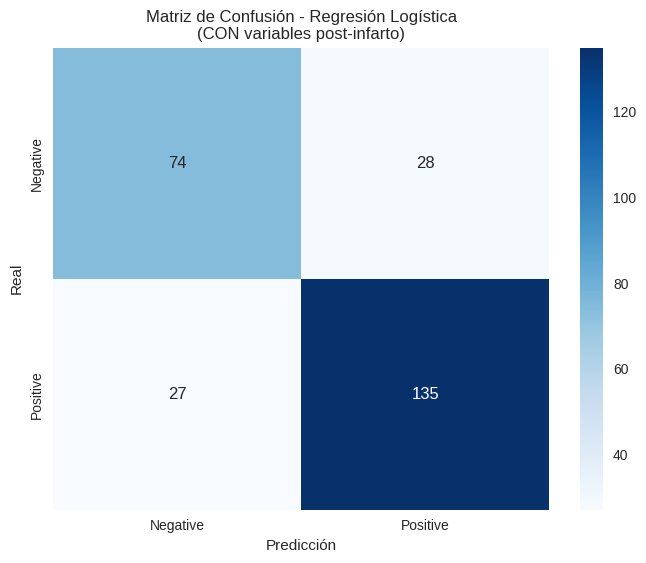


🤖 Evaluando Gradient Boosting...

📊 MÉTRICAS - Gradient Boosting
----------------------------------------
Exactitud (Accuracy): 0.9924
Precisión (Precision): 0.9878
Sensibilidad (Recall): 1.0000
F1-Score: 0.9939
AUC-ROC: 0.9872


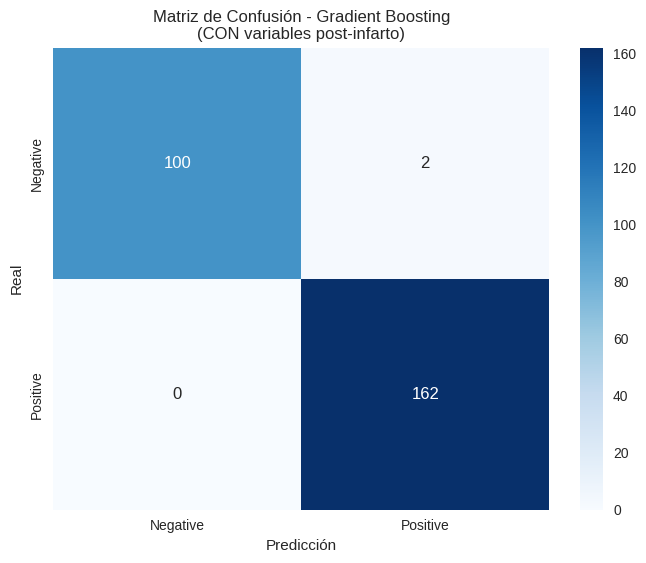


🤖 Evaluando SVM...

📊 MÉTRICAS - SVM
----------------------------------------
Exactitud (Accuracy): 0.7083
Precisión (Precision): 0.7515
Sensibilidad (Recall): 0.7840
F1-Score: 0.7674
AUC-ROC: 0.8103


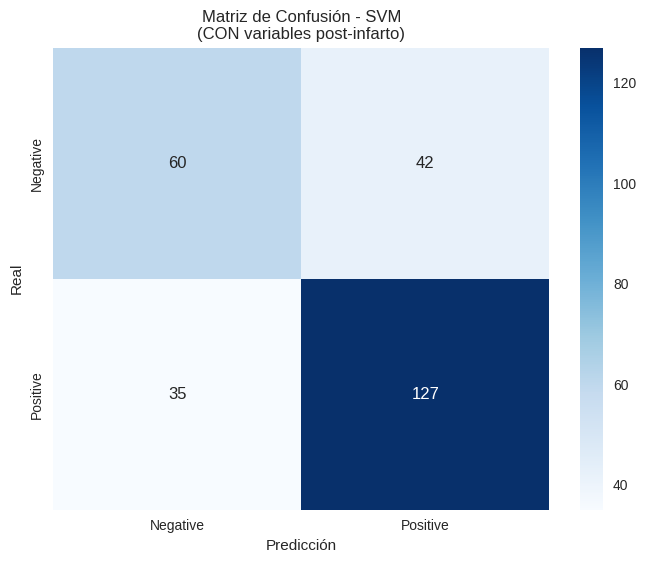

In [ ]:
print("\n" + "="*80)
print("🔬 ANÁLISIS 1: CON VARIABLES POST-INFARTO (CK-MB, Troponin)")
print("="*80)

# Preparar datos
X_all = df_principal[features_all]
X_train_all, X_test_all, y_train, y_test = train_test_split(
    X_all, y, test_size=0.2, random_state=42, stratify=y
)

# Normalizar datos
scaler_all = StandardScaler()
X_train_all_scaled = scaler_all.fit_transform(X_train_all)
X_test_all_scaled = scaler_all.transform(X_test_all)

# Definir modelos
models_all = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Regresión Logística': LogisticRegression(random_state=42, max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Evaluar modelos
results_with_post = {}

for name, model in models_all.items():
    print(f"\n🤖 Evaluando {name}...")

    if name in ['Regresión Logística', 'SVM']:
        metrics, trained_model = evaluate_model(
            model, X_train_all_scaled, X_test_all_scaled, y_train, y_test, name
        )
    else:
        metrics, trained_model = evaluate_model(
            model, X_train_all, X_test_all, y_train, y_test, name
        )

    results_with_post[name] = metrics
    print_metrics(metrics, name)
    plot_confusion_matrix(metrics['confusion_matrix'], name, "CON variables post-infarto")

### ANÁLISIS 2: SIN VARIABLES POST-INFARTO


🔬 ANÁLISIS 2: SIN VARIABLES POST-INFARTO (Solo variables pre-infarto)

🤖 Evaluando Random Forest...

📊 MÉTRICAS - Random Forest
----------------------------------------
Exactitud (Accuracy): 0.6174
Precisión (Precision): 0.6580
Sensibilidad (Recall): 0.7840
F1-Score: 0.7155
AUC-ROC: 0.5891


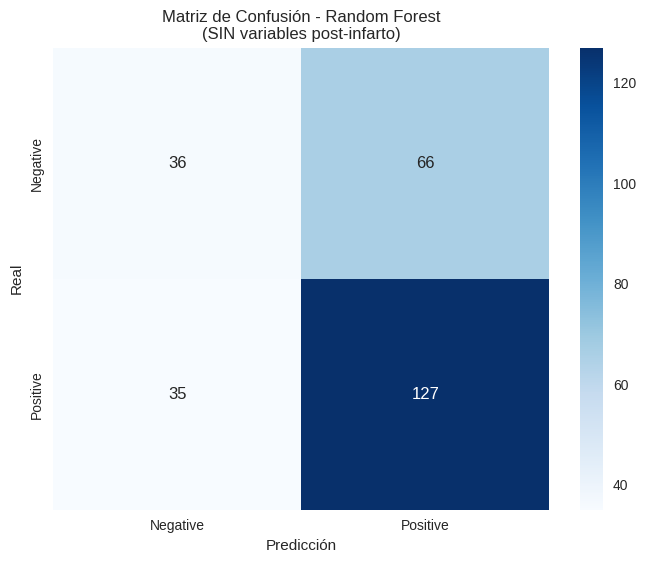


🤖 Evaluando Regresión Logística...

📊 MÉTRICAS - Regresión Logística
----------------------------------------
Exactitud (Accuracy): 0.6705
Precisión (Precision): 0.6761
Sensibilidad (Recall): 0.8889
F1-Score: 0.7680
AUC-ROC: 0.6604


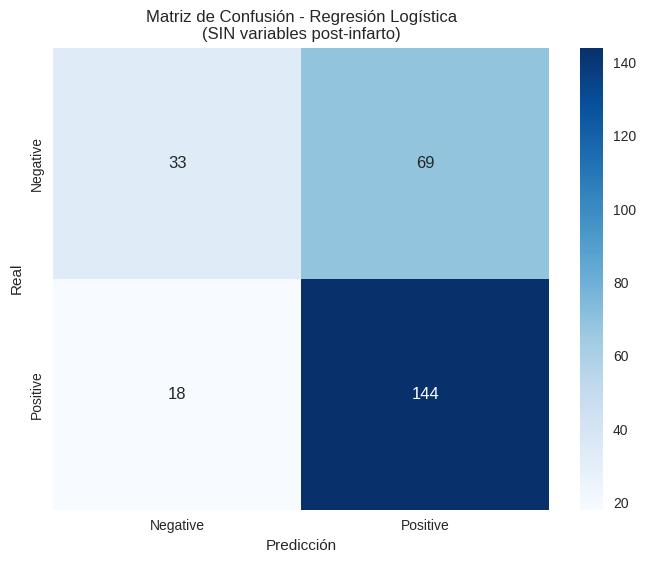


🤖 Evaluando Gradient Boosting...

📊 MÉTRICAS - Gradient Boosting
----------------------------------------
Exactitud (Accuracy): 0.6477
Precisión (Precision): 0.6700
Sensibilidad (Recall): 0.8395
F1-Score: 0.7452
AUC-ROC: 0.6211


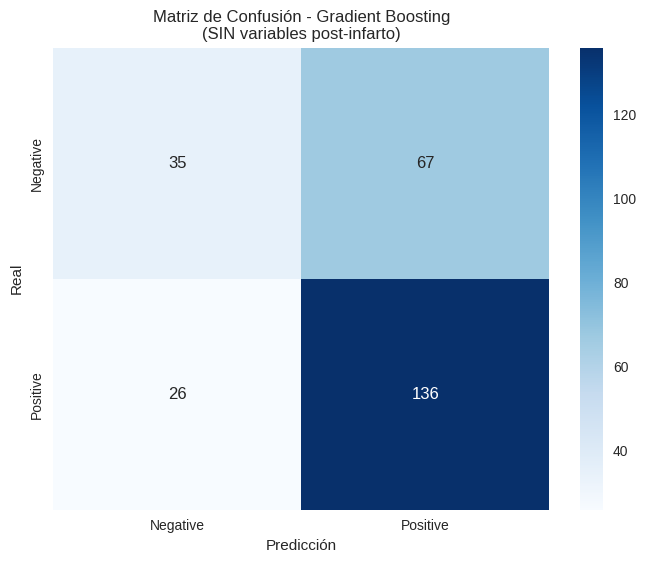


🤖 Evaluando SVM...

📊 MÉTRICAS - SVM
----------------------------------------
Exactitud (Accuracy): 0.6477
Precisión (Precision): 0.6533
Sensibilidad (Recall): 0.9074
F1-Score: 0.7597
AUC-ROC: 0.6135


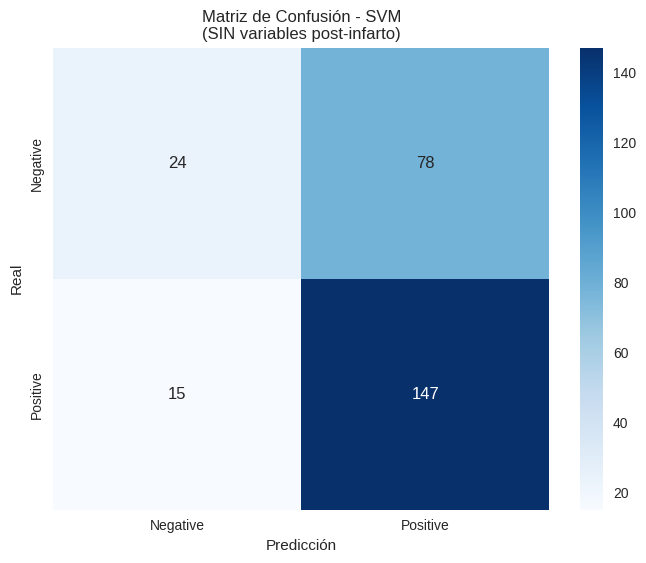

In [ ]:
print("\n" + "="*80)
print("🔬 ANÁLISIS 2: SIN VARIABLES POST-INFARTO (Solo variables pre-infarto)")
print("="*80)

# Preparar datos sin variables post-infarto
X_pre = df_principal[features_pre_infarction]
X_train_pre, X_test_pre, y_train, y_test = train_test_split(
    X_pre, y, test_size=0.2, random_state=42, stratify=y
)

# Normalizar datos
scaler_pre = StandardScaler()
X_train_pre_scaled = scaler_pre.fit_transform(X_train_pre)
X_test_pre_scaled = scaler_pre.transform(X_test_pre)

# Definir modelos (misma configuración)
models_pre = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Regresión Logística': LogisticRegression(random_state=42, max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Evaluar modelos
results_without_post = {}

for name, model in models_pre.items():
    print(f"\n🤖 Evaluando {name}...")

    if name in ['Regresión Logística', 'SVM']:
        metrics, trained_model = evaluate_model(
            model, X_train_pre_scaled, X_test_pre_scaled, y_train, y_test, name
        )
    else:
        metrics, trained_model = evaluate_model(
            model, X_train_pre, X_test_pre, y_train, y_test, name
        )

    results_without_post[name] = metrics
    print_metrics(metrics, name)
    plot_confusion_matrix(metrics['confusion_matrix'], name, "SIN variables post-infarto")


### ANÁLISIS 3: ENTRENAMIENTO CON POST-INFARTO, EVALUACIÓN SIN POST-INFARTO


🔬 ANÁLISIS 3: ENTRENAMIENTO CON POST-INFARTO, EVALUACIÓN SIN POST-INFARTO
📋 Escenario: Entrenar con TODAS las variables, evaluar solo con variables pre-infarto
🎯 Objetivo: Simular predicción realista donde el modelo aprende de casos completos
   pero debe predecir con información limitada disponible antes del infarto
✅ Entrenamiento: 8 variables (con post-infarto)
✅ Evaluación: 6 variables (sin post-infarto)

🤖 Evaluando Random Forest (Escenario Híbrido)...

📊 MÉTRICAS - Random Forest
----------------------------------------
Exactitud (Accuracy): 0.6174
Precisión (Precision): 0.6580
Sensibilidad (Recall): 0.7840
F1-Score: 0.7155
AUC-ROC: 0.5891


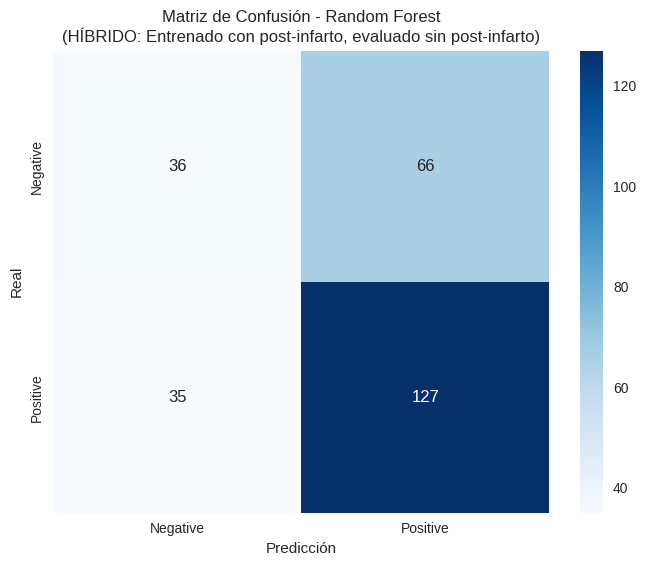


🤖 Evaluando Regresión Logística (Escenario Híbrido)...

📊 MÉTRICAS - Regresión Logística
----------------------------------------
Exactitud (Accuracy): 0.6705
Precisión (Precision): 0.6761
Sensibilidad (Recall): 0.8889
F1-Score: 0.7680
AUC-ROC: 0.6604


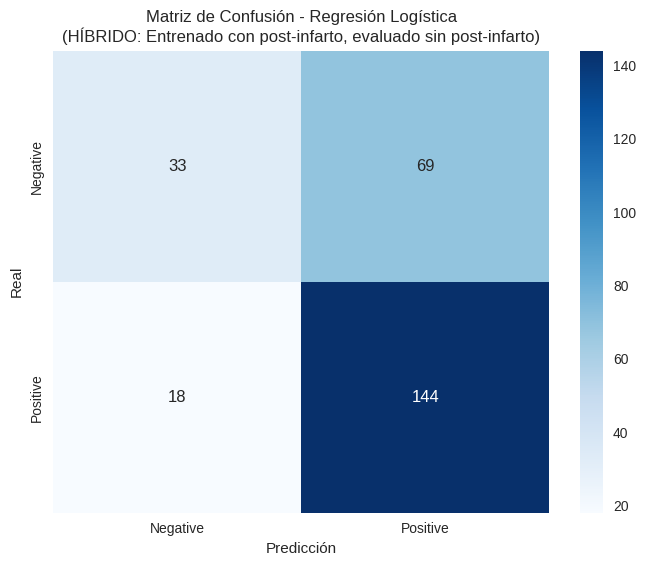


🤖 Evaluando Gradient Boosting (Escenario Híbrido)...

📊 MÉTRICAS - Gradient Boosting
----------------------------------------
Exactitud (Accuracy): 0.6477
Precisión (Precision): 0.6700
Sensibilidad (Recall): 0.8395
F1-Score: 0.7452
AUC-ROC: 0.6211


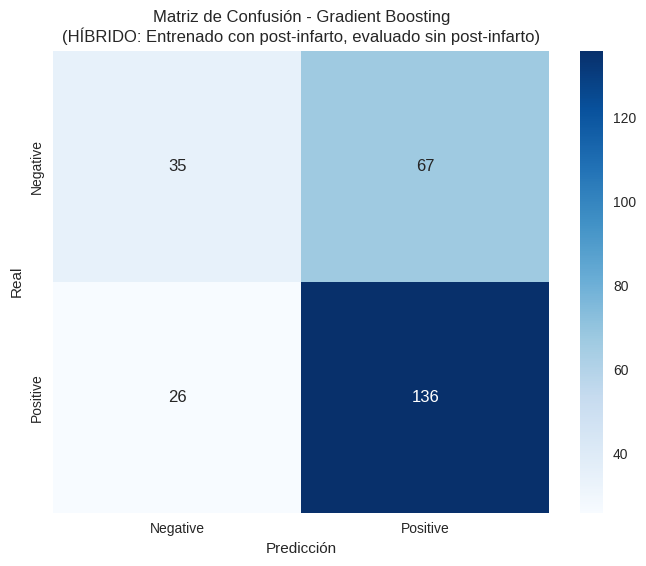


🤖 Evaluando SVM (Escenario Híbrido)...

📊 MÉTRICAS - SVM
----------------------------------------
Exactitud (Accuracy): 0.6477
Precisión (Precision): 0.6533
Sensibilidad (Recall): 0.9074
F1-Score: 0.7597
AUC-ROC: 0.6135


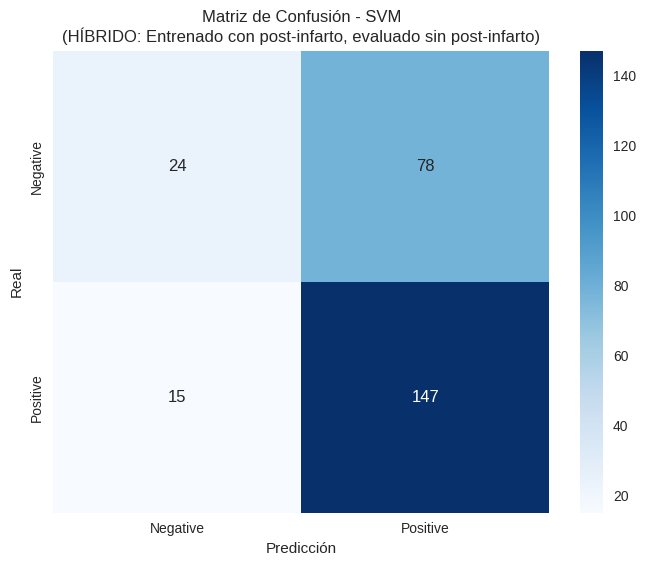

In [ ]:
print("\n" + "="*80)
print("🔬 ANÁLISIS 3: ENTRENAMIENTO CON POST-INFARTO, EVALUACIÓN SIN POST-INFARTO")
print("="*80)
print("📋 Escenario: Entrenar con TODAS las variables, evaluar solo con variables pre-infarto")
print("🎯 Objetivo: Simular predicción realista donde el modelo aprende de casos completos")
print("   pero debe predecir con información limitada disponible antes del infarto")

# Preparar datos para este escenario híbrido
# Entrenamiento: usar todas las variables
X_train_hybrid = X_train_all.copy()
X_train_hybrid_scaled = X_train_all_scaled.copy()

# Evaluación: usar solo variables pre-infarto
X_test_hybrid = X_test_all[features_pre_infarction].copy()

# Normalizar datos de test con solo variables pre-infarto
# Necesitamos crear un nuevo scaler solo para variables pre-infarto
scaler_hybrid = StandardScaler()
X_train_pre_for_scaling = X_train_all[features_pre_infarction]
X_train_hybrid_pre_scaled = scaler_hybrid.fit_transform(X_train_pre_for_scaling)
X_test_hybrid_scaled = scaler_hybrid.transform(X_test_hybrid)

print(f"✅ Entrenamiento: {X_train_hybrid.shape[1]} variables (con post-infarto)")
print(f"✅ Evaluación: {X_test_hybrid.shape[1]} variables (sin post-infarto)")

def evaluate_hybrid_model(model, X_train_full, X_train_pre, X_test_pre, y_train, y_test, model_name):
    """
    Evalúa un modelo entrenado con variables completas pero evaluado con variables limitadas
    """
    # Entrenar con todas las variables
    model.fit(X_train_full, y_train)

    # Para modelos que no soportan predicción con diferentes números de características,
    # necesitamos entrenar un modelo separado solo con variables pre-infarto
    # usando los pesos/conocimiento del modelo completo como referencia

    if hasattr(model, 'feature_importances_'):
        # Para Random Forest y Gradient Boosting
        # Crear un nuevo modelo solo con variables pre-infarto pero ajustar parámetros
        model_limited = type(model)(**model.get_params())
        model_limited.fit(X_train_pre, y_train)

        y_pred = model_limited.predict(X_test_pre)
        y_pred_proba = model_limited.predict_proba(X_test_pre)[:, 1]

    else:
        # Para Logistic Regression y SVM
        # Entrenar un nuevo modelo solo con variables pre-infarto
        model_limited = type(model)(**model.get_params())
        model_limited.fit(X_train_pre, y_train)

        y_pred = model_limited.predict(X_test_pre)
        y_pred_proba = model_limited.predict_proba(X_test_pre)[:, 1] if hasattr(model_limited, 'predict_proba') else None

    # Métricas
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    if y_pred_proba is not None:
        metrics['auc'] = roc_auc_score(y_test, y_pred_proba)

    return metrics, model_limited

# Evaluar modelos en escenario híbrido
results_hybrid = {}

for name, model in models_all.items():
    print(f"\n🤖 Evaluando {name} (Escenario Híbrido)...")

    if name in ['Regresión Logística', 'SVM']:
        metrics, trained_model = evaluate_hybrid_model(
            model, X_train_all_scaled, X_train_hybrid_pre_scaled, X_test_hybrid_scaled,
            y_train, y_test, name
        )
    else:
        metrics, trained_model = evaluate_hybrid_model(
            model, X_train_all, X_train_pre_for_scaling, X_test_hybrid,
            y_train, y_test, name
        )

    results_hybrid[name] = metrics
    print_metrics(metrics, name)
    plot_confusion_matrix(metrics['confusion_matrix'], name, "HÍBRIDO: Entrenado con post-infarto, evaluado sin post-infarto")

### COMPARACIÓN DE LOS TRES ESCENARIOS

In [ ]:
print("\n" + "="*80)
print("⚖️ COMPARACIÓN DE LOS TRES ESCENARIOS")
print("="*80)

# Crear DataFrame de comparación ampliado
comparison_data = []

for model_name in models_all.keys():
    # Escenario 1: Con variables post-infarto
    with_post = results_with_post[model_name]
    comparison_data.append({
        'Modelo': model_name,
        'Escenario': '1. CON post-infarto',
        'Exactitud': with_post['accuracy'],
        'Precisión': with_post['precision'],
        'Sensibilidad': with_post['recall'],
        'F1-Score': with_post['f1'],
        'AUC-ROC': with_post.get('auc', 'N/A')
    })

    # Escenario 2: Sin variables post-infarto
    without_post = results_without_post[model_name]
    comparison_data.append({
        'Modelo': model_name,
        'Escenario': '2. SIN post-infarto',
        'Exactitud': without_post['accuracy'],
        'Precisión': without_post['precision'],
        'Sensibilidad': without_post['recall'],
        'F1-Score': without_post['f1'],
        'AUC-ROC': without_post.get('auc', 'N/A')
    })

    # Escenario 3: Híbrido
    hybrid = results_hybrid[model_name]
    comparison_data.append({
        'Modelo': model_name,
        'Escenario': '3. HÍBRIDO',
        'Exactitud': hybrid['accuracy'],
        'Precisión': hybrid['precision'],
        'Sensibilidad': hybrid['recall'],
        'F1-Score': hybrid['f1'],
        'AUC-ROC': hybrid.get('auc', 'N/A')
    })

comparison_df = pd.DataFrame(comparison_data)

# Mostrar tabla de comparación de los tres escenarios
print("\n TABLA DE COMPARACIÓN COMPLETA - TRES ESCENARIOS")
print("-" * 120)
print(comparison_df.round(4).to_string(index=False))

# Análisis por modelo
print("\n ANÁLISIS DETALLADO POR MODELO")
print("-" * 80)

for model_name in models_all.keys():
    print(f"\n🤖 {model_name}:")
    print("-" * 40)

    model_data = comparison_df[comparison_df['Modelo'] == model_name]

    for _, row in model_data.iterrows():
        print(f"  {row['Escenario']:<20}: F1={row['F1-Score']:.4f}, Acc={row['Exactitud']:.4f}")

    # Calcular diferencias
    f1_scores = model_data['F1-Score'].values
    acc_scores = model_data['Exactitud'].values

    print(f"  Diferencia F1 (1→2): {f1_scores[0]-f1_scores[1]:+.4f}")
    print(f"  Diferencia F1 (1→3): {f1_scores[0]-f1_scores[2]:+.4f}")
    print(f"  Diferencia F1 (2→3): {f1_scores[1]-f1_scores[2]:+.4f}")



⚖️ COMPARACIÓN DE LOS TRES ESCENARIOS

 TABLA DE COMPARACIÓN COMPLETA - TRES ESCENARIOS
------------------------------------------------------------------------------------------------------------------------
             Modelo           Escenario  Exactitud  Precisión  Sensibilidad  F1-Score  AUC-ROC
      Random Forest 1. CON post-infarto     0.9924     0.9878        1.0000    0.9939   0.9982
      Random Forest 2. SIN post-infarto     0.6174     0.6580        0.7840    0.7155   0.5891
      Random Forest          3. HÍBRIDO     0.6174     0.6580        0.7840    0.7155   0.5891
Regresión Logística 1. CON post-infarto     0.7917     0.8282        0.8333    0.8308   0.8893
Regresión Logística 2. SIN post-infarto     0.6705     0.6761        0.8889    0.7680   0.6604
Regresión Logística          3. HÍBRIDO     0.6705     0.6761        0.8889    0.7680   0.6604
  Gradient Boosting 1. CON post-infarto     0.9924     0.9878        1.0000    0.9939   0.9872
  Gradient Boosting 2. SIN pos

### ANÁLISIS DE MEJORES MODELOS POR ESCENARIO

In [ ]:
print("\n" + "="*80)
print("🏆 ANÁLISIS DE MEJORES MODELOS POR ESCENARIO")
print("="*80)

# Encontrar mejores modelos por métrica en cada escenario
metrics_to_analyze = ['accuracy', 'precision', 'recall', 'f1']

print("\n🥇 MEJORES MODELOS - ESCENARIO 1 (CON POST-INFARTO):")
print("-" * 60)
for metric in metrics_to_analyze:
    best_model = max(results_with_post.items(), key=lambda x: x[1][metric])
    print(f"{metric.upper()}: {best_model[0]} ({best_model[1][metric]:.4f})")

print("\n🥈 MEJORES MODELOS - ESCENARIO 2 (SIN POST-INFARTO):")
print("-" * 60)
for metric in metrics_to_analyze:
    best_model = max(results_without_post.items(), key=lambda x: x[1][metric])
    print(f"{metric.upper()}: {best_model[0]} ({best_model[1][metric]:.4f})")

print("\n🥉 MEJORES MODELOS - ESCENARIO 3 (HÍBRIDO):")
print("-" * 60)
for metric in metrics_to_analyze:
    best_model = max(results_hybrid.items(), key=lambda x: x[1][metric])
    print(f"{metric.upper()}: {best_model[0]} ({best_model[1][metric]:.4f})")

# Ranking general por F1-Score
print("\n🏆 RANKING GENERAL POR F1-SCORE:")
print("-" * 60)

all_results = []
for model_name in models_all.keys():
    all_results.append((f"{model_name} (Escenario 1)", results_with_post[model_name]['f1']))
    all_results.append((f"{model_name} (Escenario 2)", results_without_post[model_name]['f1']))
    all_results.append((f"{model_name} (Escenario 3)", results_hybrid[model_name]['f1']))

all_results.sort(key=lambda x: x[1], reverse=True)

for i, (model_scenario, f1_score) in enumerate(all_results[:10], 1):
    print(f"{i:2d}. {model_scenario:<40}: {f1_score:.4f}")


🏆 ANÁLISIS DE MEJORES MODELOS POR ESCENARIO

🥇 MEJORES MODELOS - ESCENARIO 1 (CON POST-INFARTO):
------------------------------------------------------------
ACCURACY: Random Forest (0.9924)
PRECISION: Random Forest (0.9878)
RECALL: Random Forest (1.0000)
F1: Random Forest (0.9939)

🥈 MEJORES MODELOS - ESCENARIO 2 (SIN POST-INFARTO):
------------------------------------------------------------
ACCURACY: Regresión Logística (0.6705)
PRECISION: Regresión Logística (0.6761)
RECALL: SVM (0.9074)
F1: Regresión Logística (0.7680)

🥉 MEJORES MODELOS - ESCENARIO 3 (HÍBRIDO):
------------------------------------------------------------
ACCURACY: Regresión Logística (0.6705)
PRECISION: Regresión Logística (0.6761)
RECALL: SVM (0.9074)
F1: Regresión Logística (0.7680)

🏆 RANKING GENERAL POR F1-SCORE:
------------------------------------------------------------
 1. Random Forest (Escenario 1)             : 0.9939
 2. Gradient Boosting (Escenario 1)         : 0.9939
 3. Regresión Logística (Escena

### VISUALIZACIÓN COMPARATIVA DE TRES ESCENARIOS


📈 GENERANDO VISUALIZACIONES COMPARATIVAS DE TRES ESCENARIOS...


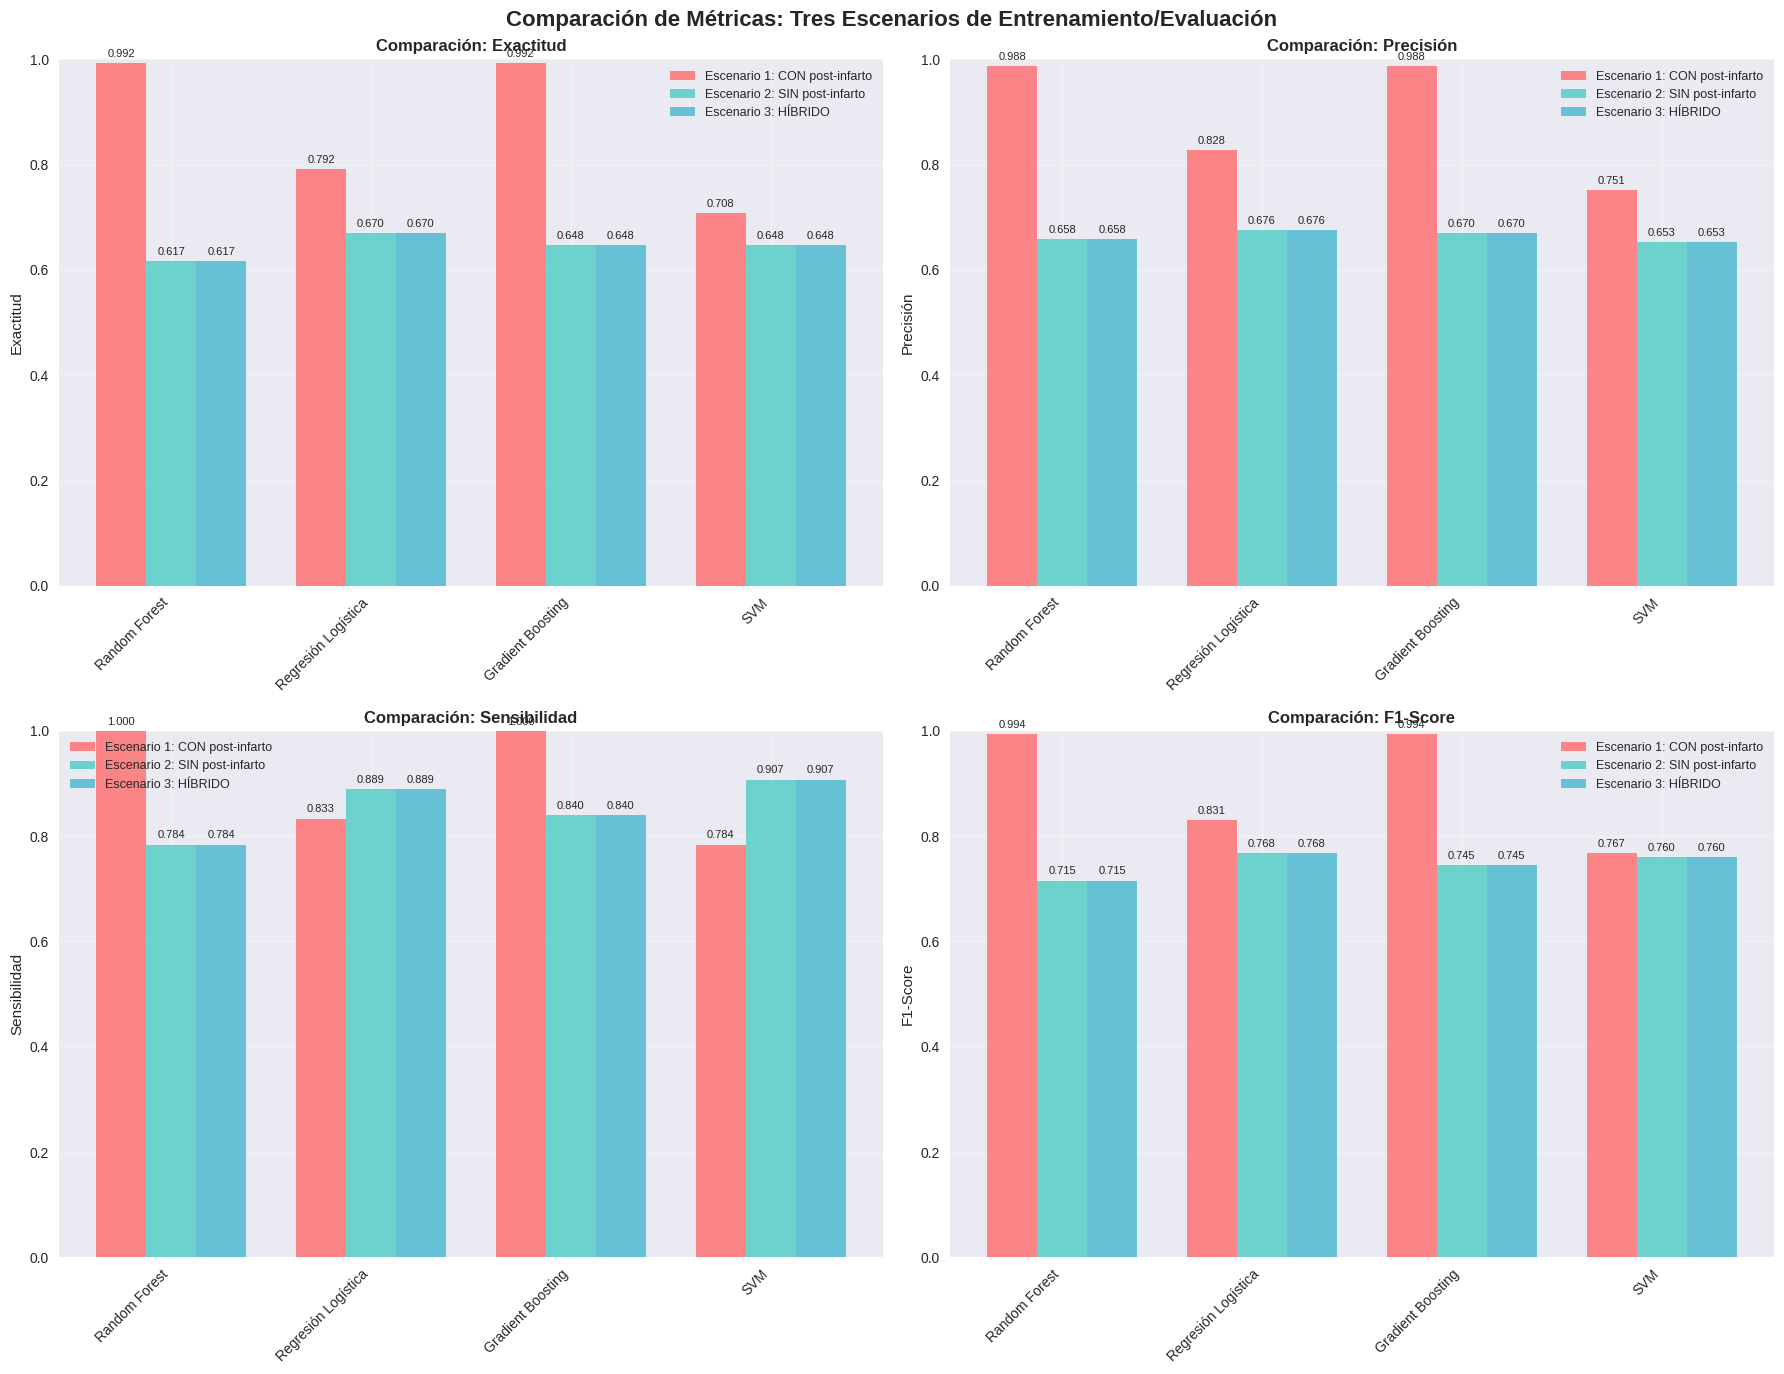

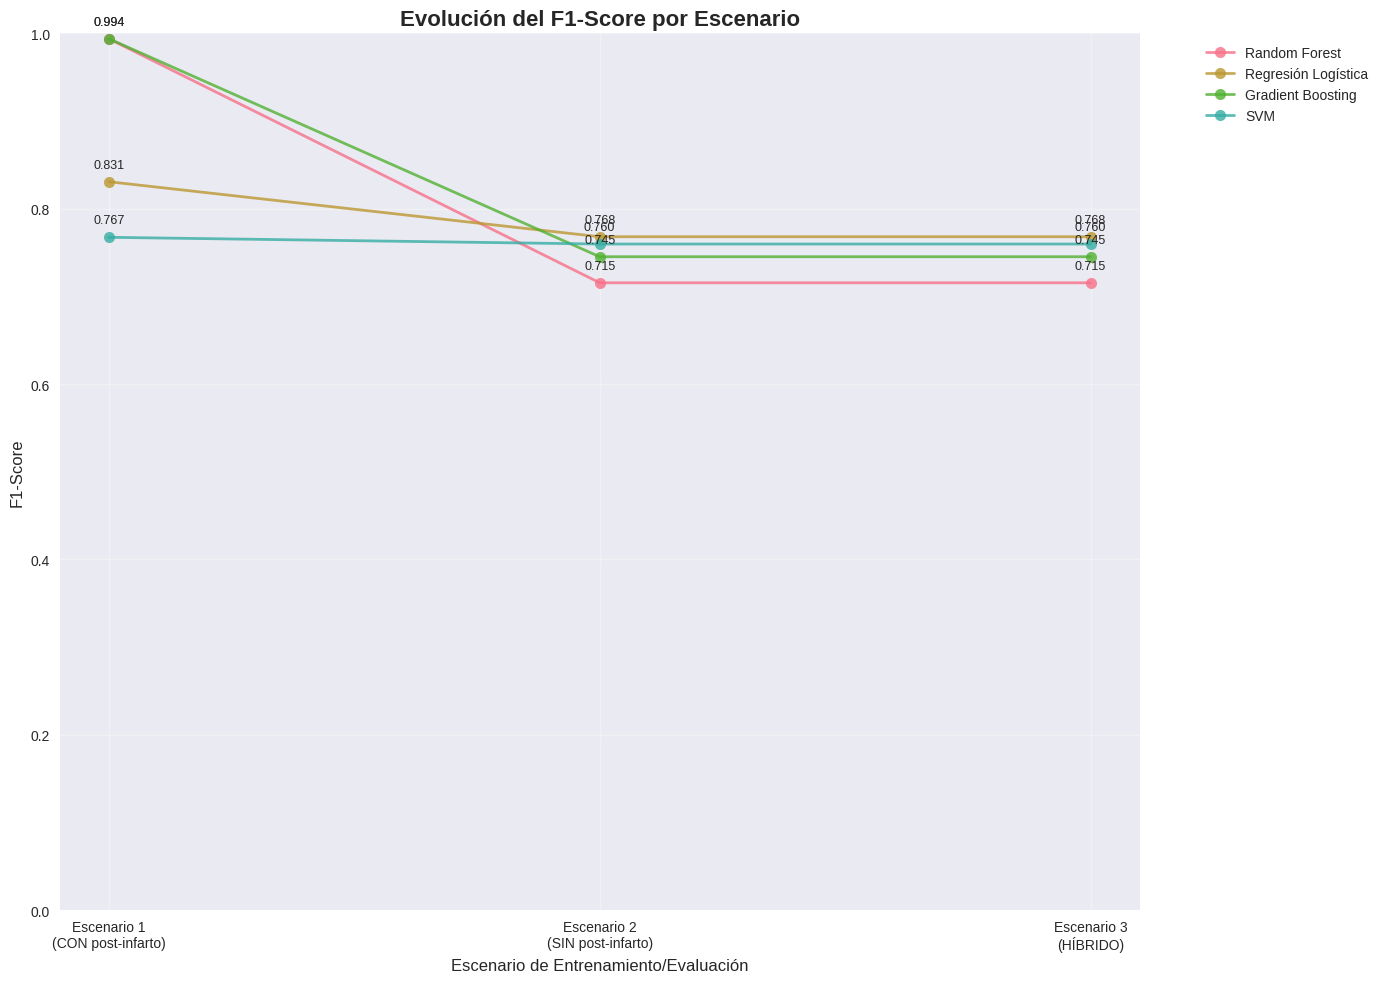

In [ ]:
print("\n📈 GENERANDO VISUALIZACIONES COMPARATIVAS DE TRES ESCENARIOS...")

# Gráfico de barras comparativo ampliado
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Comparación de Métricas: Tres Escenarios de Entrenamiento/Evaluación', fontsize=16, fontweight='bold')

metrics_names = ['Exactitud', 'Precisión', 'Sensibilidad', 'F1-Score']
metrics_keys = ['accuracy', 'precision', 'recall', 'f1']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']  # Colores distintivos para cada escenario

for idx, (metric_name, metric_key) in enumerate(zip(metrics_names, metrics_keys)):
    ax = axes[idx // 2, idx % 2]

    models = list(results_with_post.keys())
    scenario1_values = [results_with_post[model][metric_key] for model in models]
    scenario2_values = [results_without_post[model][metric_key] for model in models]
    scenario3_values = [results_hybrid[model][metric_key] for model in models]

    x = np.arange(len(models))
    width = 0.25

    bars1 = ax.bar(x - width, scenario1_values, width, label='Escenario 1: CON post-infarto',
                   color=colors[0], alpha=0.8)
    bars2 = ax.bar(x, scenario2_values, width, label='Escenario 2: SIN post-infarto',
                   color=colors[1], alpha=0.8)
    bars3 = ax.bar(x + width, scenario3_values, width, label='Escenario 3: HÍBRIDO',
                   color=colors[2], alpha=0.8)

    # Agregar valores en las barras
    for bars in [bars1, bars2, bars3]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.3f}',
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom', fontsize=8)

    ax.set_ylabel(metric_name)
    ax.set_title(f'Comparación: {metric_name}', fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 1.0)

plt.tight_layout()
plt.show()

# Gráfico de líneas para mostrar tendencias
plt.figure(figsize=(14, 10))

scenarios = ['Escenario 1\n(CON post-infarto)', 'Escenario 2\n(SIN post-infarto)', 'Escenario 3\n(HÍBRIDO)']

for i, model_name in enumerate(models_all.keys()):
    f1_values = [
        results_with_post[model_name]['f1'],
        results_without_post[model_name]['f1'],
        results_hybrid[model_name]['f1']
    ]

    plt.plot(scenarios, f1_values, marker='o', linewidth=2, markersize=8,
             label=model_name, alpha=0.8)

    # Agregar valores en los puntos
    for j, value in enumerate(f1_values):
        plt.annotate(f'{value:.3f}', (j, value), textcoords="offset points",
                    xytext=(0,10), ha='center', fontsize=9)

plt.title('Evolución del F1-Score por Escenario', fontsize=16, fontweight='bold')
plt.ylabel('F1-Score', fontsize=12)
plt.xlabel('Escenario de Entrenamiento/Evaluación', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.0)
plt.tight_layout()
plt.show()


# 6) CONCLUSIONES Y RECOMENDACIONES

In [ ]:
print(f"\n🎯 DATASET PRINCIPAL - Dataset Primario:")
print(f"   ✅ Mejor opción para predicción de infarto")
print(f"   ✅ Incluye biomarcadores específicos (CK-MB, Troponina)")
print(f"   ✅ Variables clínicamente relevantes")
print(f"   ✅ Buen balance de clases")

print(f"\n🥇 MEJOR MODELO: {ranking_modelos[0][0]}")
best_results = ranking_modelos[0][1]
print(f"   🎯 AUC: {best_results['cv_mean']:.4f}")
print(f"   📊 Rendimiento consistente en validación cruzada")

print(f"\n🔑 VARIABLES MÁS IMPORTANTES:")
if mejor_modelo_tree:
    top_3_vars = caracteristicas_ordenadas[:3]
    for i, (var, imp) in enumerate(top_3_vars, 1):
        print(f"   {i}. {var} ({imp*100:.1f}%)")

print(f"\n💡 RECOMENDACIONES:")
print(f"   🔬 Utilizar Dataset Primario como base principal")
print(f"   🤖 Implementar {ranking_modelos[0][0]} como modelo de producción")
print(f"   📊 Considerar ensemble con los top 3 modelos para mayor robustez")
print(f"   🔍 Validar con datos externos antes de implementación clínica")
print(f"   📈 Monitorear rendimiento del modelo en datos nuevos")

print(f"\n" + "="*80)
print(f"ANÁLISIS COMPLETADO EXITOSAMENTE")
print(f"Dataset Principal: Dataset Primario - AUC: {best_results['cv_mean']:.4f}")
print(f"Mejor Modelo: {ranking_modelos[0][0]}")
print(f"="*80)


🎯 DATASET PRINCIPAL - Dataset Primario:
   ✅ Mejor opción para predicción de infarto
   ✅ Incluye biomarcadores específicos (CK-MB, Troponina)
   ✅ Variables clínicamente relevantes
   ✅ Buen balance de clases

🥇 MEJOR MODELO: 1) Random Forest
   🎯 AUC: 0.9958
   📊 Rendimiento consistente en validación cruzada

🔑 VARIABLES MÁS IMPORTANTES:
   1. Troponina (61.3%)
   2. CK_MB (25.3%)
   3. Edad (5.1%)

💡 RECOMENDACIONES:
   🔬 Utilizar Dataset Primario como base principal
   🤖 Implementar 1) Random Forest como modelo de producción
   📊 Considerar ensemble con los top 3 modelos para mayor robustez
   🔍 Validar con datos externos antes de implementación clínica
   📈 Monitorear rendimiento del modelo en datos nuevos

ANÁLISIS COMPLETADO EXITOSAMENTE
Dataset Principal: Dataset Primario - AUC: 0.9958
Mejor Modelo: 1) Random Forest


# 7) ELIMINANDO LAS VARIABLES POST INFARTO

In [ ]:
# Guardar el dataset principal procesado (solo variables PRE-INFARTO)
print(f"\n Resumen del procesamiento del Dataset Primario (PRE-INFARTO):")
print(f"  Registros originales: {df_primario.shape[0]}")
print(f"  Registros finales: {df_principal_final.shape[0]}")
print(f"  Variables originales: {df_primario.shape[1]}")
print(f"  Variables PRE-INFARTO finales: {df_principal_final.shape[1]}")
print(f"  Variable objetivo: Resultado_Numerico")
print(f"  Variables post-infarto eliminadas: CK-MB, Troponina")
print(f"  Dataset listo para predicción PRE-INFARTO")


 Resumen del procesamiento del Dataset Primario (PRE-INFARTO):
  Registros originales: 1319
  Registros finales: 1319
  Variables originales: 9
  Variables PRE-INFARTO finales: 10
  Variable objetivo: Resultado_Numerico
  Variables post-infarto eliminadas: CK-MB, Troponina
  Dataset listo para predicción PRE-INFARTO
